In [1]:
import numpy as np
import pyglet
import random
import time
import matplotlib.pyplot as plt
from math import radians, degrees
from collections import deque

import gym
from gym import spaces, error
from gym.utils import seeding, closer
from utils import *

# from stable_baselines.common.env_checker import check_env
from stable_baselines import PPO2
from stable_baselines.bench import Monitor
from stable_baselines.common.vec_env import DummyVecEnv
# from stable_baselines.results_plotter import load_results, ts2xy
from stable_baselines.common.noise import AdaptiveParamNoiseSpec, NormalActionNoise
from stable_baselines.deepq.policies import FeedForwardPolicy


/home/cmb/anaconda3/envs/thesis/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/cmb/anaconda3/envs/thesis/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/cmb/anaconda3/envs/thesis/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/cmb/anaconda3/envs/thesis/lib/python3.6/site-pack

In [2]:
from env_mg import Friction_finger_env as Env
from HER_test_agent import *

In [7]:
env = Env()

In [10]:
def callback(_locals, _globals, num_episodes = 500):
    """
    Callback is called at each step (timestep) for DQN
    :param_locals: (dict)
    :param_globals: (dict)
    """
    global n_steps, best_mean_reward
        
    if (env.episode) > num_episodes:
        return False

In [11]:
env = Monitor(env, filename=None, allow_early_resets=True)

# Define the model
# Custom MLP Policy 
policy_kwargs = dict(net_arch=[64, 64])

model = PPO2('MlpPolicy', env, n_steps = 32, nminibatches=4, gamma=0.99, vf_coef=0.5, 
              ent_coef=0.01, noptepochs=10, cliprange=0.3, policy_kwargs=policy_kwargs, verbose=1)

# Train the agent
model.learn(total_timesteps=int(1e100), callback=callback)


Wrapping the env in a DummyVecEnv.
Episode 9	Average Score: -3268.85-------------------------------------
| approxkl           | 0.0039936327 |
| clipfrac           | 0.0          |
| explained_variance | -0.000236    |
| fps                | 120          |
| n_updates          | 1            |
| policy_entropy     | 1.3815291    |
| policy_loss        | -0.015968533 |
| serial_timesteps   | 32           |
| time_elapsed       | 1.05e-05     |
| total_timesteps    | 32           |
| value_loss         | 4518.5645    |
-------------------------------------
------------------------------------
| approxkl           | 0.002836082 |
| clipfrac           | 0.0         |
| explained_variance | -0.000315   |
| fps                | 319         |
| n_updates          | 2           |
| policy_entropy     | 1.3697999   |
| policy_loss        | -0.02142624 |
| serial_timesteps   | 64          |
| time_elapsed       | 0.267       |
| total_timesteps    | 64          |
| value_loss         | 3542.964

-------------------------------------
| approxkl           | 0.0011812358 |
| clipfrac           | 0.0          |
| explained_variance | -4.55e-05    |
| fps                | 314          |
| n_updates          | 18           |
| policy_entropy     | 1.1542337    |
| policy_loss        | 0.00718638   |
| serial_timesteps   | 576          |
| time_elapsed       | 1.85         |
| total_timesteps    | 576          |
| value_loss         | 5432.081     |
-------------------------------------
--------------------------------------
| approxkl           | 0.0013916316  |
| clipfrac           | 0.0           |
| explained_variance | 7.33e-06      |
| fps                | 302           |
| n_updates          | 19            |
| policy_entropy     | 1.1917511     |
| policy_loss        | -0.0066345274 |
| serial_timesteps   | 608           |
| time_elapsed       | 1.95          |
| total_timesteps    | 608           |
| value_loss         | 5304.532      |
--------------------------------------

-------------------------------------
| approxkl           | 0.0015354285 |
| clipfrac           | 0.0          |
| explained_variance | 4.77e-07     |
| fps                | 326          |
| n_updates          | 35           |
| policy_entropy     | 0.9860898    |
| policy_loss        | 0.0077474937 |
| serial_timesteps   | 1120         |
| time_elapsed       | 3.54         |
| total_timesteps    | 1120         |
| value_loss         | 1428.2207    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0020326287  |
| clipfrac           | 0.0           |
| explained_variance | 3.04e-06      |
| fps                | 334           |
| n_updates          | 36            |
| policy_entropy     | 0.9415762     |
| policy_loss        | -0.0035388104 |
| serial_timesteps   | 1152          |
| time_elapsed       | 3.64          |
| total_timesteps    | 1152          |
| value_loss         | 1019.60724    |
--------------------------------------

-------------------------------------
| approxkl           | 0.0006363009 |
| clipfrac           | 0.0          |
| explained_variance | -2.38e-07    |
| fps                | 298          |
| n_updates          | 52           |
| policy_entropy     | 0.80689144   |
| policy_loss        | 0.005111539  |
| serial_timesteps   | 1664         |
| time_elapsed       | 5.23         |
| total_timesteps    | 1664         |
| value_loss         | 5805.7393    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0032899375 |
| clipfrac           | 0.0          |
| explained_variance | 5.96e-08     |
| fps                | 332          |
| n_updates          | 53           |
| policy_entropy     | 0.6970243    |
| policy_loss        | 0.0063088024 |
| serial_timesteps   | 1696         |
| time_elapsed       | 5.34         |
| total_timesteps    | 1696         |
| value_loss         | 5864.165     |
-------------------------------------
------------

--------------------------------------
| approxkl           | 0.00012502588 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 329           |
| n_updates          | 69            |
| policy_entropy     | 0.32354105    |
| policy_loss        | -0.0017605091 |
| serial_timesteps   | 2208          |
| time_elapsed       | 6.93          |
| total_timesteps    | 2208          |
| value_loss         | 3357.776      |
--------------------------------------
---------------------------------------
| approxkl           | 3.912059e-05   |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 330            |
| n_updates          | 70             |
| policy_entropy     | 0.34603018     |
| policy_loss        | -0.00014274762 |
| serial_timesteps   | 2240           |
| time_elapsed       | 7.03           |
| total_timesteps    | 2240           |
| value_loss         | 3355.8628      |
-------------

--------------------------------------
| approxkl           | 9.710014e-07  |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 332           |
| n_updates          | 86            |
| policy_entropy     | 0.17003132    |
| policy_loss        | 2.9522926e-08 |
| serial_timesteps   | 2752          |
| time_elapsed       | 8.62          |
| total_timesteps    | 2752          |
| value_loss         | 3295.8638     |
--------------------------------------
--------------------------------------
| approxkl           | 4.1527044e-05 |
| clipfrac           | 0.0           |
| explained_variance | -2.38e-07     |
| fps                | 335           |
| n_updates          | 87            |
| policy_entropy     | 0.16970237    |
| policy_loss        | 1.3914146e-05 |
| serial_timesteps   | 2784          |
| time_elapsed       | 8.72          |
| total_timesteps    | 2784          |
| value_loss         | 3065.2134     |
-------------------------

--------------------------------------
| approxkl           | 3.3714776e-05 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 334           |
| n_updates          | 103           |
| policy_entropy     | 0.1306257     |
| policy_loss        | -0.0003638871 |
| serial_timesteps   | 3296          |
| time_elapsed       | 10.3          |
| total_timesteps    | 3296          |
| value_loss         | 1676.6785     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00030635766 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 332           |
| n_updates          | 104           |
| policy_entropy     | 0.10988484    |
| policy_loss        | -0.002103291  |
| serial_timesteps   | 3328          |
| time_elapsed       | 10.4          |
| total_timesteps    | 3328          |
| value_loss         | 1551.8655     |
-------------------------

--------------------------------------
| approxkl           | 2.154681e-09  |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 339           |
| n_updates          | 119           |
| policy_entropy     | 0.05749319    |
| policy_loss        | 3.7718566e-09 |
| serial_timesteps   | 3808          |
| time_elapsed       | 12            |
| total_timesteps    | 3808          |
| value_loss         | 1343.3978     |
--------------------------------------
-------------------------------------
| approxkl           | 2.389097e-09 |
| clipfrac           | 0.0          |
| explained_variance | 0            |
| fps                | 301          |
| n_updates          | 120          |
| policy_entropy     | 0.058294892  |
| policy_loss        | 2.970919e-08 |
| serial_timesteps   | 3840         |
| time_elapsed       | 12           |
| total_timesteps    | 3840         |
| value_loss         | 1340.8419    |
-------------------------------------

---------------------------------------
| approxkl           | 7.3046658e-09  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 349            |
| n_updates          | 136            |
| policy_entropy     | 0.06693441     |
| policy_loss        | -3.1664968e-08 |
| serial_timesteps   | 4352           |
| time_elapsed       | 13.7           |
| total_timesteps    | 4352           |
| value_loss         | 4629.7446      |
---------------------------------------
--------------------------------------
| approxkl           | 8.305418e-09  |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 342           |
| n_updates          | 137           |
| policy_entropy     | 0.068320744   |
| policy_loss        | -2.188608e-08 |
| serial_timesteps   | 4384          |
| time_elapsed       | 13.8          |
| total_timesteps    | 4384          |
| value_loss         | 4624.992      |
------------

Episode 19	Average Score: -3717.77--------------------------------------
| approxkl           | 1.3996478e-09 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 332           |
| n_updates          | 152           |
| policy_entropy     | 0.04017215    |
| policy_loss        | 2.1699815e-08 |
| serial_timesteps   | 4864          |
| time_elapsed       | 15.3          |
| total_timesteps    | 4864          |
| value_loss         | 4191.0493     |
--------------------------------------
--------------------------------------
| approxkl           | 1.593032e-09  |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 314           |
| n_updates          | 153           |
| policy_entropy     | 0.040849783   |
| policy_loss        | -1.359731e-08 |
| serial_timesteps   | 4896          |
| time_elapsed       | 15.4          |
| total_timesteps    | 4896          |
| value_loss         | 197.293

-------------------------------------
| approxkl           | 8.616e-09    |
| clipfrac           | 0.0          |
| explained_variance | 1.19e-07     |
| fps                | 328          |
| n_updates          | 168          |
| policy_entropy     | 0.053947162  |
| policy_loss        | 2.514571e-09 |
| serial_timesteps   | 5376         |
| time_elapsed       | 17           |
| total_timesteps    | 5376         |
| value_loss         | 34.61936     |
-------------------------------------
--------------------------------------
| approxkl           | 0.0009195743  |
| clipfrac           | 0.00625       |
| explained_variance | 0             |
| fps                | 322           |
| n_updates          | 169           |
| policy_entropy     | 0.061342694   |
| policy_loss        | -0.0016237482 |
| serial_timesteps   | 5408          |
| time_elapsed       | 17.1          |
| total_timesteps    | 5408          |
| value_loss         | 34.213844     |
--------------------------------------

--------------------------------------
| approxkl           | 5.1459345e-08 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 327           |
| n_updates          | 185           |
| policy_entropy     | 0.08650614    |
| policy_loss        | 6.0535967e-09 |
| serial_timesteps   | 5920          |
| time_elapsed       | 18.6          |
| total_timesteps    | 5920          |
| value_loss         | 4267.9224     |
--------------------------------------
---------------------------------------
| approxkl           | 6.7384214e-08  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 324            |
| n_updates          | 186            |
| policy_entropy     | 0.09030862     |
| policy_loss        | -1.9848812e-08 |
| serial_timesteps   | 5952           |
| time_elapsed       | 18.7           |
| total_timesteps    | 5952           |
| value_loss         | 4263.52        |
-------------

-------------------------------------
| approxkl           | 4.825617e-07 |
| clipfrac           | 0.0          |
| explained_variance | -1.19e-07    |
| fps                | 317          |
| n_updates          | 202          |
| policy_entropy     | 0.16463189   |
| policy_loss        | 6.798655e-09 |
| serial_timesteps   | 6464         |
| time_elapsed       | 20.4         |
| total_timesteps    | 6464         |
| value_loss         | 4191.695     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0012423971 |
| clipfrac           | 0.0125       |
| explained_variance | 0            |
| fps                | 333          |
| n_updates          | 203          |
| policy_entropy     | 0.18506572   |
| policy_loss        | -0.010757434 |
| serial_timesteps   | 6496         |
| time_elapsed       | 20.5         |
| total_timesteps    | 6496         |
| value_loss         | 4173.501     |
-------------------------------------
------------

--------------------------------------
| approxkl           | 0.00023804612 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 303           |
| n_updates          | 219           |
| policy_entropy     | 0.30556178    |
| policy_loss        | -0.0018533717 |
| serial_timesteps   | 7008          |
| time_elapsed       | 22.1          |
| total_timesteps    | 7008          |
| value_loss         | 517.37146     |
--------------------------------------
---------------------------------------
| approxkl           | 0.00011824351  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 296            |
| n_updates          | 220            |
| policy_entropy     | 0.33232278     |
| policy_loss        | -0.00070521823 |
| serial_timesteps   | 7040           |
| time_elapsed       | 22.2           |
| total_timesteps    | 7040           |
| value_loss         | 508.07593      |
-------------

--------------------------------------
| approxkl           | 0.0007912015  |
| clipfrac           | 0.003125      |
| explained_variance | 0             |
| fps                | 332           |
| n_updates          | 236           |
| policy_entropy     | 0.19896774    |
| policy_loss        | -0.0043451684 |
| serial_timesteps   | 7552          |
| time_elapsed       | 23.9          |
| total_timesteps    | 7552          |
| value_loss         | 489.03107     |
--------------------------------------
--------------------------------------
| approxkl           | 6.644511e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 336           |
| n_updates          | 237           |
| policy_entropy     | 0.1599659     |
| policy_loss        | 0.00028339456 |
| serial_timesteps   | 7584          |
| time_elapsed       | 24            |
| total_timesteps    | 7584          |
| value_loss         | 487.49307     |
-------------------------

-------------------------------------
| approxkl           | 0.002551434  |
| clipfrac           | 0.025        |
| explained_variance | -1.19e-07    |
| fps                | 331          |
| n_updates          | 253          |
| policy_entropy     | 0.25175637   |
| policy_loss        | -0.006786923 |
| serial_timesteps   | 8096         |
| time_elapsed       | 25.6         |
| total_timesteps    | 8096         |
| value_loss         | 1597.7015    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0011108436  |
| clipfrac           | 0.003125      |
| explained_variance | 0             |
| fps                | 318           |
| n_updates          | 254           |
| policy_entropy     | 0.21963224    |
| policy_loss        | -0.0033643327 |
| serial_timesteps   | 8128          |
| time_elapsed       | 25.7          |
| total_timesteps    | 8128          |
| value_loss         | 1585.5635     |
--------------------------------------

-------------------------------------
| approxkl           | 0.0011659556 |
| clipfrac           | 0.009375     |
| explained_variance | 0            |
| fps                | 299          |
| n_updates          | 270          |
| policy_entropy     | 0.33773062   |
| policy_loss        | -0.014400636 |
| serial_timesteps   | 8640         |
| time_elapsed       | 27.4         |
| total_timesteps    | 8640         |
| value_loss         | 1550.8998    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0013585715 |
| clipfrac           | 0.0125       |
| explained_variance | 0            |
| fps                | 304          |
| n_updates          | 271          |
| policy_entropy     | 0.4155944    |
| policy_loss        | -0.011407455 |
| serial_timesteps   | 8672         |
| time_elapsed       | 27.5         |
| total_timesteps    | 8672         |
| value_loss         | 1548.1675    |
-------------------------------------
------------

------------------------------------
| approxkl           | 0.005512717 |
| clipfrac           | 0.053125    |
| explained_variance | 5.96e-08    |
| fps                | 309         |
| n_updates          | 287         |
| policy_entropy     | 0.46578908  |
| policy_loss        | -0.02020881 |
| serial_timesteps   | 9184        |
| time_elapsed       | 29.1        |
| total_timesteps    | 9184        |
| value_loss         | 1782.2699   |
------------------------------------
--------------------------------------
| approxkl           | 0.0014522651  |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 302           |
| n_updates          | 288           |
| policy_entropy     | 0.5593145     |
| policy_loss        | 0.00032434193 |
| serial_timesteps   | 9216          |
| time_elapsed       | 29.2          |
| total_timesteps    | 9216          |
| value_loss         | 1779.3297     |
--------------------------------------
------------

-------------------------------------
| approxkl           | 0.004443188  |
| clipfrac           | 0.0375       |
| explained_variance | -1.19e-07    |
| fps                | 323          |
| n_updates          | 304          |
| policy_entropy     | 0.4717625    |
| policy_loss        | -0.026144221 |
| serial_timesteps   | 9728         |
| time_elapsed       | 30.9         |
| total_timesteps    | 9728         |
| value_loss         | 1728.512     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0019108437 |
| clipfrac           | 0.0          |
| explained_variance | 0            |
| fps                | 320          |
| n_updates          | 305          |
| policy_entropy     | 0.612881     |
| policy_loss        | 0.010637587  |
| serial_timesteps   | 9760         |
| time_elapsed       | 31           |
| total_timesteps    | 9760         |
| value_loss         | 1725.9114    |
-------------------------------------
------------

--------------------------------------
| approxkl           | 0.00028565968 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 313           |
| n_updates          | 321           |
| policy_entropy     | 0.3055074     |
| policy_loss        | 0.0007784822  |
| serial_timesteps   | 10272         |
| time_elapsed       | 32.6          |
| total_timesteps    | 10272         |
| value_loss         | 344.57312     |
--------------------------------------
---------------------------------------
| approxkl           | 0.000116127776 |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 297            |
| n_updates          | 322            |
| policy_entropy     | 0.3015055      |
| policy_loss        | 0.0014280526   |
| serial_timesteps   | 10304          |
| time_elapsed       | 32.7           |
| total_timesteps    | 10304          |
| value_loss         | 374.80496      |
-------------

--------------------------------------
| approxkl           | 0.00013594898 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 320           |
| n_updates          | 338           |
| policy_entropy     | 0.33497682    |
| policy_loss        | 0.00096960756 |
| serial_timesteps   | 10816         |
| time_elapsed       | 34.3          |
| total_timesteps    | 10816         |
| value_loss         | 353.62598     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00047937743 |
| clipfrac           | 0.003125      |
| explained_variance | 0             |
| fps                | 328           |
| n_updates          | 339           |
| policy_entropy     | 0.31896538    |
| policy_loss        | -0.001560129  |
| serial_timesteps   | 10848         |
| time_elapsed       | 34.4          |
| total_timesteps    | 10848         |
| value_loss         | 349.87375     |
-------------------------

--------------------------------------
| approxkl           | 0.0013485324  |
| clipfrac           | 0.00625       |
| explained_variance | 1.19e-07      |
| fps                | 333           |
| n_updates          | 355           |
| policy_entropy     | 0.2324171     |
| policy_loss        | -0.0034953046 |
| serial_timesteps   | 11360         |
| time_elapsed       | 36            |
| total_timesteps    | 11360         |
| value_loss         | 1093.5575     |
--------------------------------------
-------------------------------------
| approxkl           | 5.411101e-06 |
| clipfrac           | 0.0          |
| explained_variance | 0            |
| fps                | 294          |
| n_updates          | 356          |
| policy_entropy     | 0.21343693   |
| policy_loss        | 4.781056e-05 |
| serial_timesteps   | 11392        |
| time_elapsed       | 36.1         |
| total_timesteps    | 11392        |
| value_loss         | 1130.2706    |
-------------------------------------

--------------------------------------
| approxkl           | 3.2306347e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 312           |
| n_updates          | 372           |
| policy_entropy     | 0.306453      |
| policy_loss        | -8.941628e-06 |
| serial_timesteps   | 11904         |
| time_elapsed       | 37.7          |
| total_timesteps    | 11904         |
| value_loss         | 927.0407      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00078122097 |
| clipfrac           | 0.0           |
| explained_variance | 5.96e-08      |
| fps                | 330           |
| n_updates          | 373           |
| policy_entropy     | 0.30998024    |
| policy_loss        | -0.0067211287 |
| serial_timesteps   | 11936         |
| time_elapsed       | 37.8          |
| total_timesteps    | 11936         |
| value_loss         | 729.11475     |
-------------------------

--------------------------------------
| approxkl           | 0.0008554788  |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 332           |
| n_updates          | 389           |
| policy_entropy     | 0.43717724    |
| policy_loss        | -0.0040154248 |
| serial_timesteps   | 12448         |
| time_elapsed       | 39.3          |
| total_timesteps    | 12448         |
| value_loss         | 666.07117     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0006520661  |
| clipfrac           | 0.003125      |
| explained_variance | -1.19e-07     |
| fps                | 329           |
| n_updates          | 390           |
| policy_entropy     | 0.39701203    |
| policy_loss        | 0.00043728872 |
| serial_timesteps   | 12480         |
| time_elapsed       | 39.4          |
| total_timesteps    | 12480         |
| value_loss         | 660.0458      |
-------------------------

-------------------------------------
| approxkl           | 0.0011027305 |
| clipfrac           | 0.0          |
| explained_variance | 0            |
| fps                | 300          |
| n_updates          | 406          |
| policy_entropy     | 0.40006843   |
| policy_loss        | -0.0009956   |
| serial_timesteps   | 12992        |
| time_elapsed       | 41.1         |
| total_timesteps    | 12992        |
| value_loss         | 2217.275     |
-------------------------------------
--------------------------------------
| approxkl           | 0.00019280831 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 308           |
| n_updates          | 407           |
| policy_entropy     | 0.37130082    |
| policy_loss        | 0.0034694183  |
| serial_timesteps   | 13024         |
| time_elapsed       | 41.2          |
| total_timesteps    | 13024         |
| value_loss         | 2225.4905     |
--------------------------------------

---------------------------------------
| approxkl           | 7.818169e-05   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 286            |
| n_updates          | 423            |
| policy_entropy     | 0.15866931     |
| policy_loss        | -0.00088238495 |
| serial_timesteps   | 13536          |
| time_elapsed       | 42.9           |
| total_timesteps    | 13536          |
| value_loss         | 2173.4312      |
---------------------------------------
--------------------------------------
| approxkl           | 0.00038915285 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 330           |
| n_updates          | 424           |
| policy_entropy     | 0.13448118    |
| policy_loss        | -0.0034588266 |
| serial_timesteps   | 13568         |
| time_elapsed       | 43            |
| total_timesteps    | 13568         |
| value_loss         | 2063.2437     |
------------

--------------------------------------
| approxkl           | 1.6271006e-08 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 333           |
| n_updates          | 439           |
| policy_entropy     | 0.08897012    |
| policy_loss        | 1.8719584e-08 |
| serial_timesteps   | 14048         |
| time_elapsed       | 44.5          |
| total_timesteps    | 14048         |
| value_loss         | 1132.8547     |
--------------------------------------
--------------------------------------
| approxkl           | 1.8340678e-08 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 329           |
| n_updates          | 440           |
| policy_entropy     | 0.09062234    |
| policy_loss        | -7.823109e-09 |
| serial_timesteps   | 14080         |
| time_elapsed       | 44.6          |
| total_timesteps    | 14080         |
| value_loss         | 1130.5416     |
-------------------------

-------------------------------------
| approxkl           | 0.0008922521 |
| clipfrac           | 0.00625      |
| explained_variance | 0            |
| fps                | 303          |
| n_updates          | 456          |
| policy_entropy     | 0.29468244   |
| policy_loss        | -0.010558142 |
| serial_timesteps   | 14592        |
| time_elapsed       | 46.1         |
| total_timesteps    | 14592        |
| value_loss         | 1121.634     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0005008336 |
| clipfrac           | 0.0          |
| explained_variance | 0            |
| fps                | 333          |
| n_updates          | 457          |
| policy_entropy     | 0.4036158    |
| policy_loss        | 0.0032583158 |
| serial_timesteps   | 14624        |
| time_elapsed       | 46.2         |
| total_timesteps    | 14624        |
| value_loss         | 1119.3055    |
-------------------------------------
------------

-------------------------------------
| approxkl           | 0.0076553435 |
| clipfrac           | 0.025        |
| explained_variance | 0            |
| fps                | 295          |
| n_updates          | 473          |
| policy_entropy     | 0.5333539    |
| policy_loss        | -0.010628937 |
| serial_timesteps   | 15136        |
| time_elapsed       | 47.9         |
| total_timesteps    | 15136        |
| value_loss         | 3490.2922    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0018980568  |
| clipfrac           | 0.003125      |
| explained_variance | 0             |
| fps                | 321           |
| n_updates          | 474           |
| policy_entropy     | 0.46772546    |
| policy_loss        | -0.0058078268 |
| serial_timesteps   | 15168         |
| time_elapsed       | 48            |
| total_timesteps    | 15168         |
| value_loss         | 3486.2214     |
--------------------------------------

--------------------------------------
| approxkl           | 0.0009596936  |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 306           |
| n_updates          | 490           |
| policy_entropy     | 0.7087797     |
| policy_loss        | -0.0017735872 |
| serial_timesteps   | 15680         |
| time_elapsed       | 49.6          |
| total_timesteps    | 15680         |
| value_loss         | 3413.0308     |
--------------------------------------
-------------------------------------
| approxkl           | 0.011341985  |
| clipfrac           | 0.00625      |
| explained_variance | 0            |
| fps                | 317          |
| n_updates          | 491          |
| policy_entropy     | 0.6705587    |
| policy_loss        | -0.008536765 |
| serial_timesteps   | 15712        |
| time_elapsed       | 49.7         |
| total_timesteps    | 15712        |
| value_loss         | 3407.3997    |
-------------------------------------

--------------------------------------
| approxkl           | 0.003811337   |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.59e+04      |
| ep_reward_mean     | -1.09e+05     |
| explained_variance | -1.19e-07     |
| fps                | 330           |
| n_updates          | 506           |
| policy_entropy     | 0.5270679     |
| policy_loss        | -0.0058883843 |
| serial_timesteps   | 16192         |
| time_elapsed       | 51.2          |
| total_timesteps    | 16192         |
| value_loss         | 1012.14465    |
--------------------------------------
--------------------------------------
| approxkl           | 0.00028295786 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.59e+04      |
| ep_reward_mean     | -1.09e+05     |
| explained_variance | 0             |
| fps                | 332           |
| n_updates          | 507           |
| policy_entropy     | 0.47936195    |
| policy_loss        | -0.00048249   |
| serial_timesteps   | 16

-------------------------------------
| approxkl           | 0.0021298714 |
| clipfrac           | 0.003125     |
| ep_len_mean        | 1.59e+04     |
| ep_reward_mean     | -1.09e+05    |
| explained_variance | 0            |
| fps                | 305          |
| n_updates          | 521          |
| policy_entropy     | 0.59957397   |
| policy_loss        | -0.014652008 |
| serial_timesteps   | 16672        |
| time_elapsed       | 52.7         |
| total_timesteps    | 16672        |
| value_loss         | 979.5964     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0017421249 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.59e+04     |
| ep_reward_mean     | -1.09e+05    |
| explained_variance | 0            |
| fps                | 297          |
| n_updates          | 522          |
| policy_entropy     | 0.66031116   |
| policy_loss        | 0.007380566  |
| serial_timesteps   | 16704        |
| time_elaps

--------------------------------------
| approxkl           | 0.0009327261  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.59e+04      |
| ep_reward_mean     | -1.09e+05     |
| explained_variance | 5.96e-08      |
| fps                | 327           |
| n_updates          | 536           |
| policy_entropy     | 0.5730432     |
| policy_loss        | -0.0013777827 |
| serial_timesteps   | 17152         |
| time_elapsed       | 54.2          |
| total_timesteps    | 17152         |
| value_loss         | 3389.9722     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00025905954 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.59e+04      |
| ep_reward_mean     | -1.09e+05     |
| explained_variance | 0             |
| fps                | 330           |
| n_updates          | 537           |
| policy_entropy     | 0.5516923     |
| policy_loss        | -0.0011580361 |
| serial_timesteps   | 17

--------------------------------------
| approxkl           | 0.00040130023 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.59e+04      |
| ep_reward_mean     | -1.09e+05     |
| explained_variance | 5.96e-08      |
| fps                | 335           |
| n_updates          | 551           |
| policy_entropy     | 0.42352948    |
| policy_loss        | 0.0027944031  |
| serial_timesteps   | 17632         |
| time_elapsed       | 55.7          |
| total_timesteps    | 17632         |
| value_loss         | 3329.81       |
--------------------------------------
-------------------------------------
| approxkl           | 9.513507e-05 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.59e+04     |
| ep_reward_mean     | -1.09e+05    |
| explained_variance | 0            |
| fps                | 328          |
| n_updates          | 552          |
| policy_entropy     | 0.402126     |
| policy_loss        | 0.001337957  |
| serial_timesteps   | 17664       

--------------------------------------
| approxkl           | 3.4070447e-07 |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 320           |
| n_updates          | 565           |
| policy_entropy     | 0.13195148    |
| policy_loss        | 2.0395964e-08 |
| serial_timesteps   | 18080         |
| time_elapsed       | 57.1          |
| total_timesteps    | 18080         |
| value_loss         | 2732.6616     |
--------------------------------------
---------------------------------------
| approxkl           | 7.287613e-08   |
| clipfrac           | 0.0            |
| ep_len_mean        | 8.94e+03       |
| ep_reward_mean     | -6.28e+04      |
| explained_variance | 0              |
| fps                | 321            |
| n_updates          | 566            |
| policy_entropy     | 0.13510026     |
| policy_loss        | -3.7951395e-08 |
| serial_timest

---------------------------------------
| approxkl           | 9.8683835e-05  |
| clipfrac           | 0.0            |
| ep_len_mean        | 8.94e+03       |
| ep_reward_mean     | -6.28e+04      |
| explained_variance | 0              |
| fps                | 319            |
| n_updates          | 579            |
| policy_entropy     | 0.07012108     |
| policy_loss        | -0.00083103275 |
| serial_timesteps   | 18528          |
| time_elapsed       | 58.5           |
| total_timesteps    | 18528          |
| value_loss         | 2682.6064      |
---------------------------------------
--------------------------------------
| approxkl           | 0.0003259321  |
| clipfrac           | 0.003125      |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | -1.19e-07     |
| fps                | 315           |
| n_updates          | 580           |
| policy_entropy     | 0.08861017    |
| policy_loss        | -0.0016543863 |
| serial_t

-------------------------------------
| approxkl           | 2.383871e-09 |
| clipfrac           | 0.0          |
| ep_len_mean        | 8.94e+03     |
| ep_reward_mean     | -6.28e+04    |
| explained_variance | 0            |
| fps                | 327          |
| n_updates          | 593          |
| policy_entropy     | 0.034678165  |
| policy_loss        | 8.335337e-09 |
| serial_timesteps   | 18976        |
| time_elapsed       | 59.9         |
| total_timesteps    | 18976        |
| value_loss         | 4958.0225    |
-------------------------------------
--------------------------------------
| approxkl           | 3.9728193e-10 |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 333           |
| n_updates          | 594           |
| policy_entropy     | 0.034837708   |
| policy_loss        | -2.8871e-09   |
| serial_timesteps   | 19008         |
|

-------------------------------------
| approxkl           | 6.416027e-05 |
| clipfrac           | 0.0          |
| ep_len_mean        | 8.94e+03     |
| ep_reward_mean     | -6.28e+04    |
| explained_variance | -1.19e-07    |
| fps                | 322          |
| n_updates          | 607          |
| policy_entropy     | 0.042741753  |
| policy_loss        | 8.925796e-06 |
| serial_timesteps   | 19424        |
| time_elapsed       | 61.3         |
| total_timesteps    | 19424        |
| value_loss         | 4007.9265    |
-------------------------------------
--------------------------------------
| approxkl           | 1.454623e-07  |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 323           |
| n_updates          | 608           |
| policy_entropy     | 0.048341822   |
| policy_loss        | 1.5180557e-08 |
| serial_timesteps   | 19456         |
|

Episode 51	Average Score: -3455.75--------------------------------------
| approxkl           | 0.000145956   |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 295           |
| n_updates          | 621           |
| policy_entropy     | 0.066801645   |
| policy_loss        | -0.0005262849 |
| serial_timesteps   | 19872         |
| time_elapsed       | 62.7          |
| total_timesteps    | 19872         |
| value_loss         | 2472.2537     |
--------------------------------------
---------------------------------------
| approxkl           | 3.1613386e-06  |
| clipfrac           | 0.0            |
| ep_len_mean        | 8.94e+03       |
| ep_reward_mean     | -6.28e+04      |
| explained_variance | -1.19e-07      |
| fps                | 305            |
| n_updates          | 622            |
| policy_entropy     | 0.09148437     |
| policy_loss        

--------------------------------------
| approxkl           | 0.00010183945 |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 312           |
| n_updates          | 635           |
| policy_entropy     | 0.18143977    |
| policy_loss        | -0.0002781298 |
| serial_timesteps   | 20320         |
| time_elapsed       | 64.2          |
| total_timesteps    | 20320         |
| value_loss         | 1722.2894     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00021975228 |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | -1.19e-07     |
| fps                | 318           |
| n_updates          | 636           |
| policy_entropy     | 0.1438329     |
| policy_loss        | -0.0011212653 |
| serial_timesteps   | 20

---------------------------------------
| approxkl           | 3.0404905e-09  |
| clipfrac           | 0.0            |
| ep_len_mean        | 8.94e+03       |
| ep_reward_mean     | -6.28e+04      |
| explained_variance | 0              |
| fps                | 314            |
| n_updates          | 649            |
| policy_entropy     | 0.043938376    |
| policy_loss        | -1.0314397e-08 |
| serial_timesteps   | 20768          |
| time_elapsed       | 65.7           |
| total_timesteps    | 20768          |
| value_loss         | 1682.2191      |
---------------------------------------
--------------------------------------
| approxkl           | 3.4309806e-09 |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 5.96e-08      |
| fps                | 311           |
| n_updates          | 650           |
| policy_entropy     | 0.04480333    |
| policy_loss        | -8.894131e-09 |
| serial_t

--------------------------------------
| approxkl           | 1.1421479e-08 |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 333           |
| n_updates          | 663           |
| policy_entropy     | 0.04951327    |
| policy_loss        | 2.0954758e-09 |
| serial_timesteps   | 21216         |
| time_elapsed       | 67.1          |
| total_timesteps    | 21216         |
| value_loss         | 0.21888141    |
--------------------------------------
--------------------------------------
| approxkl           | 0.0008846201  |
| clipfrac           | 0.00625       |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 337           |
| n_updates          | 664           |
| policy_entropy     | 0.045242485   |
| policy_loss        | -0.0021726186 |
| serial_timesteps   | 21

---------------------------------------
| approxkl           | 0.00062823424  |
| clipfrac           | 0.0            |
| ep_len_mean        | 8.94e+03       |
| ep_reward_mean     | -6.28e+04      |
| explained_variance | 0              |
| fps                | 326            |
| n_updates          | 677            |
| policy_entropy     | 0.037514538    |
| policy_loss        | -0.00042853216 |
| serial_timesteps   | 21664          |
| time_elapsed       | 68.5           |
| total_timesteps    | 21664          |
| value_loss         | 8.557885       |
---------------------------------------
--------------------------------------
| approxkl           | 4.4726416e-08 |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | -1.19e-07     |
| fps                | 329           |
| n_updates          | 678           |
| policy_entropy     | 0.039456196   |
| policy_loss        | 1.9557773e-09 |
| serial_t

--------------------------------------
| approxkl           | 5.650877e-10  |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 335           |
| n_updates          | 691           |
| policy_entropy     | 0.02410962    |
| policy_loss        | 1.2107193e-09 |
| serial_timesteps   | 22112         |
| time_elapsed       | 70            |
| total_timesteps    | 22112         |
| value_loss         | 1252.9451     |
--------------------------------------
---------------------------------------
| approxkl           | 6.386445e-10   |
| clipfrac           | 0.0            |
| ep_len_mean        | 8.94e+03       |
| ep_reward_mean     | -6.28e+04      |
| explained_variance | 5.96e-08       |
| fps                | 315            |
| n_updates          | 692            |
| policy_entropy     | 0.024534907    |
| policy_loss        | -1.8626452e-10 |
| serial_timest

--------------------------------------
| approxkl           | 6.438413e-11  |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 331           |
| n_updates          | 705           |
| policy_entropy     | 0.014443124   |
| policy_loss        | 1.7695129e-09 |
| serial_timesteps   | 22560         |
| time_elapsed       | 71.4          |
| total_timesteps    | 22560         |
| value_loss         | 864.65607     |
--------------------------------------
--------------------------------------
| approxkl           | 7.223643e-11  |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 5.96e-08      |
| fps                | 306           |
| n_updates          | 706           |
| policy_entropy     | 0.014602879   |
| policy_loss        | -2.514571e-09 |
| serial_timesteps   | 22

-------------------------------------
| approxkl           | 2.588047e-10 |
| clipfrac           | 0.0          |
| ep_len_mean        | 8.94e+03     |
| ep_reward_mean     | -6.28e+04    |
| explained_variance | 1.19e-07     |
| fps                | 329          |
| n_updates          | 719          |
| policy_entropy     | 0.017489415  |
| policy_loss        | -2.17231e-08 |
| serial_timesteps   | 23008        |
| time_elapsed       | 72.8         |
| total_timesteps    | 23008        |
| value_loss         | 2206.0164    |
-------------------------------------
--------------------------------------
| approxkl           | 2.8788782e-10 |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | -1.19e-07     |
| fps                | 340           |
| n_updates          | 720           |
| policy_entropy     | 0.017797906   |
| policy_loss        | 3.306195e-09  |
| serial_timesteps   | 23040         |
|

--------------------------------------
| approxkl           | 1.7793266e-09 |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 309           |
| n_updates          | 733           |
| policy_entropy     | 0.02412105    |
| policy_loss        | 8.754432e-09  |
| serial_timesteps   | 23456         |
| time_elapsed       | 74.2          |
| total_timesteps    | 23456         |
| value_loss         | 2160.7178     |
--------------------------------------
---------------------------------------
| approxkl           | 2.1139948e-09  |
| clipfrac           | 0.0            |
| ep_len_mean        | 8.94e+03       |
| ep_reward_mean     | -6.28e+04      |
| explained_variance | -1.19e-07      |
| fps                | 322            |
| n_updates          | 734            |
| policy_entropy     | 0.024892742    |
| policy_loss        | -2.3189932e-08 |
| serial_timest

--------------------------------------
| approxkl           | 6.613946e-10  |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 1.19e-07      |
| fps                | 330           |
| n_updates          | 747           |
| policy_entropy     | 0.018678723   |
| policy_loss        | -6.426126e-09 |
| serial_timesteps   | 23904         |
| time_elapsed       | 75.5          |
| total_timesteps    | 23904         |
| value_loss         | 2320.6882     |
--------------------------------------
---------------------------------------
| approxkl           | 7.63036e-10    |
| clipfrac           | 0.0            |
| ep_len_mean        | 8.94e+03       |
| ep_reward_mean     | -6.28e+04      |
| explained_variance | 0              |
| fps                | 332            |
| n_updates          | 748            |
| policy_entropy     | 0.019177135    |
| policy_loss        | -1.5832484e-09 |
| serial_timest

---------------------------------------
| approxkl           | 1.2002879e-10  |
| clipfrac           | 0.0            |
| ep_len_mean        | 8.94e+03       |
| ep_reward_mean     | -6.28e+04      |
| explained_variance | 0              |
| fps                | 337            |
| n_updates          | 761            |
| policy_entropy     | 0.012181024    |
| policy_loss        | -2.3841858e-08 |
| serial_timesteps   | 24352          |
| time_elapsed       | 76.9           |
| total_timesteps    | 24352          |
| value_loss         | 2534.284       |
---------------------------------------
---------------------------------------
| approxkl           | 1.3664418e-10  |
| clipfrac           | 0.0            |
| ep_len_mean        | 8.94e+03       |
| ep_reward_mean     | -6.28e+04      |
| explained_variance | 0              |
| fps                | 328            |
| n_updates          | 762            |
| policy_entropy     | 0.012415175    |
| policy_loss        | -2.7567149e-08 |


--------------------------------------
| approxkl           | 0.0024932418  |
| clipfrac           | 0.00625       |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 331           |
| n_updates          | 775           |
| policy_entropy     | 0.0063517727  |
| policy_loss        | -0.0032299529 |
| serial_timesteps   | 24800         |
| time_elapsed       | 78.3          |
| total_timesteps    | 24800         |
| value_loss         | 3066.1592     |
--------------------------------------
--------------------------------------
| approxkl           | 1.9350606e-09 |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 316           |
| n_updates          | 776           |
| policy_entropy     | 0.003039897   |
| policy_loss        | -8.6613e-09   |
| serial_timesteps   | 24

--------------------------------------
| approxkl           | 8.1997587e-13 |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 336           |
| n_updates          | 789           |
| policy_entropy     | 0.0031329207  |
| policy_loss        | 2.6077032e-09 |
| serial_timesteps   | 25248         |
| time_elapsed       | 79.6          |
| total_timesteps    | 25248         |
| value_loss         | 792.09534     |
--------------------------------------
---------------------------------------
| approxkl           | 8.8831546e-13  |
| clipfrac           | 0.0            |
| ep_len_mean        | 8.94e+03       |
| ep_reward_mean     | -6.28e+04      |
| explained_variance | 0              |
| fps                | 332            |
| n_updates          | 790            |
| policy_entropy     | 0.0031577137   |
| policy_loss        | -3.4458936e-09 |
| serial_timest

--------------------------------------
| approxkl           | 2.9822408e-12 |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 331           |
| n_updates          | 803           |
| policy_entropy     | 0.0035997615  |
| policy_loss        | 1.9092112e-09 |
| serial_timesteps   | 25696         |
| time_elapsed       | 81            |
| total_timesteps    | 25696         |
| value_loss         | 764.9824      |
--------------------------------------
--------------------------------------
| approxkl           | 3.3320725e-12 |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 320           |
| n_updates          | 804           |
| policy_entropy     | 0.003646583   |
| policy_loss        | 1.1175871e-09 |
| serial_timesteps   | 25

--------------------------------------
| approxkl           | 2.1273473e-11 |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 322           |
| n_updates          | 817           |
| policy_entropy     | 0.0046065147  |
| policy_loss        | 5.029142e-09  |
| serial_timesteps   | 26144         |
| time_elapsed       | 82.4          |
| total_timesteps    | 26144         |
| value_loss         | 927.0485      |
--------------------------------------
---------------------------------------
| approxkl           | 2.4576289e-11  |
| clipfrac           | 0.0            |
| ep_len_mean        | 8.94e+03       |
| ep_reward_mean     | -6.28e+04      |
| explained_variance | 0              |
| fps                | 329            |
| n_updates          | 818            |
| policy_entropy     | 0.0047252327   |
| policy_loss        | -5.5879357e-10 |
| serial_timest

---------------------------------------
| approxkl           | 1.085731e-09   |
| clipfrac           | 0.0            |
| ep_len_mean        | 8.94e+03       |
| ep_reward_mean     | -6.28e+04      |
| explained_variance | -1.19e-07      |
| fps                | 332            |
| n_updates          | 831            |
| policy_entropy     | 0.008612086    |
| policy_loss        | -4.2840838e-09 |
| serial_timesteps   | 26592          |
| time_elapsed       | 83.7           |
| total_timesteps    | 26592          |
| value_loss         | 897.7001       |
---------------------------------------
--------------------------------------
| approxkl           | 1.8378363e-09 |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 5.96e-08      |
| fps                | 323           |
| n_updates          | 832           |
| policy_entropy     | 0.009442631   |
| policy_loss        | -4.656613e-10 |
| serial_t

--------------------------------------
| approxkl           | 1.436674e-10  |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | -1.19e-07     |
| fps                | 308           |
| n_updates          | 845           |
| policy_entropy     | 0.010335524   |
| policy_loss        | 1.8626452e-10 |
| serial_timesteps   | 27040         |
| time_elapsed       | 85.2          |
| total_timesteps    | 27040         |
| value_loss         | 765.708       |
--------------------------------------
--------------------------------------
| approxkl           | 1.687483e-10  |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 5.96e-08      |
| fps                | 312           |
| n_updates          | 846           |
| policy_entropy     | 0.010600507   |
| policy_loss        | -8.381903e-10 |
| serial_timesteps   | 27

--------------------------------------
| approxkl           | 5.9846967e-09 |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 309           |
| n_updates          | 859           |
| policy_entropy     | 0.015027834   |
| policy_loss        | 2.6542692e-09 |
| serial_timesteps   | 27488         |
| time_elapsed       | 86.6          |
| total_timesteps    | 27488         |
| value_loss         | 739.37976     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0023132544  |
| clipfrac           | 0.009375      |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | -1.19e-07     |
| fps                | 313           |
| n_updates          | 860           |
| policy_entropy     | 0.012936084   |
| policy_loss        | -0.0015353851 |
| serial_timesteps   | 27

--------------------------------------
| approxkl           | 1.7357029e-11 |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | -1.19e-07     |
| fps                | 291           |
| n_updates          | 873           |
| policy_entropy     | 0.0073628044  |
| policy_loss        | 1.5925616e-08 |
| serial_timesteps   | 27936         |
| time_elapsed       | 88.1          |
| total_timesteps    | 27936         |
| value_loss         | 2497.5317     |
--------------------------------------
--------------------------------------
| approxkl           | 2.0675801e-11 |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 5.96e-08      |
| fps                | 306           |
| n_updates          | 874           |
| policy_entropy     | 0.00746271    |
| policy_loss        | 1.6763806e-09 |
| serial_timesteps   | 27

-------------------------------------
| approxkl           | 1.004262e-09 |
| clipfrac           | 0.0          |
| ep_len_mean        | 8.94e+03     |
| ep_reward_mean     | -6.28e+04    |
| explained_variance | 0            |
| fps                | 321          |
| n_updates          | 887          |
| policy_entropy     | 0.018633593  |
| policy_loss        | -2.8871e-09  |
| serial_timesteps   | 28384        |
| time_elapsed       | 89.6         |
| total_timesteps    | 28384        |
| value_loss         | 2564.3823    |
-------------------------------------
--------------------------------------
| approxkl           | 1.2112643e-09 |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 323           |
| n_updates          | 888           |
| policy_entropy     | 0.01929036    |
| policy_loss        | 8.381903e-10  |
| serial_timesteps   | 28416         |
|

Episode 69	Average Score: -3496.26---------------------------------------
| approxkl           | 3.578226e-10   |
| clipfrac           | 0.0            |
| ep_len_mean        | 8.94e+03       |
| ep_reward_mean     | -6.28e+04      |
| explained_variance | 0              |
| fps                | 317            |
| n_updates          | 902            |
| policy_entropy     | 0.015789762    |
| policy_loss        | -1.6205012e-08 |
| serial_timesteps   | 28864          |
| time_elapsed       | 91.1           |
| total_timesteps    | 28864          |
| value_loss         | 2512.4287      |
---------------------------------------
--------------------------------------
| approxkl           | 4.214442e-10  |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 322           |
| n_updates          | 903           |
| policy_entropy     | 0.016206855   |
| policy_loss  

--------------------------------------
| approxkl           | 1.308928e-08  |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 284           |
| n_updates          | 916           |
| policy_entropy     | 0.028409809   |
| policy_loss        | 1.5832484e-09 |
| serial_timesteps   | 29312         |
| time_elapsed       | 92.5          |
| total_timesteps    | 29312         |
| value_loss         | 672.7851      |
--------------------------------------
---------------------------------------
| approxkl           | 2.8860589e-08  |
| clipfrac           | 0.0            |
| ep_len_mean        | 8.94e+03       |
| ep_reward_mean     | -6.28e+04      |
| explained_variance | 0              |
| fps                | 314            |
| n_updates          | 917            |
| policy_entropy     | 0.0313414      |
| policy_loss        | -1.2107193e-09 |
| serial_timest

-------------------------------------
| approxkl           | 0.0018344015 |
| clipfrac           | 0.028125     |
| ep_len_mean        | 8.94e+03     |
| ep_reward_mean     | -6.28e+04    |
| explained_variance | 5.96e-08     |
| fps                | 295          |
| n_updates          | 931          |
| policy_entropy     | 0.41100103   |
| policy_loss        | -0.008394176 |
| serial_timesteps   | 29792        |
| time_elapsed       | 94.2         |
| total_timesteps    | 29792        |
| value_loss         | 857.3377     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0011143396 |
| clipfrac           | 0.00625      |
| ep_len_mean        | 8.94e+03     |
| ep_reward_mean     | -6.28e+04    |
| explained_variance | 0            |
| fps                | 313          |
| n_updates          | 932          |
| policy_entropy     | 0.50482726   |
| policy_loss        | 0.0049366257 |
| serial_timesteps   | 29824        |
| time_elaps

--------------------------------------
| approxkl           | 1.6810811e-06 |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 341           |
| n_updates          | 946           |
| policy_entropy     | 0.16524649    |
| policy_loss        | -6.146729e-09 |
| serial_timesteps   | 30272         |
| time_elapsed       | 95.7          |
| total_timesteps    | 30272         |
| value_loss         | 814.01166     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00058116106 |
| clipfrac           | 0.003125      |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | -1.19e-07     |
| fps                | 317           |
| n_updates          | 947           |
| policy_entropy     | 0.16481717    |
| policy_loss        | -0.0017637495 |
| serial_timesteps   | 30

--------------------------------------
| approxkl           | 0.0018487029  |
| clipfrac           | 0.025         |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | -1.19e-07     |
| fps                | 320           |
| n_updates          | 960           |
| policy_entropy     | 0.3341578     |
| policy_loss        | -0.0011245947 |
| serial_timesteps   | 30720         |
| time_elapsed       | 97.1          |
| total_timesteps    | 30720         |
| value_loss         | 786.6891      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0011247962  |
| clipfrac           | 0.0125        |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 307           |
| n_updates          | 961           |
| policy_entropy     | 0.38765985    |
| policy_loss        | -0.0035711564 |
| serial_timesteps   | 30

--------------------------------------
| approxkl           | 1.682309e-07  |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 333           |
| n_updates          | 975           |
| policy_entropy     | 0.16228008    |
| policy_loss        | 3.5390257e-09 |
| serial_timesteps   | 31200         |
| time_elapsed       | 98.6          |
| total_timesteps    | 31200         |
| value_loss         | 1303.5559     |
--------------------------------------
-------------------------------------
| approxkl           | 7.239416e-05 |
| clipfrac           | 0.0          |
| ep_len_mean        | 8.94e+03     |
| ep_reward_mean     | -6.28e+04    |
| explained_variance | -1.19e-07    |
| fps                | 328          |
| n_updates          | 976          |
| policy_entropy     | 0.1704847    |
| policy_loss        | -0.002304779 |
| serial_timesteps   | 31232       

---------------------------------------
| approxkl           | 0.000115717914 |
| clipfrac           | 0.0            |
| ep_len_mean        | 8.94e+03       |
| ep_reward_mean     | -6.28e+04      |
| explained_variance | 0              |
| fps                | 310            |
| n_updates          | 990            |
| policy_entropy     | 0.11031598     |
| policy_loss        | -0.0013485455  |
| serial_timesteps   | 31680          |
| time_elapsed       | 100            |
| total_timesteps    | 31680          |
| value_loss         | 1266.5508      |
---------------------------------------
--------------------------------------
| approxkl           | 0.00014460016 |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 326           |
| n_updates          | 991           |
| policy_entropy     | 0.13900073    |
| policy_loss        | 0.0014468071  |
| serial_t

--------------------------------------
| approxkl           | 7.66314e-07   |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 5.96e-08      |
| fps                | 321           |
| n_updates          | 1004          |
| policy_entropy     | 0.08145745    |
| policy_loss        | 1.4901161e-09 |
| serial_timesteps   | 32128         |
| time_elapsed       | 101           |
| total_timesteps    | 32128         |
| value_loss         | 220.2111      |
--------------------------------------
--------------------------------------
| approxkl           | 1.1894787e-08 |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 327           |
| n_updates          | 1005          |
| policy_entropy     | 0.08121885    |
| policy_loss        | 1.4901161e-09 |
| serial_timesteps   | 32

--------------------------------------
| approxkl           | 3.9743497e-09 |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | -1.19e-07     |
| fps                | 336           |
| n_updates          | 1018          |
| policy_entropy     | 0.05423095    |
| policy_loss        | 1.2107193e-09 |
| serial_timesteps   | 32576         |
| time_elapsed       | 103           |
| total_timesteps    | 32576         |
| value_loss         | 223.9697      |
--------------------------------------
--------------------------------------
| approxkl           | 4.4564197e-09 |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 334           |
| n_updates          | 1019          |
| policy_entropy     | 0.05517047    |
| policy_loss        | 4.656613e-09  |
| serial_timesteps   | 32

---------------------------------------
| approxkl           | 6.2714363e-09  |
| clipfrac           | 0.0            |
| ep_len_mean        | 8.94e+03       |
| ep_reward_mean     | -6.28e+04      |
| explained_variance | 0              |
| fps                | 337            |
| n_updates          | 1032           |
| policy_entropy     | 0.056968458    |
| policy_loss        | -3.7346034e-08 |
| serial_timesteps   | 33024          |
| time_elapsed       | 104            |
| total_timesteps    | 33024          |
| value_loss         | 2382.526       |
---------------------------------------
---------------------------------------
| approxkl           | 7.1836013e-09  |
| clipfrac           | 0.0            |
| ep_len_mean        | 8.94e+03       |
| ep_reward_mean     | -6.28e+04      |
| explained_variance | 0              |
| fps                | 331            |
| n_updates          | 1033           |
| policy_entropy     | 0.058151066    |
| policy_loss        | -2.2631138e-08 |


--------------------------------------
| approxkl           | 2.1062736e-10 |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 337           |
| n_updates          | 1046          |
| policy_entropy     | 0.037177697   |
| policy_loss        | 2.5657936e-08 |
| serial_timesteps   | 33472         |
| time_elapsed       | 106           |
| total_timesteps    | 33472         |
| value_loss         | 3691.0054     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00023274266 |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 341           |
| n_updates          | 1047          |
| policy_entropy     | 0.03553342    |
| policy_loss        | -0.001695731  |
| serial_timesteps   | 33

--------------------------------------
| approxkl           | 0.00038904886 |
| clipfrac           | 0.003125      |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 290           |
| n_updates          | 1060          |
| policy_entropy     | 0.023455244   |
| policy_loss        | -0.0012022433 |
| serial_timesteps   | 33920         |
| time_elapsed       | 107           |
| total_timesteps    | 33920         |
| value_loss         | 99.050064     |
--------------------------------------
-------------------------------------
| approxkl           | 4.317342e-08 |
| clipfrac           | 0.0          |
| ep_len_mean        | 8.94e+03     |
| ep_reward_mean     | -6.28e+04    |
| explained_variance | 0            |
| fps                | 294          |
| n_updates          | 1061         |
| policy_entropy     | 0.015614366  |
| policy_loss        | 6.146729e-09 |
| serial_timesteps   | 33952       

--------------------------------------
| approxkl           | 1.3170899e-10 |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 5.96e-08      |
| fps                | 276           |
| n_updates          | 1075          |
| policy_entropy     | 0.017477078   |
| policy_loss        | 3.4924597e-09 |
| serial_timesteps   | 34400         |
| time_elapsed       | 109           |
| total_timesteps    | 34400         |
| value_loss         | 51.79013      |
--------------------------------------
---------------------------------------
| approxkl           | 1.4590902e-10  |
| clipfrac           | 0.0            |
| ep_len_mean        | 8.94e+03       |
| ep_reward_mean     | -6.28e+04      |
| explained_variance | 5.96e-08       |
| fps                | 297            |
| n_updates          | 1076           |
| policy_entropy     | 0.017718634    |
| policy_loss        | -3.7252904e-10 |
| serial_timest

---------------------------------------
| approxkl           | 7.486747e-11   |
| clipfrac           | 0.0            |
| ep_len_mean        | 8.94e+03       |
| ep_reward_mean     | -6.28e+04      |
| explained_variance | 0              |
| fps                | 298            |
| n_updates          | 1089           |
| policy_entropy     | 0.012794942    |
| policy_loss        | -1.4901161e-09 |
| serial_timesteps   | 34848          |
| time_elapsed       | 110            |
| total_timesteps    | 34848          |
| value_loss         | 10.171747      |
---------------------------------------
Episode 81	Average Score: -3440.32--------------------------------------
| approxkl           | 6.644661e-11  |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 296           |
| n_updates          | 1090          |
| policy_entropy     | 0.012986094   |
| policy_loss  

--------------------------------------
| approxkl           | 3.413287e-11  |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 337           |
| n_updates          | 1103          |
| policy_entropy     | 0.00884545    |
| policy_loss        | 2.6077032e-09 |
| serial_timesteps   | 35296         |
| time_elapsed       | 112           |
| total_timesteps    | 35296         |
| value_loss         | 1339.0984     |
--------------------------------------
-------------------------------------
| approxkl           | 6.062889e-11 |
| clipfrac           | 0.0          |
| ep_len_mean        | 8.94e+03     |
| ep_reward_mean     | -6.28e+04    |
| explained_variance | 5.96e-08     |
| fps                | 337          |
| n_updates          | 1104         |
| policy_entropy     | 0.009020477  |
| policy_loss        | 9.313226e-11 |
| serial_timesteps   | 35328       

--------------------------------------
| approxkl           | 2.1060096e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 313           |
| n_updates          | 1118          |
| policy_entropy     | 0.034750227   |
| policy_loss        | 0.0005962668  |
| serial_timesteps   | 35776         |
| time_elapsed       | 113           |
| total_timesteps    | 35776         |
| value_loss         | 1342.0919     |
--------------------------------------
---------------------------------------
| approxkl           | 1.1682033e-06  |
| clipfrac           | 0.0            |
| ep_len_mean        | 8.94e+03       |
| ep_reward_mean     | -6.28e+04      |
| explained_variance | 0              |
| fps                | 312            |
| n_updates          | 1119           |
| policy_entropy     | 0.046703927    |
| policy_loss        | -2.7939678e-10 |
| serial_timest

---------------------------------------
| approxkl           | 4.653513e-09   |
| clipfrac           | 0.0            |
| ep_len_mean        | 8.94e+03       |
| ep_reward_mean     | -6.28e+04      |
| explained_variance | 0              |
| fps                | 279            |
| n_updates          | 1132           |
| policy_entropy     | 0.035241887    |
| policy_loss        | -3.7252904e-10 |
| serial_timesteps   | 36224          |
| time_elapsed       | 114            |
| total_timesteps    | 36224          |
| value_loss         | 1.5964348      |
---------------------------------------
---------------------------------------
| approxkl           | 5.9666e-09     |
| clipfrac           | 0.0            |
| ep_len_mean        | 8.94e+03       |
| ep_reward_mean     | -6.28e+04      |
| explained_variance | 0              |
| fps                | 283            |
| n_updates          | 1133           |
| policy_entropy     | 0.036471955    |
| policy_loss        | -2.1420419e-09 |


--------------------------------------
| approxkl           | 0.0040639285  |
| clipfrac           | 0.040625      |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 328           |
| n_updates          | 1146          |
| policy_entropy     | 0.5485713     |
| policy_loss        | -0.0023350413 |
| serial_timesteps   | 36672         |
| time_elapsed       | 116           |
| total_timesteps    | 36672         |
| value_loss         | 0.6263061     |
--------------------------------------
--------------------------------------
| approxkl           | 0.005236621   |
| clipfrac           | 0.05          |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 319           |
| n_updates          | 1147          |
| policy_entropy     | 0.55318904    |
| policy_loss        | -0.0105026085 |
| serial_timesteps   | 36

--------------------------------------
| approxkl           | 0.0010767669  |
| clipfrac           | 0.0125        |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 332           |
| n_updates          | 1161          |
| policy_entropy     | 0.32982543    |
| policy_loss        | -0.0068640807 |
| serial_timesteps   | 37152         |
| time_elapsed       | 117           |
| total_timesteps    | 37152         |
| value_loss         | 8.764767      |
--------------------------------------
---------------------------------------
| approxkl           | 0.00027496493  |
| clipfrac           | 0.0            |
| ep_len_mean        | 8.94e+03       |
| ep_reward_mean     | -6.28e+04      |
| explained_variance | 1.19e-07       |
| fps                | 331            |
| n_updates          | 1162           |
| policy_entropy     | 0.3525         |
| policy_loss        | -0.00089270936 |
| serial_timest

---------------------------------------
| approxkl           | 0.00036561437  |
| clipfrac           | 0.0            |
| ep_len_mean        | 8.94e+03       |
| ep_reward_mean     | -6.28e+04      |
| explained_variance | 0              |
| fps                | 325            |
| n_updates          | 1176           |
| policy_entropy     | 0.665015       |
| policy_loss        | -0.00035583926 |
| serial_timesteps   | 37632          |
| time_elapsed       | 119            |
| total_timesteps    | 37632          |
| value_loss         | 1216.9366      |
---------------------------------------
-------------------------------------
| approxkl           | 0.0010972169 |
| clipfrac           | 0.0          |
| ep_len_mean        | 8.94e+03     |
| ep_reward_mean     | -6.28e+04    |
| explained_variance | 0            |
| fps                | 322          |
| n_updates          | 1177         |
| policy_entropy     | 0.71312267   |
| policy_loss        | 0.0028933631 |
| serial_timesteps  

------------------------------------
| approxkl           | 0.009560737 |
| clipfrac           | 0.00625     |
| ep_len_mean        | 8.94e+03    |
| ep_reward_mean     | -6.28e+04   |
| explained_variance | 0           |
| fps                | 342         |
| n_updates          | 1191        |
| policy_entropy     | 0.82423     |
| policy_loss        | -0.00268439 |
| serial_timesteps   | 38112       |
| time_elapsed       | 120         |
| total_timesteps    | 38112       |
| value_loss         | 96.36313    |
------------------------------------
-------------------------------------
| approxkl           | 0.0023356262 |
| clipfrac           | 0.00625      |
| ep_len_mean        | 8.94e+03     |
| ep_reward_mean     | -6.28e+04    |
| explained_variance | 0            |
| fps                | 326          |
| n_updates          | 1192         |
| policy_entropy     | 0.8557727    |
| policy_loss        | -0.008387173 |
| serial_timesteps   | 38144        |
| time_elapsed       | 121 

-------------------------------------
| approxkl           | 0.005798736  |
| clipfrac           | 0.028125     |
| ep_len_mean        | 8.94e+03     |
| ep_reward_mean     | -6.28e+04    |
| explained_variance | 0            |
| fps                | 327          |
| n_updates          | 1206         |
| policy_entropy     | 0.811725     |
| policy_loss        | -0.018283943 |
| serial_timesteps   | 38592        |
| time_elapsed       | 122          |
| total_timesteps    | 38592        |
| value_loss         | 933.57336    |
-------------------------------------
---------------------------------------
| approxkl           | 0.0043244655   |
| clipfrac           | 0.0            |
| ep_len_mean        | 8.94e+03       |
| ep_reward_mean     | -6.28e+04      |
| explained_variance | 5.96e-08       |
| fps                | 331            |
| n_updates          | 1207           |
| policy_entropy     | 0.6512464      |
| policy_loss        | -0.00034240718 |
| serial_timesteps   | 38624  

-------------------------------------
| approxkl           | 7.893601e-06 |
| clipfrac           | 0.0          |
| ep_len_mean        | 8.94e+03     |
| ep_reward_mean     | -6.28e+04    |
| explained_variance | 0            |
| fps                | 320          |
| n_updates          | 1220         |
| policy_entropy     | 0.20661652   |
| policy_loss        | 3.277813e-05 |
| serial_timesteps   | 39040        |
| time_elapsed       | 123          |
| total_timesteps    | 39040        |
| value_loss         | 442.66586    |
-------------------------------------
--------------------------------------
| approxkl           | 9.8454315e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 1.19e-07      |
| fps                | 318           |
| n_updates          | 1221          |
| policy_entropy     | 0.21668527    |
| policy_loss        | -0.0030209876 |
| serial_timesteps   | 39072         |
|

--------------------------------------
| approxkl           | 0.00012472106 |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 329           |
| n_updates          | 1235          |
| policy_entropy     | 0.28643847    |
| policy_loss        | 0.0011404172  |
| serial_timesteps   | 39520         |
| time_elapsed       | 125           |
| total_timesteps    | 39520         |
| value_loss         | 538.7787      |
--------------------------------------
--------------------------------------
| approxkl           | 3.6782854e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 334           |
| n_updates          | 1236          |
| policy_entropy     | 0.33984005    |
| policy_loss        | 6.0535965e-10 |
| serial_timesteps   | 39

--------------------------------------
| approxkl           | 0.0003203372  |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 1.79e-07      |
| fps                | 301           |
| n_updates          | 1249          |
| policy_entropy     | 0.12502372    |
| policy_loss        | -0.0041444884 |
| serial_timesteps   | 39968         |
| time_elapsed       | 126           |
| total_timesteps    | 39968         |
| value_loss         | 116.85277     |
--------------------------------------
---------------------------------------
| approxkl           | 0.00014310709  |
| clipfrac           | 0.0            |
| ep_len_mean        | 8.94e+03       |
| ep_reward_mean     | -6.28e+04      |
| explained_variance | 0              |
| fps                | 315            |
| n_updates          | 1250           |
| policy_entropy     | 0.10516487     |
| policy_loss        | -0.00049917045 |
| serial_timest

--------------------------------------
| approxkl           | 0.00021578526 |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 5.96e-08      |
| fps                | 315           |
| n_updates          | 1264          |
| policy_entropy     | 0.16342732    |
| policy_loss        | 0.00036039267 |
| serial_timesteps   | 40448         |
| time_elapsed       | 128           |
| total_timesteps    | 40448         |
| value_loss         | 0.36907297    |
--------------------------------------
--------------------------------------
| approxkl           | 0.00025197573 |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 325           |
| n_updates          | 1265          |
| policy_entropy     | 0.14327101    |
| policy_loss        | -0.003050853  |
| serial_timesteps   | 40

-------------------------------------
| approxkl           | 0.0010296239 |
| clipfrac           | 0.0          |
| ep_len_mean        | 8.94e+03     |
| ep_reward_mean     | -6.28e+04    |
| explained_variance | 0            |
| fps                | 290          |
| n_updates          | 1278         |
| policy_entropy     | 0.2869391    |
| policy_loss        | 0.0037157114 |
| serial_timesteps   | 40896        |
| time_elapsed       | 129          |
| total_timesteps    | 40896        |
| value_loss         | 1199.8583    |
-------------------------------------
--------------------------------------
| approxkl           | 0.002480661   |
| clipfrac           | 0.021875      |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 291           |
| n_updates          | 1279          |
| policy_entropy     | 0.39760262    |
| policy_loss        | -0.0072141527 |
| serial_timesteps   | 40928         |
|

--------------------------------------
| approxkl           | 0.0024356004  |
| clipfrac           | 0.0125        |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 304           |
| n_updates          | 1293          |
| policy_entropy     | 0.4065156     |
| policy_loss        | -0.0128259715 |
| serial_timesteps   | 41376         |
| time_elapsed       | 131           |
| total_timesteps    | 41376         |
| value_loss         | 2195.6802     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00094790495 |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 1.19e-07      |
| fps                | 312           |
| n_updates          | 1294          |
| policy_entropy     | 0.34193355    |
| policy_loss        | -0.0011671623 |
| serial_timesteps   | 41

--------------------------------------
| approxkl           | 0.00079883105 |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | 0             |
| fps                | 303           |
| n_updates          | 1308          |
| policy_entropy     | 0.28617695    |
| policy_loss        | 0.004333989   |
| serial_timesteps   | 41856         |
| time_elapsed       | 132           |
| total_timesteps    | 41856         |
| value_loss         | 2199.716      |
--------------------------------------
Episode 95	Average Score: -3422.25--------------------------------------
| approxkl           | 0.0025825887  |
| clipfrac           | 0.0           |
| ep_len_mean        | 8.94e+03      |
| ep_reward_mean     | -6.28e+04     |
| explained_variance | -1.19e-07     |
| fps                | 302           |
| n_updates          | 1309          |
| policy_entropy     | 0.1833693     |
| policy_loss        | -0.0040

Episode 96	Average Score: -3403.52-------------------------------------
| approxkl           | 0.0022739577 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.41e+04     |
| ep_reward_mean     | -9.91e+04    |
| explained_variance | 0            |
| fps                | 279          |
| n_updates          | 1323         |
| policy_entropy     | 0.752864     |
| policy_loss        | 0.007358478  |
| serial_timesteps   | 42336        |
| time_elapsed       | 134          |
| total_timesteps    | 42336        |
| value_loss         | 27912.88     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0013231304 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.41e+04     |
| ep_reward_mean     | -9.91e+04    |
| explained_variance | 0            |
| fps                | 259          |
| n_updates          | 1324         |
| policy_entropy     | 0.74389      |
| policy_loss        | -0.009845891 |
| serial_timeste

--------------------------------------
| approxkl           | 0.00021696274 |
| clipfrac           | 0.003125      |
| ep_len_mean        | 1.41e+04      |
| ep_reward_mean     | -9.91e+04     |
| explained_variance | 0             |
| fps                | 331           |
| n_updates          | 1338          |
| policy_entropy     | 0.34983248    |
| policy_loss        | -0.0013779455 |
| serial_timesteps   | 42816         |
| time_elapsed       | 136           |
| total_timesteps    | 42816         |
| value_loss         | 2611.849      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0006895602  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.41e+04      |
| ep_reward_mean     | -9.91e+04     |
| explained_variance | 0             |
| fps                | 307           |
| n_updates          | 1339          |
| policy_entropy     | 0.35731718    |
| policy_loss        | -0.0014444843 |
| serial_timesteps   | 42

--------------------------------------
| approxkl           | 0.004754395   |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.41e+04      |
| ep_reward_mean     | -9.91e+04     |
| explained_variance | 0             |
| fps                | 327           |
| n_updates          | 1352          |
| policy_entropy     | 0.9485677     |
| policy_loss        | -0.0077508674 |
| serial_timesteps   | 43264         |
| time_elapsed       | 137           |
| total_timesteps    | 43264         |
| value_loss         | 353.20337     |
--------------------------------------
---------------------------------------
| approxkl           | 0.0011506914   |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.41e+04       |
| ep_reward_mean     | -9.91e+04      |
| explained_variance | 0              |
| fps                | 335            |
| n_updates          | 1353           |
| policy_entropy     | 0.8952643      |
| policy_loss        | -0.00036088284 |
| serial_timest

-------------------------------------
| approxkl           | 0.0017088037 |
| clipfrac           | 0.003125     |
| ep_len_mean        | 1.41e+04     |
| ep_reward_mean     | -9.91e+04    |
| explained_variance | 0            |
| fps                | 341          |
| n_updates          | 1367         |
| policy_entropy     | 0.6039714    |
| policy_loss        | -0.012747416 |
| serial_timesteps   | 43744        |
| time_elapsed       | 139          |
| total_timesteps    | 43744        |
| value_loss         | 75.892654    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0017387053 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.41e+04     |
| ep_reward_mean     | -9.91e+04    |
| explained_variance | -1.19e-07    |
| fps                | 337          |
| n_updates          | 1368         |
| policy_entropy     | 0.6340593    |
| policy_loss        | 0.0031245642 |
| serial_timesteps   | 43776        |
| time_elaps

--------------------------------------
| approxkl           | 3.6934005e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.41e+04      |
| ep_reward_mean     | -9.91e+04     |
| explained_variance | 0             |
| fps                | 319           |
| n_updates          | 1381          |
| policy_entropy     | 0.25963417    |
| policy_loss        | 4.33065e-09   |
| serial_timesteps   | 44192         |
| time_elapsed       | 140           |
| total_timesteps    | 44192         |
| value_loss         | 3850.0806     |
--------------------------------------
--------------------------------------
| approxkl           | 6.149568e-05  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.41e+04      |
| ep_reward_mean     | -9.91e+04     |
| explained_variance | 0             |
| fps                | 307           |
| n_updates          | 1382          |
| policy_entropy     | 0.2580765     |
| policy_loss        | -0.0014441123 |
| serial_timesteps   | 44

--------------------------------------
| approxkl           | 1.9196841e-07 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.41e+04      |
| ep_reward_mean     | -9.91e+04     |
| explained_variance | -1.19e-07     |
| fps                | 328           |
| n_updates          | 1395          |
| policy_entropy     | 0.17775208    |
| policy_loss        | 7.636845e-09  |
| serial_timesteps   | 44640         |
| time_elapsed       | 141           |
| total_timesteps    | 44640         |
| value_loss         | 3790.2786     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00014812844 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.41e+04      |
| ep_reward_mean     | -9.91e+04     |
| explained_variance | 0             |
| fps                | 335           |
| n_updates          | 1396          |
| policy_entropy     | 0.18896283    |
| policy_loss        | -0.0011610027 |
| serial_timesteps   | 44

--------------------------------------
| approxkl           | 0.0011149945  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.41e+04      |
| ep_reward_mean     | -9.91e+04     |
| explained_variance | 0             |
| fps                | 336           |
| n_updates          | 1410          |
| policy_entropy     | 0.6888699     |
| policy_loss        | -0.0035063617 |
| serial_timesteps   | 45120         |
| time_elapsed       | 143           |
| total_timesteps    | 45120         |
| value_loss         | 394.05515     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0077669867 |
| clipfrac           | 0.065625     |
| ep_len_mean        | 1.41e+04     |
| ep_reward_mean     | -9.91e+04    |
| explained_variance | -1.19e-07    |
| fps                | 330          |
| n_updates          | 1411         |
| policy_entropy     | 0.8102044    |
| policy_loss        | -0.021750528 |
| serial_timesteps   | 45152       

--------------------------------------
| approxkl           | 0.0007117113  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.41e+04      |
| ep_reward_mean     | -9.91e+04     |
| explained_variance | 5.96e-08      |
| fps                | 317           |
| n_updates          | 1425          |
| policy_entropy     | 0.6785686     |
| policy_loss        | -0.0027439713 |
| serial_timesteps   | 45600         |
| time_elapsed       | 144           |
| total_timesteps    | 45600         |
| value_loss         | 417.15387     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0006260065 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.41e+04     |
| ep_reward_mean     | -9.91e+04    |
| explained_variance | 0            |
| fps                | 338          |
| n_updates          | 1426         |
| policy_entropy     | 0.623443     |
| policy_loss        | 0.003145221  |
| serial_timesteps   | 45632       

--------------------------------------
| approxkl           | 0.0012584548  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.41e+04      |
| ep_reward_mean     | -9.91e+04     |
| explained_variance | 0             |
| fps                | 322           |
| n_updates          | 1440          |
| policy_entropy     | 0.76644677    |
| policy_loss        | -0.0029736827 |
| serial_timesteps   | 46080         |
| time_elapsed       | 146           |
| total_timesteps    | 46080         |
| value_loss         | 60.40437      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0019736171  |
| clipfrac           | 0.021875      |
| ep_len_mean        | 1.41e+04      |
| ep_reward_mean     | -9.91e+04     |
| explained_variance | 0             |
| fps                | 331           |
| n_updates          | 1441          |
| policy_entropy     | 0.6625841     |
| policy_loss        | 0.00033054798 |
| serial_timesteps   | 46

-------------------------------------
| approxkl           | 0.0039127017 |
| clipfrac           | 0.01875      |
| ep_len_mean        | 1.41e+04     |
| ep_reward_mean     | -9.91e+04    |
| explained_variance | 1.19e-07     |
| fps                | 315          |
| n_updates          | 1455         |
| policy_entropy     | 0.7642951    |
| policy_loss        | -0.018751359 |
| serial_timesteps   | 46560        |
| time_elapsed       | 148          |
| total_timesteps    | 46560        |
| value_loss         | 45.084282    |
-------------------------------------
--------------------------------------
| approxkl           | 0.000644354   |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.41e+04      |
| ep_reward_mean     | -9.91e+04     |
| explained_variance | 0             |
| fps                | 284           |
| n_updates          | 1456          |
| policy_entropy     | 0.81736165    |
| policy_loss        | -0.0008068418 |
| serial_timesteps   | 46592         |
|

--------------------------------------
| approxkl           | 0.000401743   |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.41e+04      |
| ep_reward_mean     | -9.91e+04     |
| explained_variance | -1.19e-07     |
| fps                | 321           |
| n_updates          | 1470          |
| policy_entropy     | 0.6970701     |
| policy_loss        | -0.0040070442 |
| serial_timesteps   | 47040         |
| time_elapsed       | 149           |
| total_timesteps    | 47040         |
| value_loss         | 1369.9286     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0008031791  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.41e+04      |
| ep_reward_mean     | -9.91e+04     |
| explained_variance | 5.96e-08      |
| fps                | 312           |
| n_updates          | 1471          |
| policy_entropy     | 0.72068083    |
| policy_loss        | -0.0027291286 |
| serial_timesteps   | 47

-------------------------------------
| approxkl           | 0.0002681894 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.41e+04     |
| ep_reward_mean     | -9.91e+04    |
| explained_variance | 0            |
| fps                | 306          |
| n_updates          | 1485         |
| policy_entropy     | 1.0728298    |
| policy_loss        | 0.0019939786 |
| serial_timesteps   | 47520        |
| time_elapsed       | 151          |
| total_timesteps    | 47520        |
| value_loss         | 254.8097     |
-------------------------------------
--------------------------------------
| approxkl           | 0.00071961974 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.41e+04      |
| ep_reward_mean     | -9.91e+04     |
| explained_variance | -1.19e-07     |
| fps                | 324           |
| n_updates          | 1486          |
| policy_entropy     | 1.0716357     |
| policy_loss        | 0.001235617   |
| serial_timesteps   | 47552         |
|

-------------------------------------
| approxkl           | 0.0025250122 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.19e+04     |
| ep_reward_mean     | -8.48e+04    |
| explained_variance | -1.19e-07    |
| fps                | 313          |
| n_updates          | 1500         |
| policy_entropy     | 1.0438571    |
| policy_loss        | 0.0006331053 |
| serial_timesteps   | 48000        |
| time_elapsed       | 152          |
| total_timesteps    | 48000        |
| value_loss         | 1912.736     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0050134184 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.19e+04     |
| ep_reward_mean     | -8.48e+04    |
| explained_variance | 0            |
| fps                | 335          |
| n_updates          | 1501         |
| policy_entropy     | 0.98819333   |
| policy_loss        | 0.008378262  |
| serial_timesteps   | 48032        |
| time_elaps

--------------------------------------
| approxkl           | 0.00016601871 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.19e+04      |
| ep_reward_mean     | -8.48e+04     |
| explained_variance | 0             |
| fps                | 336           |
| n_updates          | 1515          |
| policy_entropy     | 0.8118439     |
| policy_loss        | 0.0029032659  |
| serial_timesteps   | 48480         |
| time_elapsed       | 154           |
| total_timesteps    | 48480         |
| value_loss         | 1940.2429     |
--------------------------------------
--------------------------------------
| approxkl           | 0.001912966   |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.19e+04      |
| ep_reward_mean     | -8.48e+04     |
| explained_variance | 0             |
| fps                | 339           |
| n_updates          | 1516          |
| policy_entropy     | 0.8303816     |
| policy_loss        | -0.0044104247 |
| serial_timesteps   | 48

--------------------------------------
| approxkl           | 0.00057236414 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.19e+04      |
| ep_reward_mean     | -8.48e+04     |
| explained_variance | 0             |
| fps                | 321           |
| n_updates          | 1530          |
| policy_entropy     | 0.81782067    |
| policy_loss        | -0.002245305  |
| serial_timesteps   | 48960         |
| time_elapsed       | 155           |
| total_timesteps    | 48960         |
| value_loss         | 954.7988      |
--------------------------------------
-------------------------------------
| approxkl           | 0.0027814205 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.19e+04     |
| ep_reward_mean     | -8.48e+04    |
| explained_variance | 0            |
| fps                | 330          |
| n_updates          | 1531         |
| policy_entropy     | 0.765545     |
| policy_loss        | -0.009723724 |
| serial_timesteps   | 48992       

--------------------------------------
| approxkl           | 0.00093094714 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.19e+04      |
| ep_reward_mean     | -8.48e+04     |
| explained_variance | 0             |
| fps                | 308           |
| n_updates          | 1545          |
| policy_entropy     | 0.7260119     |
| policy_loss        | -0.0004223153 |
| serial_timesteps   | 49440         |
| time_elapsed       | 157           |
| total_timesteps    | 49440         |
| value_loss         | 1003.8512     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0010454196 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.19e+04     |
| ep_reward_mean     | -8.48e+04    |
| explained_variance | 0            |
| fps                | 322          |
| n_updates          | 1546         |
| policy_entropy     | 0.77408      |
| policy_loss        | 0.0023265562 |
| serial_timesteps   | 49472       

Episode 113	Average Score: -3423.76---------------------------------------
| approxkl           | 1.9315253e-08  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.19e+04       |
| ep_reward_mean     | -8.48e+04      |
| explained_variance | -1.19e-07      |
| fps                | 292            |
| n_updates          | 1559           |
| policy_entropy     | 0.18331318     |
| policy_loss        | -1.8626451e-09 |
| serial_timesteps   | 49888          |
| time_elapsed       | 158            |
| total_timesteps    | 49888          |
| value_loss         | 1938.0074      |
---------------------------------------
--------------------------------------
| approxkl           | 1.9792693e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.19e+04      |
| ep_reward_mean     | -8.48e+04     |
| explained_variance | 0             |
| fps                | 334           |
| n_updates          | 1560          |
| policy_entropy     | 0.18400149    |
| policy_loss 

--------------------------------------
| approxkl           | 0.00014541578 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.19e+04      |
| ep_reward_mean     | -8.48e+04     |
| explained_variance | 0             |
| fps                | 326           |
| n_updates          | 1573          |
| policy_entropy     | 0.20677562    |
| policy_loss        | -0.0018558443 |
| serial_timesteps   | 50336         |
| time_elapsed       | 159           |
| total_timesteps    | 50336         |
| value_loss         | 1293.4158     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00016299107 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.19e+04      |
| ep_reward_mean     | -8.48e+04     |
| explained_variance | -1.19e-07     |
| fps                | 332           |
| n_updates          | 1574          |
| policy_entropy     | 0.1714801     |
| policy_loss        | -0.0016976092 |
| serial_timesteps   | 50

--------------------------------------
| approxkl           | 5.7627942e-09 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.19e+04      |
| ep_reward_mean     | -8.48e+04     |
| explained_variance | 0             |
| fps                | 280           |
| n_updates          | 1587          |
| policy_entropy     | 0.07665119    |
| policy_loss        | -9.313226e-11 |
| serial_timesteps   | 50784         |
| time_elapsed       | 161           |
| total_timesteps    | 50784         |
| value_loss         | 1158.9476     |
--------------------------------------
--------------------------------------
| approxkl           | 7.503628e-09  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.19e+04      |
| ep_reward_mean     | -8.48e+04     |
| explained_variance | -1.19e-07     |
| fps                | 328           |
| n_updates          | 1588          |
| policy_entropy     | 0.077881515   |
| policy_loss        | -2.514571e-09 |
| serial_timesteps   | 50

--------------------------------------
| approxkl           | 1.2310998e-08 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.19e+04      |
| ep_reward_mean     | -8.48e+04     |
| explained_variance | 0             |
| fps                | 325           |
| n_updates          | 1601          |
| policy_entropy     | 0.08000999    |
| policy_loss        | 6.0535965e-10 |
| serial_timesteps   | 51232         |
| time_elapsed       | 162           |
| total_timesteps    | 51232         |
| value_loss         | 218.29672     |
--------------------------------------
---------------------------------------
| approxkl           | 1.4011098e-08  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.19e+04       |
| ep_reward_mean     | -8.48e+04      |
| explained_variance | -1.19e-07      |
| fps                | 306            |
| n_updates          | 1602           |
| policy_entropy     | 0.08170167     |
| policy_loss        | -2.7939678e-10 |
| serial_timest

---------------------------------------
| approxkl           | 0.00014348587  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.19e+04       |
| ep_reward_mean     | -8.48e+04      |
| explained_variance | 0              |
| fps                | 323            |
| n_updates          | 1615           |
| policy_entropy     | 0.07553397     |
| policy_loss        | -0.00043039862 |
| serial_timesteps   | 51680          |
| time_elapsed       | 163            |
| total_timesteps    | 51680          |
| value_loss         | 271.9717       |
---------------------------------------
---------------------------------------
| approxkl           | 2.8607542e-06  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.19e+04       |
| ep_reward_mean     | -8.48e+04      |
| explained_variance | 0              |
| fps                | 326            |
| n_updates          | 1616           |
| policy_entropy     | 0.0950229      |
| policy_loss        | -2.7008356e-09 |


--------------------------------------
| approxkl           | 0.00097448344 |
| clipfrac           | 0.00625       |
| ep_len_mean        | 1.19e+04      |
| ep_reward_mean     | -8.48e+04     |
| explained_variance | 0             |
| fps                | 293           |
| n_updates          | 1629          |
| policy_entropy     | 0.10356589    |
| policy_loss        | -0.00223728   |
| serial_timesteps   | 52128         |
| time_elapsed       | 165           |
| total_timesteps    | 52128         |
| value_loss         | 10.334473     |
--------------------------------------
--------------------------------------
| approxkl           | 2.077694e-07  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.19e+04      |
| ep_reward_mean     | -8.48e+04     |
| explained_variance | 0             |
| fps                | 303           |
| n_updates          | 1630          |
| policy_entropy     | 0.08033089    |
| policy_loss        | 2.7008356e-09 |
| serial_timesteps   | 52

---------------------------------------
| approxkl           | 4.2825818e-08  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.19e+04       |
| ep_reward_mean     | -8.48e+04      |
| explained_variance | 0              |
| fps                | 313            |
| n_updates          | 1643           |
| policy_entropy     | 0.024944449    |
| policy_loss        | -2.0023436e-09 |
| serial_timesteps   | 52576          |
| time_elapsed       | 166            |
| total_timesteps    | 52576          |
| value_loss         | 3.7982984      |
---------------------------------------
---------------------------------------
| approxkl           | 1.6685198e-10  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.19e+04       |
| ep_reward_mean     | -8.48e+04      |
| explained_variance | 1.19e-07       |
| fps                | 312            |
| n_updates          | 1644           |
| policy_entropy     | 0.024655405    |
| policy_loss        | -3.7252903e-09 |


--------------------------------------
| approxkl           | 8.330483e-10  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.19e+04      |
| ep_reward_mean     | -8.48e+04     |
| explained_variance | 0             |
| fps                | 335           |
| n_updates          | 1657          |
| policy_entropy     | 0.029884735   |
| policy_loss        | 1.4901161e-09 |
| serial_timesteps   | 53024         |
| time_elapsed       | 168           |
| total_timesteps    | 53024         |
| value_loss         | 1333.7361     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0007407912  |
| clipfrac           | 0.00625       |
| ep_len_mean        | 1.19e+04      |
| ep_reward_mean     | -8.48e+04     |
| explained_variance | 0             |
| fps                | 334           |
| n_updates          | 1658          |
| policy_entropy     | 0.03335587    |
| policy_loss        | -0.0027581393 |
| serial_timesteps   | 53

---------------------------------------
| approxkl           | 1.2383809e-07  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.19e+04       |
| ep_reward_mean     | -8.48e+04      |
| explained_variance | 0              |
| fps                | 332            |
| n_updates          | 1671           |
| policy_entropy     | 0.02281957     |
| policy_loss        | -2.1420419e-09 |
| serial_timesteps   | 53472          |
| time_elapsed       | 169            |
| total_timesteps    | 53472          |
| value_loss         | 1064.2745      |
---------------------------------------
-------------------------------------
| approxkl           | 1.511294e-10 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.19e+04     |
| ep_reward_mean     | -8.48e+04    |
| explained_variance | 0            |
| fps                | 330          |
| n_updates          | 1672         |
| policy_entropy     | 0.022174383  |
| policy_loss        | 0.0          |
| serial_timesteps  

---------------------------------------
| approxkl           | 1.3325795e-09  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.19e+04       |
| ep_reward_mean     | -8.48e+04      |
| explained_variance | -1.19e-07      |
| fps                | 327            |
| n_updates          | 1685           |
| policy_entropy     | 0.028455738    |
| policy_loss        | -1.9092112e-09 |
| serial_timesteps   | 53920          |
| time_elapsed       | 170            |
| total_timesteps    | 53920          |
| value_loss         | 409.91837      |
---------------------------------------
---------------------------------------
| approxkl           | 1.6154645e-09  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.19e+04       |
| ep_reward_mean     | -8.48e+04      |
| explained_variance | 0              |
| fps                | 335            |
| n_updates          | 1686           |
| policy_entropy     | 0.029190142    |
| policy_loss        | -1.3969839e-09 |


--------------------------------------
| approxkl           | 9.849192e-05  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.19e+04      |
| ep_reward_mean     | -8.48e+04     |
| explained_variance | 0             |
| fps                | 319           |
| n_updates          | 1699          |
| policy_entropy     | 0.08067543    |
| policy_loss        | 0.00055910816 |
| serial_timesteps   | 54368         |
| time_elapsed       | 172           |
| total_timesteps    | 54368         |
| value_loss         | 366.15643     |
--------------------------------------
---------------------------------------
| approxkl           | 6.0990283e-06  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.19e+04       |
| ep_reward_mean     | -8.48e+04      |
| explained_variance | 0              |
| fps                | 324            |
| n_updates          | 1700           |
| policy_entropy     | 0.09923757     |
| policy_loss        | -4.1909516e-09 |
| serial_timest

---------------------------------------
| approxkl           | 5.21535e-09    |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.19e+04       |
| ep_reward_mean     | -8.48e+04      |
| explained_variance | 0              |
| fps                | 333            |
| n_updates          | 1713           |
| policy_entropy     | 0.045578115    |
| policy_loss        | -1.3969839e-09 |
| serial_timesteps   | 54816          |
| time_elapsed       | 173            |
| total_timesteps    | 54816          |
| value_loss         | 319.0749       |
---------------------------------------
--------------------------------------
| approxkl           | 6.2164673e-09 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.19e+04      |
| ep_reward_mean     | -8.48e+04     |
| explained_variance | 0             |
| fps                | 314           |
| n_updates          | 1714          |
| policy_entropy     | 0.046937205   |
| policy_loss        | 3.7252903e-09 |
| serial_t

--------------------------------------
| approxkl           | 1.5926219e-06 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.19e+04      |
| ep_reward_mean     | -8.48e+04     |
| explained_variance | 1.19e-07      |
| fps                | 329           |
| n_updates          | 1727          |
| policy_entropy     | 0.12857106    |
| policy_loss        | 0.0           |
| serial_timesteps   | 55264         |
| time_elapsed       | 175           |
| total_timesteps    | 55264         |
| value_loss         | 16.651896     |
--------------------------------------
---------------------------------------
| approxkl           | 3.3352426e-06  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.19e+04       |
| ep_reward_mean     | -8.48e+04      |
| explained_variance | 1.19e-07       |
| fps                | 322            |
| n_updates          | 1728           |
| policy_entropy     | 0.14814465     |
| policy_loss        | -2.2351743e-09 |
| serial_timest

-------------------------------------
| approxkl           | 0.0019025523 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.19e+04     |
| ep_reward_mean     | -8.48e+04    |
| explained_variance | -8.34e-07    |
| fps                | 327          |
| n_updates          | 1742         |
| policy_entropy     | 1.0194161    |
| policy_loss        | 0.0010474345 |
| serial_timesteps   | 55744        |
| time_elapsed       | 176          |
| total_timesteps    | 55744        |
| value_loss         | 884.4956     |
-------------------------------------
Episode 124	Average Score: -3475.62-------------------------------------
| approxkl           | 0.0075065093 |
| clipfrac           | 0.003125     |
| ep_len_mean        | 1.12e+04     |
| ep_reward_mean     | -8.06e+04    |
| explained_variance | 0            |
| fps                | 317          |
| n_updates          | 1743         |
| policy_entropy     | 0.9839737    |
| policy_loss        | -0.015034911 |
| serial_timest

-------------------------------------
| approxkl           | 0.0019814312 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.12e+04     |
| ep_reward_mean     | -8.06e+04    |
| explained_variance | 0            |
| fps                | 303          |
| n_updates          | 1757         |
| policy_entropy     | 1.0182673    |
| policy_loss        | -0.00635043  |
| serial_timesteps   | 56224        |
| time_elapsed       | 178          |
| total_timesteps    | 56224        |
| value_loss         | 8.191592     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0031046842 |
| clipfrac           | 0.009375     |
| ep_len_mean        | 1.12e+04     |
| ep_reward_mean     | -8.06e+04    |
| explained_variance | 0            |
| fps                | 337          |
| n_updates          | 1758         |
| policy_entropy     | 1.0018051    |
| policy_loss        | -0.009492999 |
| serial_timesteps   | 56256        |
| time_elaps

--------------------------------------
| approxkl           | 0.00069726736 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.12e+04      |
| ep_reward_mean     | -8.06e+04     |
| explained_variance | 0             |
| fps                | 325           |
| n_updates          | 1772          |
| policy_entropy     | 1.0089275     |
| policy_loss        | 0.0020169194  |
| serial_timesteps   | 56704         |
| time_elapsed       | 179           |
| total_timesteps    | 56704         |
| value_loss         | 715.40216     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0021470184 |
| clipfrac           | 0.00625      |
| ep_len_mean        | 1.12e+04     |
| ep_reward_mean     | -8.06e+04    |
| explained_variance | 0            |
| fps                | 334          |
| n_updates          | 1773         |
| policy_entropy     | 0.9592455    |
| policy_loss        | -0.007914118 |
| serial_timesteps   | 56736       

--------------------------------------
| approxkl           | 9.6308446e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.12e+04      |
| ep_reward_mean     | -8.06e+04     |
| explained_variance | 0             |
| fps                | 329           |
| n_updates          | 1787          |
| policy_entropy     | 0.22947693    |
| policy_loss        | 0.00072711165 |
| serial_timesteps   | 57184         |
| time_elapsed       | 181           |
| total_timesteps    | 57184         |
| value_loss         | 60.779274     |
--------------------------------------
-------------------------------------
| approxkl           | 6.49128e-05  |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.12e+04     |
| ep_reward_mean     | -8.06e+04    |
| explained_variance | 0            |
| fps                | 329          |
| n_updates          | 1788         |
| policy_entropy     | 0.22004557   |
| policy_loss        | 0.0007149853 |
| serial_timesteps   | 57216       

--------------------------------------
| approxkl           | 0.00025233647 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.12e+04      |
| ep_reward_mean     | -8.06e+04     |
| explained_variance | 0             |
| fps                | 335           |
| n_updates          | 1802          |
| policy_entropy     | 0.4140018     |
| policy_loss        | 0.0013581286  |
| serial_timesteps   | 57664         |
| time_elapsed       | 182           |
| total_timesteps    | 57664         |
| value_loss         | 52.98246      |
--------------------------------------
-------------------------------------
| approxkl           | 0.002619087  |
| clipfrac           | 0.01875      |
| ep_len_mean        | 1.12e+04     |
| ep_reward_mean     | -8.06e+04    |
| explained_variance | 1.19e-07     |
| fps                | 327          |
| n_updates          | 1803         |
| policy_entropy     | 0.41600236   |
| policy_loss        | -0.009382965 |
| serial_timesteps   | 57696       

--------------------------------------
| approxkl           | 0.0006578488  |
| clipfrac           | 0.003125      |
| ep_len_mean        | 1.12e+04      |
| ep_reward_mean     | -8.06e+04     |
| explained_variance | -1.19e-07     |
| fps                | 334           |
| n_updates          | 1817          |
| policy_entropy     | 0.17219214    |
| policy_loss        | -0.0015931053 |
| serial_timesteps   | 58144         |
| time_elapsed       | 184           |
| total_timesteps    | 58144         |
| value_loss         | 353.67697     |
--------------------------------------
--------------------------------------
| approxkl           | 9.114087e-05  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.12e+04      |
| ep_reward_mean     | -8.06e+04     |
| explained_variance | 0             |
| fps                | 329           |
| n_updates          | 1818          |
| policy_entropy     | 0.14975038    |
| policy_loss        | -0.0008184416 |
| serial_timesteps   | 58

--------------------------------------
| approxkl           | 1.1484718e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.12e+04      |
| ep_reward_mean     | -8.06e+04     |
| explained_variance | 0             |
| fps                | 333           |
| n_updates          | 1831          |
| policy_entropy     | 0.08950054    |
| policy_loss        | 0.0001377109  |
| serial_timesteps   | 58592         |
| time_elapsed       | 185           |
| total_timesteps    | 58592         |
| value_loss         | 523.7423      |
--------------------------------------
--------------------------------------
| approxkl           | 2.3860602e-07 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.12e+04      |
| ep_reward_mean     | -8.06e+04     |
| explained_variance | 0             |
| fps                | 312           |
| n_updates          | 1832          |
| policy_entropy     | 0.08423351    |
| policy_loss        | 2.2351743e-09 |
| serial_timesteps   | 58

--------------------------------------
| approxkl           | 1.0035295e-08 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.12e+04      |
| ep_reward_mean     | -8.06e+04     |
| explained_variance | 5.96e-08      |
| fps                | 334           |
| n_updates          | 1845          |
| policy_entropy     | 0.078560665   |
| policy_loss        | -3.259629e-09 |
| serial_timesteps   | 59040         |
| time_elapsed       | 186           |
| total_timesteps    | 59040         |
| value_loss         | 803.8341      |
--------------------------------------
--------------------------------------
| approxkl           | 1.1357082e-08 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.12e+04      |
| ep_reward_mean     | -8.06e+04     |
| explained_variance | 1.19e-07      |
| fps                | 330           |
| n_updates          | 1846          |
| policy_entropy     | 0.08017791    |
| policy_loss        | -9.313226e-10 |
| serial_timesteps   | 59

-------------------------------------
| approxkl           | 0.0006156558 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.12e+04     |
| ep_reward_mean     | -8.06e+04    |
| explained_variance | 0            |
| fps                | 333          |
| n_updates          | 1860         |
| policy_entropy     | 0.17431322   |
| policy_loss        | 0.0025448645 |
| serial_timesteps   | 59520        |
| time_elapsed       | 188          |
| total_timesteps    | 59520        |
| value_loss         | 857.416      |
-------------------------------------
--------------------------------------
| approxkl           | 6.703666e-05  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.12e+04      |
| ep_reward_mean     | -8.06e+04     |
| explained_variance | 0             |
| fps                | 336           |
| n_updates          | 1861          |
| policy_entropy     | 0.18326801    |
| policy_loss        | 0.00076308195 |
| serial_timesteps   | 59552         |
|

--------------------------------------
| approxkl           | 0.00027440963 |
| clipfrac           | 0.003125      |
| ep_len_mean        | 1.12e+04      |
| ep_reward_mean     | -8.06e+04     |
| explained_variance | 0             |
| fps                | 341           |
| n_updates          | 1874          |
| policy_entropy     | 0.1346133     |
| policy_loss        | -0.0024689075 |
| serial_timesteps   | 59968         |
| time_elapsed       | 189           |
| total_timesteps    | 59968         |
| value_loss         | 3249.3315     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0008058413  |
| clipfrac           | 0.009375      |
| ep_len_mean        | 1.12e+04      |
| ep_reward_mean     | -8.06e+04     |
| explained_variance | 0             |
| fps                | 333           |
| n_updates          | 1875          |
| policy_entropy     | 0.17627019    |
| policy_loss        | -0.0082302075 |
| serial_timesteps   | 60

--------------------------------------
| approxkl           | 2.0251404e-07 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.12e+04      |
| ep_reward_mean     | -8.06e+04     |
| explained_variance | 0             |
| fps                | 327           |
| n_updates          | 1888          |
| policy_entropy     | 0.14539857    |
| policy_loss        | 2.3283064e-09 |
| serial_timesteps   | 60416         |
| time_elapsed       | 191           |
| total_timesteps    | 60416         |
| value_loss         | 2655.0051     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0006580201  |
| clipfrac           | 0.009375      |
| ep_len_mean        | 1.12e+04      |
| ep_reward_mean     | -8.06e+04     |
| explained_variance | 0             |
| fps                | 312           |
| n_updates          | 1889          |
| policy_entropy     | 0.1585319     |
| policy_loss        | -0.0011452974 |
| serial_timesteps   | 60

--------------------------------------
| approxkl           | 5.2922907e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.12e+04      |
| ep_reward_mean     | -8.06e+04     |
| explained_variance | 0             |
| fps                | 311           |
| n_updates          | 1903          |
| policy_entropy     | 0.14910713    |
| policy_loss        | -7.495973e-05 |
| serial_timesteps   | 60896         |
| time_elapsed       | 192           |
| total_timesteps    | 60896         |
| value_loss         | 335.01666     |
--------------------------------------
---------------------------------------
| approxkl           | 1.9546466e-07  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.12e+04       |
| ep_reward_mean     | -8.06e+04      |
| explained_variance | 5.96e-08       |
| fps                | 318            |
| n_updates          | 1904           |
| policy_entropy     | 0.13611145     |
| policy_loss        | -2.7939678e-10 |
| serial_timest

--------------------------------------
| approxkl           | 6.4672713e-07 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.12e+04      |
| ep_reward_mean     | -8.06e+04     |
| explained_variance | 0             |
| fps                | 327           |
| n_updates          | 1917          |
| policy_entropy     | 0.19026707    |
| policy_loss        | 5.5879357e-10 |
| serial_timesteps   | 61344         |
| time_elapsed       | 194           |
| total_timesteps    | 61344         |
| value_loss         | 60.44175      |
--------------------------------------
--------------------------------------
| approxkl           | 8.602504e-07  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.12e+04      |
| ep_reward_mean     | -8.06e+04     |
| explained_variance | 0             |
| fps                | 298           |
| n_updates          | 1918          |
| policy_entropy     | 0.19985329    |
| policy_loss        | -4.400499e-09 |
| serial_timesteps   | 61

--------------------------------------
| approxkl           | 0.0011691698  |
| clipfrac           | 0.003125      |
| ep_len_mean        | 1.12e+04      |
| ep_reward_mean     | -8.06e+04     |
| explained_variance | 0             |
| fps                | 311           |
| n_updates          | 1932          |
| policy_entropy     | 0.66244364    |
| policy_loss        | -0.0021454743 |
| serial_timesteps   | 61824         |
| time_elapsed       | 195           |
| total_timesteps    | 61824         |
| value_loss         | 53.230633     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0030485406  |
| clipfrac           | 0.003125      |
| ep_len_mean        | 1.12e+04      |
| ep_reward_mean     | -8.06e+04     |
| explained_variance | 5.96e-08      |
| fps                | 307           |
| n_updates          | 1933          |
| policy_entropy     | 0.6809453     |
| policy_loss        | -0.0026715277 |
| serial_timesteps   | 61

-------------------------------------
| approxkl           | 0.0007562437 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.12e+04     |
| ep_reward_mean     | -8.06e+04    |
| explained_variance | 0            |
| fps                | 309          |
| n_updates          | 1947         |
| policy_entropy     | 0.71484745   |
| policy_loss        | 0.0016333308 |
| serial_timesteps   | 62304        |
| time_elapsed       | 197          |
| total_timesteps    | 62304        |
| value_loss         | 405.88397    |
-------------------------------------
------------------------------------
| approxkl           | 0.00422546  |
| clipfrac           | 0.003125    |
| ep_len_mean        | 1.12e+04    |
| ep_reward_mean     | -8.06e+04   |
| explained_variance | 1.19e-07    |
| fps                | 316         |
| n_updates          | 1948        |
| policy_entropy     | 0.76449054  |
| policy_loss        | 0.008367483 |
| serial_timesteps   | 62336       |
| time_elapsed       | 

-------------------------------------
| approxkl           | 0.0013494323 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.12e+04     |
| ep_reward_mean     | -8.06e+04    |
| explained_variance | -1.19e-07    |
| fps                | 317          |
| n_updates          | 1962         |
| policy_entropy     | 0.6918124    |
| policy_loss        | -0.004723688 |
| serial_timesteps   | 62784        |
| time_elapsed       | 198          |
| total_timesteps    | 62784        |
| value_loss         | 373.92493    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0028355948 |
| clipfrac           | 0.003125     |
| ep_len_mean        | 1.12e+04     |
| ep_reward_mean     | -8.06e+04    |
| explained_variance | -1.19e-07    |
| fps                | 257          |
| n_updates          | 1963         |
| policy_entropy     | 0.6284808    |
| policy_loss        | -0.004437433 |
| serial_timesteps   | 62816        |
| time_elaps

-------------------------------------
| approxkl           | 0.0007270134 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.12e+04     |
| ep_reward_mean     | -8.06e+04    |
| explained_variance | 0            |
| fps                | 259          |
| n_updates          | 1977         |
| policy_entropy     | 0.7758951    |
| policy_loss        | 0.0007027042 |
| serial_timesteps   | 63264        |
| time_elapsed       | 200          |
| total_timesteps    | 63264        |
| value_loss         | 366.0379     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0019882475 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.12e+04     |
| ep_reward_mean     | -8.06e+04    |
| explained_variance | 0            |
| fps                | 259          |
| n_updates          | 1978         |
| policy_entropy     | 0.753864     |
| policy_loss        | -0.009183523 |
| serial_timesteps   | 63296        |
| time_elaps

-------------------------------------
| approxkl           | 0.0007361054 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.12e+04     |
| ep_reward_mean     | -8.06e+04    |
| explained_variance | 0            |
| fps                | 326          |
| n_updates          | 1992         |
| policy_entropy     | 0.6890681    |
| policy_loss        | 0.0037052394 |
| serial_timesteps   | 63744        |
| time_elapsed       | 201          |
| total_timesteps    | 63744        |
| value_loss         | 302.0601     |
-------------------------------------
--------------------------------------
| approxkl           | 0.0013064684  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.12e+04      |
| ep_reward_mean     | -8.06e+04     |
| explained_variance | 0             |
| fps                | 303           |
| n_updates          | 1993          |
| policy_entropy     | 0.61555684    |
| policy_loss        | -0.0031485483 |
| serial_timesteps   | 63776         |
|

-------------------------------------
| approxkl           | 0.0049273    |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.12e+04     |
| ep_reward_mean     | -8.06e+04    |
| explained_variance | 0            |
| fps                | 274          |
| n_updates          | 2007         |
| policy_entropy     | 1.0318391    |
| policy_loss        | -0.010402834 |
| serial_timesteps   | 64224        |
| time_elapsed       | 203          |
| total_timesteps    | 64224        |
| value_loss         | 227.16037    |
-------------------------------------
--------------------------------------
| approxkl           | 0.004003801   |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.12e+04      |
| ep_reward_mean     | -8.06e+04     |
| explained_variance | 0             |
| fps                | 293           |
| n_updates          | 2008          |
| policy_entropy     | 1.0028389     |
| policy_loss        | -0.0022318263 |
| serial_timesteps   | 64256         |
|

---------------------------------------
| approxkl           | 8.97539e-05    |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.12e+04       |
| ep_reward_mean     | -8.06e+04      |
| explained_variance | 0              |
| fps                | 262            |
| n_updates          | 2022           |
| policy_entropy     | 0.94956225     |
| policy_loss        | -0.00015589604 |
| serial_timesteps   | 64704          |
| time_elapsed       | 205            |
| total_timesteps    | 64704          |
| value_loss         | 372.6555       |
---------------------------------------
-------------------------------------
| approxkl           | 6.85735e-05  |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.12e+04     |
| ep_reward_mean     | -8.06e+04    |
| explained_variance | -1.19e-07    |
| fps                | 305          |
| n_updates          | 2023         |
| policy_entropy     | 0.95085895   |
| policy_loss        | 0.0014379055 |
| serial_timesteps  

-------------------------------------
| approxkl           | 0.00119621   |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.12e+04     |
| ep_reward_mean     | -8.06e+04    |
| explained_variance | 0            |
| fps                | 337          |
| n_updates          | 2037         |
| policy_entropy     | 0.95958936   |
| policy_loss        | 0.0014477718 |
| serial_timesteps   | 65184        |
| time_elapsed       | 206          |
| total_timesteps    | 65184        |
| value_loss         | 455.01447    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0007991666 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.12e+04     |
| ep_reward_mean     | -8.06e+04    |
| explained_variance | -1.19e-07    |
| fps                | 308          |
| n_updates          | 2038         |
| policy_entropy     | 0.9346531    |
| policy_loss        | -0.007990444 |
| serial_timesteps   | 65216        |
| time_elaps

-------------------------------------
| approxkl           | 0.0007704606 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.12e+04     |
| ep_reward_mean     | -8.06e+04    |
| explained_variance | 5.96e-08     |
| fps                | 266          |
| n_updates          | 2052         |
| policy_entropy     | 0.53810084   |
| policy_loss        | 0.0008241303 |
| serial_timesteps   | 65664        |
| time_elapsed       | 208          |
| total_timesteps    | 65664        |
| value_loss         | 442.78802    |
-------------------------------------
---------------------------------------
| approxkl           | 0.00026406284  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.12e+04       |
| ep_reward_mean     | -8.06e+04      |
| explained_variance | -1.19e-07      |
| fps                | 330            |
| n_updates          | 2053           |
| policy_entropy     | 0.54997766     |
| policy_loss        | -0.00016703988 |
| serial_timesteps   | 65696  

---------------------------------------
| approxkl           | 0.00014946343  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.12e+04       |
| ep_reward_mean     | -8.06e+04      |
| explained_variance | 0              |
| fps                | 305            |
| n_updates          | 2067           |
| policy_entropy     | 0.6179985      |
| policy_loss        | -0.00011449521 |
| serial_timesteps   | 66144          |
| time_elapsed       | 209            |
| total_timesteps    | 66144          |
| value_loss         | 140.44174      |
---------------------------------------
---------------------------------------
| approxkl           | 0.00044244     |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.12e+04       |
| ep_reward_mean     | -8.06e+04      |
| explained_variance | 0              |
| fps                | 328            |
| n_updates          | 2068           |
| policy_entropy     | 0.64985037     |
| policy_loss        | -0.00055864814 |


-------------------------------------
| approxkl           | 0.0007124009 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.12e+04     |
| ep_reward_mean     | -8.06e+04    |
| explained_variance | 0            |
| fps                | 313          |
| n_updates          | 2082         |
| policy_entropy     | 0.61067176   |
| policy_loss        | 0.0048564365 |
| serial_timesteps   | 66624        |
| time_elapsed       | 211          |
| total_timesteps    | 66624        |
| value_loss         | 456.49683    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0032187533 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.12e+04     |
| ep_reward_mean     | -8.06e+04    |
| explained_variance | 0            |
| fps                | 311          |
| n_updates          | 2083         |
| policy_entropy     | 0.51734304   |
| policy_loss        | -0.009275569 |
| serial_timesteps   | 66656        |
| time_elaps

-------------------------------------
| approxkl           | 0.0036846064 |
| clipfrac           | 0.028125     |
| ep_len_mean        | 1.12e+04     |
| ep_reward_mean     | -8.34e+04    |
| explained_variance | 0            |
| fps                | 309          |
| n_updates          | 2097         |
| policy_entropy     | 0.9716476    |
| policy_loss        | -0.004605461 |
| serial_timesteps   | 67104        |
| time_elapsed       | 212          |
| total_timesteps    | 67104        |
| value_loss         | 20.04503     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0028583568 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.12e+04     |
| ep_reward_mean     | -8.34e+04    |
| explained_variance | 0            |
| fps                | 302          |
| n_updates          | 2098         |
| policy_entropy     | 1.0472295    |
| policy_loss        | 0.005219441  |
| serial_timesteps   | 67136        |
| time_elaps

-------------------------------------
| approxkl           | 0.0028784275 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.12e+04     |
| ep_reward_mean     | -8.34e+04    |
| explained_variance | 0            |
| fps                | 330          |
| n_updates          | 2112         |
| policy_entropy     | 0.789491     |
| policy_loss        | 0.008377412  |
| serial_timesteps   | 67584        |
| time_elapsed       | 214          |
| total_timesteps    | 67584        |
| value_loss         | 1436.9103    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0019468175 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.12e+04     |
| ep_reward_mean     | -8.34e+04    |
| explained_variance | -1.19e-07    |
| fps                | 340          |
| n_updates          | 2113         |
| policy_entropy     | 0.7331082    |
| policy_loss        | -0.011609487 |
| serial_timesteps   | 67616        |
| time_elaps

-------------------------------------
| approxkl           | 0.0006700164 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.12e+04     |
| ep_reward_mean     | -8.34e+04    |
| explained_variance | 0            |
| fps                | 314          |
| n_updates          | 2127         |
| policy_entropy     | 0.5237599    |
| policy_loss        | 0.006725382  |
| serial_timesteps   | 68064        |
| time_elapsed       | 215          |
| total_timesteps    | 68064        |
| value_loss         | 68.03264     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0007236501 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.12e+04     |
| ep_reward_mean     | -8.34e+04    |
| explained_variance | -1.19e-07    |
| fps                | 320          |
| n_updates          | 2128         |
| policy_entropy     | 0.61000115   |
| policy_loss        | 0.0023147303 |
| serial_timesteps   | 68096        |
| time_elaps

-------------------------------------
| approxkl           | 0.0040037064 |
| clipfrac           | 0.021875     |
| ep_len_mean        | 1.12e+04     |
| ep_reward_mean     | -8.34e+04    |
| explained_variance | 0            |
| fps                | 340          |
| n_updates          | 2142         |
| policy_entropy     | 0.93656254   |
| policy_loss        | -0.011576118 |
| serial_timesteps   | 68544        |
| time_elapsed       | 217          |
| total_timesteps    | 68544        |
| value_loss         | 31.340515    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0005544682 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.12e+04     |
| ep_reward_mean     | -8.34e+04    |
| explained_variance | 0            |
| fps                | 333          |
| n_updates          | 2143         |
| policy_entropy     | 0.9919507    |
| policy_loss        | 0.0030104166 |
| serial_timesteps   | 68576        |
| time_elaps

-------------------------------------
| approxkl           | 0.0047845156 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.12e+04     |
| ep_reward_mean     | -8.34e+04    |
| explained_variance | 0            |
| fps                | 323          |
| n_updates          | 2157         |
| policy_entropy     | 0.8671421    |
| policy_loss        | 0.0037763466 |
| serial_timesteps   | 69024        |
| time_elapsed       | 218          |
| total_timesteps    | 69024        |
| value_loss         | 306.26755    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00022953251 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.12e+04      |
| ep_reward_mean     | -8.34e+04     |
| explained_variance | 0             |
| fps                | 333           |
| n_updates          | 2158          |
| policy_entropy     | 0.86113566    |
| policy_loss        | -0.001046347  |
| serial_timesteps   | 69056         |
|

-------------------------------------
| approxkl           | 0.0031203432 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.12e+04     |
| ep_reward_mean     | -8.34e+04    |
| explained_variance | 0            |
| fps                | 327          |
| n_updates          | 2172         |
| policy_entropy     | 0.8755264    |
| policy_loss        | 0.010427492  |
| serial_timesteps   | 69504        |
| time_elapsed       | 220          |
| total_timesteps    | 69504        |
| value_loss         | 876.23       |
-------------------------------------
--------------------------------------
| approxkl           | 0.00074008154 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.12e+04      |
| ep_reward_mean     | -8.34e+04     |
| explained_variance | 0             |
| fps                | 331           |
| n_updates          | 2173          |
| policy_entropy     | 0.9106448     |
| policy_loss        | -0.0006964466 |
| serial_timesteps   | 69536         |
|

--------------------------------------
| approxkl           | 0.0008322197  |
| clipfrac           | 0.00625       |
| ep_len_mean        | 1.12e+04      |
| ep_reward_mean     | -8.34e+04     |
| explained_variance | -1.19e-07     |
| fps                | 299           |
| n_updates          | 2187          |
| policy_entropy     | 0.5283493     |
| policy_loss        | -0.0026340543 |
| serial_timesteps   | 69984         |
| time_elapsed       | 221           |
| total_timesteps    | 69984         |
| value_loss         | 746.5291      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0037460655  |
| clipfrac           | 0.01875       |
| ep_len_mean        | 1.12e+04      |
| ep_reward_mean     | -8.34e+04     |
| explained_variance | 0             |
| fps                | 317           |
| n_updates          | 2188          |
| policy_entropy     | 0.7034993     |
| policy_loss        | -0.0007479129 |
| serial_timesteps   | 70

--------------------------------------
| approxkl           | 0.00082275004 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.12e+04      |
| ep_reward_mean     | -8.34e+04     |
| explained_variance | 0             |
| fps                | 334           |
| n_updates          | 2202          |
| policy_entropy     | 0.89950055    |
| policy_loss        | 0.0028426517  |
| serial_timesteps   | 70464         |
| time_elapsed       | 223           |
| total_timesteps    | 70464         |
| value_loss         | 688.7095      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0022694988  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.12e+04      |
| ep_reward_mean     | -8.34e+04     |
| explained_variance | 0             |
| fps                | 302           |
| n_updates          | 2203          |
| policy_entropy     | 0.9174507     |
| policy_loss        | -0.0011781562 |
| serial_timesteps   | 70

--------------------------------------
| approxkl           | 0.00715575    |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.12e+04      |
| ep_reward_mean     | -8.34e+04     |
| explained_variance | 0             |
| fps                | 318           |
| n_updates          | 2217          |
| policy_entropy     | 0.80433357    |
| policy_loss        | -0.0005660163 |
| serial_timesteps   | 70944         |
| time_elapsed       | 225           |
| total_timesteps    | 70944         |
| value_loss         | 71.16432      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00079759455 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.12e+04      |
| ep_reward_mean     | -8.34e+04     |
| explained_variance | 0             |
| fps                | 310           |
| n_updates          | 2218          |
| policy_entropy     | 0.82798207    |
| policy_loss        | 0.0014380995  |
| serial_timesteps   | 70

-------------------------------------
| approxkl           | 0.0019273631 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.02e+04     |
| ep_reward_mean     | -7.58e+04    |
| explained_variance | 0            |
| fps                | 318          |
| n_updates          | 2232         |
| policy_entropy     | 0.9761893    |
| policy_loss        | -0.014420343 |
| serial_timesteps   | 71424        |
| time_elapsed       | 226          |
| total_timesteps    | 71424        |
| value_loss         | 634.7067     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0029769973 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.02e+04     |
| ep_reward_mean     | -7.58e+04    |
| explained_variance | 0            |
| fps                | 318          |
| n_updates          | 2233         |
| policy_entropy     | 1.0017388    |
| policy_loss        | -0.020184554 |
| serial_timesteps   | 71456        |
| time_elaps

--------------------------------------
| approxkl           | 0.00041232962 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.02e+04      |
| ep_reward_mean     | -7.58e+04     |
| explained_variance | 5.96e-08      |
| fps                | 312           |
| n_updates          | 2247          |
| policy_entropy     | 0.83576393    |
| policy_loss        | -0.0049774074 |
| serial_timesteps   | 71904         |
| time_elapsed       | 228           |
| total_timesteps    | 71904         |
| value_loss         | 74.60348      |
--------------------------------------
-------------------------------------
| approxkl           | 0.0010070538 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.02e+04     |
| ep_reward_mean     | -7.58e+04    |
| explained_variance | 0            |
| fps                | 332          |
| n_updates          | 2248         |
| policy_entropy     | 0.8171214    |
| policy_loss        | 0.0019915556 |
| serial_timesteps   | 71936       

--------------------------------------
| approxkl           | 0.00038613053 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.02e+04      |
| ep_reward_mean     | -7.58e+04     |
| explained_variance | 0             |
| fps                | 304           |
| n_updates          | 2262          |
| policy_entropy     | 0.63841933    |
| policy_loss        | -0.002662639  |
| serial_timesteps   | 72384         |
| time_elapsed       | 229           |
| total_timesteps    | 72384         |
| value_loss         | 10.822516     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00079813163 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.02e+04      |
| ep_reward_mean     | -7.58e+04     |
| explained_variance | -1.19e-07     |
| fps                | 297           |
| n_updates          | 2263          |
| policy_entropy     | 0.59026384    |
| policy_loss        | 0.0008681418  |
| serial_timesteps   | 72

Episode 162	Average Score: -3520.00-------------------------------------
| approxkl           | 0.0051423246 |
| clipfrac           | 0.025        |
| ep_len_mean        | 1.02e+04     |
| ep_reward_mean     | -7.58e+04    |
| explained_variance | 0            |
| fps                | 303          |
| n_updates          | 2277         |
| policy_entropy     | 0.38450998   |
| policy_loss        | -0.010753787 |
| serial_timesteps   | 72864        |
| time_elapsed       | 231          |
| total_timesteps    | 72864        |
| value_loss         | 3.8445477    |
-------------------------------------
--------------------------------------
| approxkl           | 5.660371e-05  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.02e+04      |
| ep_reward_mean     | -7.58e+04     |
| explained_variance | 5.96e-08      |
| fps                | 281           |
| n_updates          | 2278          |
| policy_entropy     | 0.3981588     |
| policy_loss        | 0.00044912222 |
| ser

--------------------------------------
| approxkl           | 7.2176554e-06 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.02e+04      |
| ep_reward_mean     | -7.58e+04     |
| explained_variance | 5.96e-08      |
| fps                | 333           |
| n_updates          | 2291          |
| policy_entropy     | 0.12262253    |
| policy_loss        | -2.8871e-09   |
| serial_timesteps   | 73312         |
| time_elapsed       | 232           |
| total_timesteps    | 73312         |
| value_loss         | 417.87207     |
--------------------------------------
--------------------------------------
| approxkl           | 2.2242371e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.02e+04      |
| ep_reward_mean     | -7.58e+04     |
| explained_variance | 5.96e-08      |
| fps                | 321           |
| n_updates          | 2292          |
| policy_entropy     | 0.11835438    |
| policy_loss        | -6.154804e-05 |
| serial_timesteps   | 73

---------------------------------------
| approxkl           | 1.34584806e-08 |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.02e+04       |
| ep_reward_mean     | -7.58e+04      |
| explained_variance | 0              |
| fps                | 330            |
| n_updates          | 2305           |
| policy_entropy     | 0.08795513     |
| policy_loss        | 1.5832484e-09  |
| serial_timesteps   | 73760          |
| time_elapsed       | 234            |
| total_timesteps    | 73760          |
| value_loss         | 88.65029       |
---------------------------------------
---------------------------------------
| approxkl           | 1.41469545e-05 |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.02e+04       |
| ep_reward_mean     | -7.58e+04      |
| explained_variance | 0              |
| fps                | 334            |
| n_updates          | 2306           |
| policy_entropy     | 0.090419516    |
| policy_loss        | 4.5175664e-05  |


-------------------------------------
| approxkl           | 5.764228e-05 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.02e+04     |
| ep_reward_mean     | -7.58e+04    |
| explained_variance | 0            |
| fps                | 338          |
| n_updates          | 2319         |
| policy_entropy     | 0.08428175   |
| policy_loss        | -0.000970754 |
| serial_timesteps   | 74208        |
| time_elapsed       | 235          |
| total_timesteps    | 74208        |
| value_loss         | 43.86354     |
-------------------------------------
---------------------------------------
| approxkl           | 9.418468e-07   |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.02e+04       |
| ep_reward_mean     | -7.58e+04      |
| explained_variance | 0              |
| fps                | 329            |
| n_updates          | 2320           |
| policy_entropy     | 0.069272585    |
| policy_loss        | -5.5879357e-10 |
| serial_timesteps   | 74240  

---------------------------------------
| approxkl           | 5.416429e-07   |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.02e+04       |
| ep_reward_mean     | -7.58e+04      |
| explained_variance | 0              |
| fps                | 324            |
| n_updates          | 2333           |
| policy_entropy     | 0.14859277     |
| policy_loss        | -2.9802323e-09 |
| serial_timesteps   | 74656          |
| time_elapsed       | 236            |
| total_timesteps    | 74656          |
| value_loss         | 433.39966      |
---------------------------------------
--------------------------------------
| approxkl           | 2.1706497e-07 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.02e+04      |
| ep_reward_mean     | -7.58e+04     |
| explained_variance | 0             |
| fps                | 335           |
| n_updates          | 2334          |
| policy_entropy     | 0.15461203    |
| policy_loss        | 4.9825757e-09 |
| serial_t

--------------------------------------
| approxkl           | 0.0011690136  |
| clipfrac           | 0.00625       |
| ep_len_mean        | 1.02e+04      |
| ep_reward_mean     | -7.58e+04     |
| explained_variance | 4.77e-07      |
| fps                | 329           |
| n_updates          | 2347          |
| policy_entropy     | 0.249042      |
| policy_loss        | -0.0033050142 |
| serial_timesteps   | 75104         |
| time_elapsed       | 238           |
| total_timesteps    | 75104         |
| value_loss         | 337.99152     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00043027886 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.02e+04      |
| ep_reward_mean     | -7.58e+04     |
| explained_variance | 5.96e-08      |
| fps                | 334           |
| n_updates          | 2348          |
| policy_entropy     | 0.19354445    |
| policy_loss        | -0.0020316946 |
| serial_timesteps   | 75

--------------------------------------
| approxkl           | 0.00014023398 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.02e+04      |
| ep_reward_mean     | -7.58e+04     |
| explained_variance | 0             |
| fps                | 301           |
| n_updates          | 2362          |
| policy_entropy     | 0.14404538    |
| policy_loss        | 0.0014074504  |
| serial_timesteps   | 75584         |
| time_elapsed       | 239           |
| total_timesteps    | 75584         |
| value_loss         | 387.21204     |
--------------------------------------
--------------------------------------
| approxkl           | 2.140602e-05  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.02e+04      |
| ep_reward_mean     | -7.58e+04     |
| explained_variance | 0             |
| fps                | 283           |
| n_updates          | 2363          |
| policy_entropy     | 0.18793331    |
| policy_loss        | 2.2351743e-09 |
| serial_timesteps   | 75

--------------------------------------
| approxkl           | 0.00070721033 |
| clipfrac           | 0.00625       |
| ep_len_mean        | 1.02e+04      |
| ep_reward_mean     | -7.58e+04     |
| explained_variance | 0             |
| fps                | 325           |
| n_updates          | 2376          |
| policy_entropy     | 0.3644355     |
| policy_loss        | -0.005079399  |
| serial_timesteps   | 76032         |
| time_elapsed       | 241           |
| total_timesteps    | 76032         |
| value_loss         | 517.16565     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0025711418 |
| clipfrac           | 0.028125     |
| ep_len_mean        | 1.02e+04     |
| ep_reward_mean     | -7.58e+04    |
| explained_variance | 0            |
| fps                | 335          |
| n_updates          | 2377         |
| policy_entropy     | 0.4947599    |
| policy_loss        | -0.009829492 |
| serial_timesteps   | 76064       

--------------------------------------
| approxkl           | 9.65324e-05   |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.02e+04      |
| ep_reward_mean     | -7.58e+04     |
| explained_variance | -1.19e-07     |
| fps                | 316           |
| n_updates          | 2391          |
| policy_entropy     | 0.1303682     |
| policy_loss        | -0.0007078152 |
| serial_timesteps   | 76512         |
| time_elapsed       | 242           |
| total_timesteps    | 76512         |
| value_loss         | 502.4122      |
--------------------------------------
---------------------------------------
| approxkl           | 2.0610823e-06  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.02e+04       |
| ep_reward_mean     | -7.58e+04      |
| explained_variance | 0              |
| fps                | 333            |
| n_updates          | 2392           |
| policy_entropy     | 0.10487372     |
| policy_loss        | -4.1909516e-09 |
| serial_timest

---------------------------------------
| approxkl           | 1.14455155e-07 |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.02e+04       |
| ep_reward_mean     | -7.58e+04      |
| explained_variance | 0              |
| fps                | 328            |
| n_updates          | 2405           |
| policy_entropy     | 0.13057235     |
| policy_loss        | -3.6787242e-09 |
| serial_timesteps   | 76960          |
| time_elapsed       | 244            |
| total_timesteps    | 76960          |
| value_loss         | 388.51297      |
---------------------------------------
--------------------------------------
| approxkl           | 1.3984683e-07 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.02e+04      |
| ep_reward_mean     | -7.58e+04     |
| explained_variance | 5.96e-08      |
| fps                | 334           |
| n_updates          | 2406          |
| policy_entropy     | 0.13525546    |
| policy_loss        | 4.1909515e-10 |
| serial_t

--------------------------------------
| approxkl           | 1.1387513e-06 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.02e+04      |
| ep_reward_mean     | -7.58e+04     |
| explained_variance | 0             |
| fps                | 302           |
| n_updates          | 2419          |
| policy_entropy     | 0.16520439    |
| policy_loss        | -6.868504e-09 |
| serial_timesteps   | 77408         |
| time_elapsed       | 245           |
| total_timesteps    | 77408         |
| value_loss         | 296.75104     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00038996356 |
| clipfrac           | 0.00625       |
| ep_len_mean        | 1.02e+04      |
| ep_reward_mean     | -7.58e+04     |
| explained_variance | 0             |
| fps                | 337           |
| n_updates          | 2420          |
| policy_entropy     | 0.20751747    |
| policy_loss        | -0.003601915  |
| serial_timesteps   | 77

--------------------------------------
| approxkl           | 0.0014224534  |
| clipfrac           | 0.009375      |
| ep_len_mean        | 1.02e+04      |
| ep_reward_mean     | -7.58e+04     |
| explained_variance | 0             |
| fps                | 298           |
| n_updates          | 2433          |
| policy_entropy     | 0.119670495   |
| policy_loss        | -0.0038971782 |
| serial_timesteps   | 77856         |
| time_elapsed       | 247           |
| total_timesteps    | 77856         |
| value_loss         | 727.895       |
--------------------------------------
Episode 172	Average Score: -3652.25--------------------------------------
| approxkl           | 1.6705915e-08 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.02e+04      |
| ep_reward_mean     | -7.58e+04     |
| explained_variance | 0             |
| fps                | 313           |
| n_updates          | 2434          |
| policy_entropy     | 0.1061573     |
| policy_loss        | 4.8428

--------------------------------------
| approxkl           | 0.0001469038  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.02e+04      |
| ep_reward_mean     | -7.58e+04     |
| explained_variance | 0             |
| fps                | 331           |
| n_updates          | 2447          |
| policy_entropy     | 0.2264355     |
| policy_loss        | -0.0005529306 |
| serial_timesteps   | 78304         |
| time_elapsed       | 248           |
| total_timesteps    | 78304         |
| value_loss         | 26.415253     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0020109653 |
| clipfrac           | 0.015625     |
| ep_len_mean        | 1.02e+04     |
| ep_reward_mean     | -7.58e+04    |
| explained_variance | -1.19e-07    |
| fps                | 338          |
| n_updates          | 2448         |
| policy_entropy     | 0.18008593   |
| policy_loss        | -0.008902566 |
| serial_timesteps   | 78336       

--------------------------------------
| approxkl           | 0.00019549295 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.02e+04      |
| ep_reward_mean     | -7.58e+04     |
| explained_variance | -1.19e-07     |
| fps                | 338           |
| n_updates          | 2462          |
| policy_entropy     | 0.44837075    |
| policy_loss        | -0.0022580689 |
| serial_timesteps   | 78784         |
| time_elapsed       | 249           |
| total_timesteps    | 78784         |
| value_loss         | 8.186857      |
--------------------------------------
-------------------------------------
| approxkl           | 0.0011628604 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.02e+04     |
| ep_reward_mean     | -7.58e+04    |
| explained_variance | -1.19e-07    |
| fps                | 332          |
| n_updates          | 2463         |
| policy_entropy     | 0.48592895   |
| policy_loss        | 0.0013124421 |
| serial_timesteps   | 78816       

--------------------------------------
| approxkl           | 0.00048683133 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.02e+04      |
| ep_reward_mean     | -7.58e+04     |
| explained_variance | 1.19e-07      |
| fps                | 331           |
| n_updates          | 2477          |
| policy_entropy     | 0.29889825    |
| policy_loss        | -0.0019685577 |
| serial_timesteps   | 79264         |
| time_elapsed       | 251           |
| total_timesteps    | 79264         |
| value_loss         | 5.4571114     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0002731324 |
| clipfrac           | 0.003125     |
| ep_len_mean        | 1.02e+04     |
| ep_reward_mean     | -7.58e+04    |
| explained_variance | -1.19e-07    |
| fps                | 326          |
| n_updates          | 2478         |
| policy_entropy     | 0.22406504   |
| policy_loss        | -0.001025104 |
| serial_timesteps   | 79296       

--------------------------------------
| approxkl           | 0.0056270943  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.02e+04      |
| ep_reward_mean     | -7.58e+04     |
| explained_variance | 0             |
| fps                | 332           |
| n_updates          | 2492          |
| policy_entropy     | 1.1824791     |
| policy_loss        | -0.0024520836 |
| serial_timesteps   | 79744         |
| time_elapsed       | 252           |
| total_timesteps    | 79744         |
| value_loss         | 182.639       |
--------------------------------------
-------------------------------------
| approxkl           | 0.0039283345 |
| clipfrac           | 0.025        |
| ep_len_mean        | 1.02e+04     |
| ep_reward_mean     | -7.58e+04    |
| explained_variance | 0            |
| fps                | 332          |
| n_updates          | 2493         |
| policy_entropy     | 1.1939452    |
| policy_loss        | -0.017809324 |
| serial_timesteps   | 79776       

-------------------------------------
| approxkl           | 0.0040001133 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.02e+04     |
| ep_reward_mean     | -7.58e+04    |
| explained_variance | 0            |
| fps                | 327          |
| n_updates          | 2507         |
| policy_entropy     | 1.3431139    |
| policy_loss        | 0.0018666064 |
| serial_timesteps   | 80224        |
| time_elapsed       | 254          |
| total_timesteps    | 80224        |
| value_loss         | 224.49577    |
-------------------------------------
-------------------------------------
| approxkl           | 0.002809042  |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.02e+04     |
| ep_reward_mean     | -7.58e+04    |
| explained_variance | 0            |
| fps                | 319          |
| n_updates          | 2508         |
| policy_entropy     | 1.3552783    |
| policy_loss        | -0.011670767 |
| serial_timesteps   | 80256        |
| time_elaps

-------------------------------------
| approxkl           | 0.0021375932 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.02e+04     |
| ep_reward_mean     | -7.58e+04    |
| explained_variance | 0            |
| fps                | 319          |
| n_updates          | 2522         |
| policy_entropy     | 1.0524346    |
| policy_loss        | -0.00544723  |
| serial_timesteps   | 80704        |
| time_elapsed       | 255          |
| total_timesteps    | 80704        |
| value_loss         | 172.29439    |
-------------------------------------
---------------------------------------
| approxkl           | 0.00047093825  |
| clipfrac           | 0.0            |
| ep_len_mean        | 1.02e+04       |
| ep_reward_mean     | -7.58e+04      |
| explained_variance | 0              |
| fps                | 335            |
| n_updates          | 2523           |
| policy_entropy     | 1.0529593      |
| policy_loss        | -0.00083869323 |
| serial_timesteps   | 80736  

-------------------------------------
| approxkl           | 0.0011485801 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.02e+04     |
| ep_reward_mean     | -7.58e+04    |
| explained_variance | 0            |
| fps                | 332          |
| n_updates          | 2537         |
| policy_entropy     | 1.0832175    |
| policy_loss        | 0.0020607274 |
| serial_timesteps   | 81184        |
| time_elapsed       | 257          |
| total_timesteps    | 81184        |
| value_loss         | 534.7672     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0023144723 |
| clipfrac           | 0.00625      |
| ep_len_mean        | 1.02e+04     |
| ep_reward_mean     | -7.58e+04    |
| explained_variance | 0            |
| fps                | 336          |
| n_updates          | 2538         |
| policy_entropy     | 0.9885706    |
| policy_loss        | -0.010773075 |
| serial_timesteps   | 81216        |
| time_elaps

--------------------------------------
| approxkl           | 0.0024261638  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.02e+04      |
| ep_reward_mean     | -7.58e+04     |
| explained_variance | 0             |
| fps                | 322           |
| n_updates          | 2552          |
| policy_entropy     | 1.0700209     |
| policy_loss        | -0.0048511415 |
| serial_timesteps   | 81664         |
| time_elapsed       | 258           |
| total_timesteps    | 81664         |
| value_loss         | 473.8377      |
--------------------------------------
-------------------------------------
| approxkl           | 0.0023278275 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.02e+04     |
| ep_reward_mean     | -7.58e+04    |
| explained_variance | 0            |
| fps                | 333          |
| n_updates          | 2553         |
| policy_entropy     | 0.95584285   |
| policy_loss        | 0.0033524805 |
| serial_timesteps   | 81696       

-------------------------------------
| approxkl           | 0.0018284261 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.02e+04     |
| ep_reward_mean     | -7.58e+04    |
| explained_variance | 0            |
| fps                | 332          |
| n_updates          | 2567         |
| policy_entropy     | 1.1762328    |
| policy_loss        | -0.009869967 |
| serial_timesteps   | 82144        |
| time_elapsed       | 260          |
| total_timesteps    | 82144        |
| value_loss         | 214.6885     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0036892183 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.02e+04     |
| ep_reward_mean     | -7.58e+04    |
| explained_variance | 5.96e-08     |
| fps                | 335          |
| n_updates          | 2568         |
| policy_entropy     | 1.2388918    |
| policy_loss        | 0.008747297  |
| serial_timesteps   | 82176        |
| time_elaps

--------------------------------------
| approxkl           | 0.00045787598 |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.02e+04      |
| ep_reward_mean     | -7.58e+04     |
| explained_variance | 0             |
| fps                | 328           |
| n_updates          | 2582          |
| policy_entropy     | 1.2991226     |
| policy_loss        | -7.0275e-05   |
| serial_timesteps   | 82624         |
| time_elapsed       | 261           |
| total_timesteps    | 82624         |
| value_loss         | 611.44635     |
--------------------------------------
-------------------------------------
| approxkl           | 0.002286744  |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.02e+04     |
| ep_reward_mean     | -7.58e+04    |
| explained_variance | 0            |
| fps                | 325          |
| n_updates          | 2583         |
| policy_entropy     | 1.2692443    |
| policy_loss        | -0.011034755 |
| serial_timesteps   | 82656       

--------------------------------------
| approxkl           | 0.0034471196  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.02e+04      |
| ep_reward_mean     | -7.58e+04     |
| explained_variance | 5.96e-08      |
| fps                | 329           |
| n_updates          | 2597          |
| policy_entropy     | 0.81148946    |
| policy_loss        | -0.0013356719 |
| serial_timesteps   | 83104         |
| time_elapsed       | 263           |
| total_timesteps    | 83104         |
| value_loss         | 54.200417     |
--------------------------------------
-------------------------------------
| approxkl           | 0.001336636  |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.02e+04     |
| ep_reward_mean     | -7.58e+04    |
| explained_variance | -1.19e-07    |
| fps                | 295          |
| n_updates          | 2598         |
| policy_entropy     | 0.78780603   |
| policy_loss        | -0.004468674 |
| serial_timesteps   | 83136       

-------------------------------------
| approxkl           | 0.0008055562 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.02e+04     |
| ep_reward_mean     | -7.58e+04    |
| explained_variance | -1.19e-07    |
| fps                | 321          |
| n_updates          | 2612         |
| policy_entropy     | 1.2224677    |
| policy_loss        | 0.0019841522 |
| serial_timesteps   | 83584        |
| time_elapsed       | 264          |
| total_timesteps    | 83584        |
| value_loss         | 354.31378    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0020078658 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.02e+04     |
| ep_reward_mean     | -7.58e+04    |
| explained_variance | 0            |
| fps                | 326          |
| n_updates          | 2613         |
| policy_entropy     | 1.2047333    |
| policy_loss        | 0.0012055512 |
| serial_timesteps   | 83616        |
| time_elaps

-------------------------------------
| approxkl           | 0.0032826369 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.02e+04     |
| ep_reward_mean     | -7.58e+04    |
| explained_variance | 0            |
| fps                | 286          |
| n_updates          | 2627         |
| policy_entropy     | 1.3720038    |
| policy_loss        | -0.008888142 |
| serial_timesteps   | 84064        |
| time_elapsed       | 266          |
| total_timesteps    | 84064        |
| value_loss         | 1419.4386    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0016800718 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.02e+04     |
| ep_reward_mean     | -7.58e+04    |
| explained_variance | 5.96e-08     |
| fps                | 318          |
| n_updates          | 2628         |
| policy_entropy     | 1.3517182    |
| policy_loss        | 0.0013671067 |
| serial_timesteps   | 84096        |
| time_elaps

-------------------------------------
| approxkl           | 0.0015917163 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.06e+04     |
| ep_reward_mean     | -7.78e+04    |
| explained_variance | 0            |
| fps                | 321          |
| n_updates          | 2642         |
| policy_entropy     | 1.214031     |
| policy_loss        | -0.009708857 |
| serial_timesteps   | 84544        |
| time_elapsed       | 267          |
| total_timesteps    | 84544        |
| value_loss         | 1360.1846    |
-------------------------------------
-------------------------------------
| approxkl           | 0.004471888  |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.06e+04     |
| ep_reward_mean     | -7.78e+04    |
| explained_variance | 0            |
| fps                | 281          |
| n_updates          | 2643         |
| policy_entropy     | 1.1774548    |
| policy_loss        | -0.016063638 |
| serial_timesteps   | 84576        |
| time_elaps

--------------------------------------
| approxkl           | 0.0013549231  |
| clipfrac           | 0.0           |
| ep_len_mean        | 1.06e+04      |
| ep_reward_mean     | -7.78e+04     |
| explained_variance | 0             |
| fps                | 319           |
| n_updates          | 2657          |
| policy_entropy     | 1.2282885     |
| policy_loss        | -0.0041214763 |
| serial_timesteps   | 85024         |
| time_elapsed       | 269           |
| total_timesteps    | 85024         |
| value_loss         | 1939.0642     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0018744553 |
| clipfrac           | 0.0          |
| ep_len_mean        | 1.06e+04     |
| ep_reward_mean     | -7.78e+04    |
| explained_variance | 0            |
| fps                | 323          |
| n_updates          | 2658         |
| policy_entropy     | 1.1991526    |
| policy_loss        | -0.002970723 |
| serial_timesteps   | 85056       

-------------------------------------
| approxkl           | 0.0005215936 |
| clipfrac           | 0.0          |
| ep_len_mean        | 9.48e+03     |
| ep_reward_mean     | -6.94e+04    |
| explained_variance | 0            |
| fps                | 317          |
| n_updates          | 2672         |
| policy_entropy     | 1.3135296    |
| policy_loss        | 0.0003285922 |
| serial_timesteps   | 85504        |
| time_elapsed       | 270          |
| total_timesteps    | 85504        |
| value_loss         | 2380.5425    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0022283779 |
| clipfrac           | 0.00625      |
| ep_len_mean        | 9.48e+03     |
| ep_reward_mean     | -6.94e+04    |
| explained_variance | 0            |
| fps                | 328          |
| n_updates          | 2673         |
| policy_entropy     | 1.2958902    |
| policy_loss        | -0.020642383 |
| serial_timesteps   | 85536        |
| time_elaps

--------------------------------------
| approxkl           | 0.00086927775 |
| clipfrac           | 0.0           |
| ep_len_mean        | 7.79e+03      |
| ep_reward_mean     | -5.68e+04     |
| explained_variance | 1.19e-07      |
| fps                | 337           |
| n_updates          | 2687          |
| policy_entropy     | 1.3138982     |
| policy_loss        | 0.005355492   |
| serial_timesteps   | 85984         |
| time_elapsed       | 272           |
| total_timesteps    | 85984         |
| value_loss         | 449.8925      |
--------------------------------------
-------------------------------------
| approxkl           | 0.0017470395 |
| clipfrac           | 0.0          |
| ep_len_mean        | 7.79e+03     |
| ep_reward_mean     | -5.68e+04    |
| explained_variance | -1.19e-07    |
| fps                | 329          |
| n_updates          | 2688         |
| policy_entropy     | 1.34776      |
| policy_loss        | 0.005607746  |
| serial_timesteps   | 86016       

-------------------------------------
| approxkl           | 0.0037804223 |
| clipfrac           | 0.0          |
| ep_len_mean        | 7.79e+03     |
| ep_reward_mean     | -5.68e+04    |
| explained_variance | -1.19e-07    |
| fps                | 329          |
| n_updates          | 2702         |
| policy_entropy     | 1.3303087    |
| policy_loss        | -0.005836606 |
| serial_timesteps   | 86464        |
| time_elapsed       | 273          |
| total_timesteps    | 86464        |
| value_loss         | 4.7635093    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0033627204 |
| clipfrac           | 0.0          |
| ep_len_mean        | 7.79e+03     |
| ep_reward_mean     | -5.68e+04    |
| explained_variance | 0            |
| fps                | 332          |
| n_updates          | 2703         |
| policy_entropy     | 1.3433964    |
| policy_loss        | -0.009965219 |
| serial_timesteps   | 86496        |
| time_elaps

---------------------------------------
| approxkl           | 0.0034212072   |
| clipfrac           | 0.0            |
| ep_len_mean        | 7.79e+03       |
| ep_reward_mean     | -5.68e+04      |
| explained_variance | 0              |
| fps                | 320            |
| n_updates          | 2717           |
| policy_entropy     | 1.3011366      |
| policy_loss        | -0.00020573157 |
| serial_timesteps   | 86944          |
| time_elapsed       | 275            |
| total_timesteps    | 86944          |
| value_loss         | 581.2926       |
---------------------------------------
-------------------------------------
| approxkl           | 0.0003449277 |
| clipfrac           | 0.0          |
| ep_len_mean        | 7.79e+03     |
| ep_reward_mean     | -5.68e+04    |
| explained_variance | -1.19e-07    |
| fps                | 309          |
| n_updates          | 2718         |
| policy_entropy     | 1.3023928    |
| policy_loss        | 0.0025156322 |
| serial_timesteps  

--------------------------------------
| approxkl           | 0.003776405   |
| clipfrac           | 0.0           |
| ep_len_mean        | 7.79e+03      |
| ep_reward_mean     | -5.68e+04     |
| explained_variance | 5.96e-08      |
| fps                | 330           |
| n_updates          | 2732          |
| policy_entropy     | 1.2413592     |
| policy_loss        | -0.0062351534 |
| serial_timesteps   | 87424         |
| time_elapsed       | 276           |
| total_timesteps    | 87424         |
| value_loss         | 205.69498     |
--------------------------------------
-------------------------------------
| approxkl           | 0.002011494  |
| clipfrac           | 0.0          |
| ep_len_mean        | 7.79e+03     |
| ep_reward_mean     | -5.68e+04    |
| explained_variance | 0            |
| fps                | 326          |
| n_updates          | 2733         |
| policy_entropy     | 1.2850828    |
| policy_loss        | -0.005121979 |
| serial_timesteps   | 87456       

--------------------------------------
| approxkl           | 0.0011927073  |
| clipfrac           | 0.0           |
| ep_len_mean        | 7.79e+03      |
| ep_reward_mean     | -5.68e+04     |
| explained_variance | -1.19e-07     |
| fps                | 334           |
| n_updates          | 2747          |
| policy_entropy     | 1.149916      |
| policy_loss        | -0.0035560343 |
| serial_timesteps   | 87904         |
| time_elapsed       | 278           |
| total_timesteps    | 87904         |
| value_loss         | 143.93832     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0010050602  |
| clipfrac           | 0.0           |
| ep_len_mean        | 7.79e+03      |
| ep_reward_mean     | -5.68e+04     |
| explained_variance | 0             |
| fps                | 327           |
| n_updates          | 2748          |
| policy_entropy     | 1.1977961     |
| policy_loss        | 0.00028810947 |
| serial_timesteps   | 87

-------------------------------------
| approxkl           | 0.009508418  |
| clipfrac           | 0.015625     |
| ep_len_mean        | 7.79e+03     |
| ep_reward_mean     | -5.68e+04    |
| explained_variance | -1.19e-07    |
| fps                | 316          |
| n_updates          | 2762         |
| policy_entropy     | 1.3432941    |
| policy_loss        | -0.012096089 |
| serial_timesteps   | 88384        |
| time_elapsed       | 279          |
| total_timesteps    | 88384        |
| value_loss         | 504.1275     |
-------------------------------------
--------------------------------------
| approxkl           | 0.0074445456  |
| clipfrac           | 0.0           |
| ep_len_mean        | 7.79e+03      |
| ep_reward_mean     | -5.68e+04     |
| explained_variance | 0             |
| fps                | 318           |
| n_updates          | 2763          |
| policy_entropy     | 1.2512877     |
| policy_loss        | -0.0066231014 |
| serial_timesteps   | 88416         |
|

Episode 198	Average Score: -3381.68--------------------------------------
| approxkl           | 0.00293621    |
| clipfrac           | 0.015625      |
| ep_len_mean        | 7.79e+03      |
| ep_reward_mean     | -5.68e+04     |
| explained_variance | 0             |
| fps                | 291           |
| n_updates          | 2777          |
| policy_entropy     | 1.1685832     |
| policy_loss        | -0.0053962357 |
| serial_timesteps   | 88864         |
| time_elapsed       | 281           |
| total_timesteps    | 88864         |
| value_loss         | 0.20433334    |
--------------------------------------
-------------------------------------
| approxkl           | 0.0009364051 |
| clipfrac           | 0.0          |
| ep_len_mean        | 7.79e+03     |
| ep_reward_mean     | -5.68e+04    |
| explained_variance | 0            |
| fps                | 316          |
| n_updates          | 2778         |
| policy_entropy     | 1.1763659    |
| policy_loss        | 0.0026947544 |


--------------------------------------
| approxkl           | 0.00094307016 |
| clipfrac           | 0.0           |
| ep_len_mean        | 7.79e+03      |
| ep_reward_mean     | -5.68e+04     |
| explained_variance | 5.96e-08      |
| fps                | 313           |
| n_updates          | 2792          |
| policy_entropy     | 1.2424853     |
| policy_loss        | -0.0038745329 |
| serial_timesteps   | 89344         |
| time_elapsed       | 282           |
| total_timesteps    | 89344         |
| value_loss         | 797.9666      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0013319548  |
| clipfrac           | 0.0           |
| ep_len_mean        | 7.79e+03      |
| ep_reward_mean     | -5.68e+04     |
| explained_variance | 1.19e-07      |
| fps                | 313           |
| n_updates          | 2793          |
| policy_entropy     | 1.2204239     |
| policy_loss        | -0.0049699773 |
| serial_timesteps   | 89

--------------------------------------
| approxkl           | 0.00016622694 |
| clipfrac           | 0.0           |
| ep_len_mean        | 7.79e+03      |
| ep_reward_mean     | -5.68e+04     |
| explained_variance | 0             |
| fps                | 330           |
| n_updates          | 2807          |
| policy_entropy     | 0.5640106     |
| policy_loss        | 0.001908605   |
| serial_timesteps   | 89824         |
| time_elapsed       | 284           |
| total_timesteps    | 89824         |
| value_loss         | 1012.87024    |
--------------------------------------
--------------------------------------
| approxkl           | 0.00043013203 |
| clipfrac           | 0.0           |
| ep_len_mean        | 7.79e+03      |
| ep_reward_mean     | -5.68e+04     |
| explained_variance | 5.96e-08      |
| fps                | 339           |
| n_updates          | 2808          |
| policy_entropy     | 0.6156192     |
| policy_loss        | -0.0033045919 |
| serial_timesteps   | 89

--------------------------------------
| approxkl           | 0.0019176304  |
| clipfrac           | 0.0           |
| ep_len_mean        | 7.79e+03      |
| ep_reward_mean     | -5.68e+04     |
| explained_variance | 5.96e-08      |
| fps                | 328           |
| n_updates          | 2822          |
| policy_entropy     | 1.1088688     |
| policy_loss        | -0.0052697924 |
| serial_timesteps   | 90304         |
| time_elapsed       | 285           |
| total_timesteps    | 90304         |
| value_loss         | 202.2443      |
--------------------------------------
-------------------------------------
| approxkl           | 0.0029450315 |
| clipfrac           | 0.0          |
| ep_len_mean        | 7.79e+03     |
| ep_reward_mean     | -5.68e+04    |
| explained_variance | 0            |
| fps                | 328          |
| n_updates          | 2823         |
| policy_entropy     | 1.1616956    |
| policy_loss        | 0.01637184   |
| serial_timesteps   | 90336       

-------------------------------------
| approxkl           | 0.0029244204 |
| clipfrac           | 0.01875      |
| ep_len_mean        | 7.79e+03     |
| ep_reward_mean     | -5.68e+04    |
| explained_variance | 5.96e-08     |
| fps                | 323          |
| n_updates          | 2837         |
| policy_entropy     | 0.5650687    |
| policy_loss        | -0.013860898 |
| serial_timesteps   | 90784        |
| time_elapsed       | 287          |
| total_timesteps    | 90784        |
| value_loss         | 189.45995    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0012651554 |
| clipfrac           | 0.0          |
| ep_len_mean        | 7.79e+03     |
| ep_reward_mean     | -5.68e+04    |
| explained_variance | -1.19e-07    |
| fps                | 331          |
| n_updates          | 2838         |
| policy_entropy     | 0.6538352    |
| policy_loss        | -0.009196709 |
| serial_timesteps   | 90816        |
| time_elaps

Episode 203	Average Score: -3303.51-------------------------------------
| approxkl           | 0.0019704632 |
| clipfrac           | 0.0          |
| ep_len_mean        | 7.6e+03      |
| ep_reward_mean     | -5.49e+04    |
| explained_variance | 0            |
| fps                | 330          |
| n_updates          | 2852         |
| policy_entropy     | 1.1967976    |
| policy_loss        | -0.00892058  |
| serial_timesteps   | 91264        |
| time_elapsed       | 288          |
| total_timesteps    | 91264        |
| value_loss         | 59404.887    |
-------------------------------------
---------------------------------------
| approxkl           | 0.002223288    |
| clipfrac           | 0.0            |
| ep_len_mean        | 7.6e+03        |
| ep_reward_mean     | -5.49e+04      |
| explained_variance | -1.19e-07      |
| fps                | 339            |
| n_updates          | 2853           |
| policy_entropy     | 1.1917934      |
| policy_loss        | -0.000306224

--------------------------------------
| approxkl           | 0.00036534507 |
| clipfrac           | 0.0           |
| ep_len_mean        | 7.6e+03       |
| ep_reward_mean     | -5.49e+04     |
| explained_variance | -1.19e-07     |
| fps                | 324           |
| n_updates          | 2867          |
| policy_entropy     | 1.0303085     |
| policy_loss        | 0.0026665695  |
| serial_timesteps   | 91744         |
| time_elapsed       | 289           |
| total_timesteps    | 91744         |
| value_loss         | 50.934258     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0009976107  |
| clipfrac           | 0.0           |
| ep_len_mean        | 7.6e+03       |
| ep_reward_mean     | -5.49e+04     |
| explained_variance | -1.19e-07     |
| fps                | 325           |
| n_updates          | 2868          |
| policy_entropy     | 1.0257573     |
| policy_loss        | -0.0016957124 |
| serial_timesteps   | 91

------------------------------------
| approxkl           | 0.001358382 |
| clipfrac           | 0.0         |
| ep_len_mean        | 7.6e+03     |
| ep_reward_mean     | -5.49e+04   |
| explained_variance | 0           |
| fps                | 335         |
| n_updates          | 2882        |
| policy_entropy     | 1.0243881   |
| policy_loss        | 0.006303884 |
| serial_timesteps   | 92224       |
| time_elapsed       | 291         |
| total_timesteps    | 92224       |
| value_loss         | 124.6921    |
------------------------------------
--------------------------------------
| approxkl           | 0.005194878   |
| clipfrac           | 0.0           |
| ep_len_mean        | 7.6e+03       |
| ep_reward_mean     | -5.49e+04     |
| explained_variance | 0             |
| fps                | 325           |
| n_updates          | 2883          |
| policy_entropy     | 1.0431159     |
| policy_loss        | -0.0070005255 |
| serial_timesteps   | 92256         |
| time_elapsed  

------------------------------------
| approxkl           | 0.008463491 |
| clipfrac           | 0.0125      |
| ep_len_mean        | 7.6e+03     |
| ep_reward_mean     | -5.49e+04   |
| explained_variance | 0           |
| fps                | 332         |
| n_updates          | 2897        |
| policy_entropy     | 1.134922    |
| policy_loss        | -0.03487847 |
| serial_timesteps   | 92704       |
| time_elapsed       | 292         |
| total_timesteps    | 92704       |
| value_loss         | 165.6494    |
------------------------------------
--------------------------------------
| approxkl           | 0.006371735   |
| clipfrac           | 0.0           |
| ep_len_mean        | 7.6e+03       |
| ep_reward_mean     | -5.49e+04     |
| explained_variance | 0             |
| fps                | 330           |
| n_updates          | 2898          |
| policy_entropy     | 1.2071896     |
| policy_loss        | -0.0027456325 |
| serial_timesteps   | 92736         |
| time_elapsed  

--------------------------------------
| approxkl           | 0.00025106626 |
| clipfrac           | 0.0           |
| ep_len_mean        | 7.6e+03       |
| ep_reward_mean     | -5.49e+04     |
| explained_variance | 0             |
| fps                | 336           |
| n_updates          | 2912          |
| policy_entropy     | 1.0509312     |
| policy_loss        | -0.0011083966 |
| serial_timesteps   | 93184         |
| time_elapsed       | 294           |
| total_timesteps    | 93184         |
| value_loss         | 1344.761      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0017019913  |
| clipfrac           | 0.0           |
| ep_len_mean        | 7.6e+03       |
| ep_reward_mean     | -5.49e+04     |
| explained_variance | 5.96e-08      |
| fps                | 336           |
| n_updates          | 2913          |
| policy_entropy     | 1.0020502     |
| policy_loss        | -0.0072439285 |
| serial_timesteps   | 93

-------------------------------------
| approxkl           | 0.0009002463 |
| clipfrac           | 0.0          |
| ep_len_mean        | 7.6e+03      |
| ep_reward_mean     | -5.49e+04    |
| explained_variance | 0            |
| fps                | 327          |
| n_updates          | 2927         |
| policy_entropy     | 0.7753466    |
| policy_loss        | -0.009979914 |
| serial_timesteps   | 93664        |
| time_elapsed       | 295          |
| total_timesteps    | 93664        |
| value_loss         | 59.480835    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0022140048 |
| clipfrac           | 0.009375     |
| ep_len_mean        | 7.6e+03      |
| ep_reward_mean     | -5.49e+04    |
| explained_variance | 1.19e-07     |
| fps                | 328          |
| n_updates          | 2928         |
| policy_entropy     | 0.7827524    |
| policy_loss        | -0.014816573 |
| serial_timesteps   | 93696        |
| time_elaps

-------------------------------------
| approxkl           | 0.0041958904 |
| clipfrac           | 0.0          |
| ep_len_mean        | 7.6e+03      |
| ep_reward_mean     | -5.49e+04    |
| explained_variance | 0            |
| fps                | 316          |
| n_updates          | 2942         |
| policy_entropy     | 0.9301836    |
| policy_loss        | -0.011544099 |
| serial_timesteps   | 94144        |
| time_elapsed       | 297          |
| total_timesteps    | 94144        |
| value_loss         | 458.14606    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0029567587 |
| clipfrac           | 0.0          |
| ep_len_mean        | 7.6e+03      |
| ep_reward_mean     | -5.49e+04    |
| explained_variance | 0            |
| fps                | 333          |
| n_updates          | 2943         |
| policy_entropy     | 0.95889026   |
| policy_loss        | -0.009141169 |
| serial_timesteps   | 94176        |
| time_elaps

--------------------------------------
| approxkl           | 7.9676465e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 7.6e+03       |
| ep_reward_mean     | -5.49e+04     |
| explained_variance | 0             |
| fps                | 330           |
| n_updates          | 2957          |
| policy_entropy     | 0.42716628    |
| policy_loss        | -0.0010541893 |
| serial_timesteps   | 94624         |
| time_elapsed       | 298           |
| total_timesteps    | 94624         |
| value_loss         | 460.1542      |
--------------------------------------
--------------------------------------
| approxkl           | 8.755303e-05  |
| clipfrac           | 0.0           |
| ep_len_mean        | 7.6e+03       |
| ep_reward_mean     | -5.49e+04     |
| explained_variance | -1.19e-07     |
| fps                | 321           |
| n_updates          | 2958          |
| policy_entropy     | 0.46036798    |
| policy_loss        | 9.4649105e-05 |
| serial_timesteps   | 94

--------------------------------------
| approxkl           | 0.00023267441 |
| clipfrac           | 0.0           |
| ep_len_mean        | 7.6e+03       |
| ep_reward_mean     | -5.49e+04     |
| explained_variance | 0             |
| fps                | 327           |
| n_updates          | 2971          |
| policy_entropy     | 0.40208682    |
| policy_loss        | 0.002765208   |
| serial_timesteps   | 95072         |
| time_elapsed       | 300           |
| total_timesteps    | 95072         |
| value_loss         | 143.2333      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00030140154 |
| clipfrac           | 0.0           |
| ep_len_mean        | 7.6e+03       |
| ep_reward_mean     | -5.49e+04     |
| explained_variance | 1.19e-07      |
| fps                | 340           |
| n_updates          | 2972          |
| policy_entropy     | 0.45429167    |
| policy_loss        | 0.0024740836  |
| serial_timesteps   | 95

---------------------------------------
| approxkl           | 2.61212e-05    |
| clipfrac           | 0.0            |
| ep_len_mean        | 7.6e+03        |
| ep_reward_mean     | -5.49e+04      |
| explained_variance | -1.19e-07      |
| fps                | 307            |
| n_updates          | 2986           |
| policy_entropy     | 0.22480306     |
| policy_loss        | -3.4458936e-09 |
| serial_timesteps   | 95552          |
| time_elapsed       | 301            |
| total_timesteps    | 95552          |
| value_loss         | 447.42596      |
---------------------------------------
--------------------------------------
| approxkl           | 2.734135e-07  |
| clipfrac           | 0.0           |
| ep_len_mean        | 7.6e+03       |
| ep_reward_mean     | -5.49e+04     |
| explained_variance | 0             |
| fps                | 332           |
| n_updates          | 2987          |
| policy_entropy     | 0.2226841     |
| policy_loss        | 3.1664968e-09 |
| serial_t

-------------------------------------
| approxkl           | 0.0012182442 |
| clipfrac           | 0.0          |
| ep_len_mean        | 7.6e+03      |
| ep_reward_mean     | -5.49e+04    |
| explained_variance | 0            |
| fps                | 332          |
| n_updates          | 3000         |
| policy_entropy     | 0.32760584   |
| policy_loss        | 0.007834594  |
| serial_timesteps   | 96000        |
| time_elapsed       | 302          |
| total_timesteps    | 96000        |
| value_loss         | 377.87213    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00059437036 |
| clipfrac           | 0.0           |
| ep_len_mean        | 7.6e+03       |
| ep_reward_mean     | -5.49e+04     |
| explained_variance | 0             |
| fps                | 306           |
| n_updates          | 3001          |
| policy_entropy     | 0.36981162    |
| policy_loss        | 0.0011188302  |
| serial_timesteps   | 96032         |
|

-------------------------------------
| approxkl           | 0.001811479  |
| clipfrac           | 0.01875      |
| ep_len_mean        | 7.6e+03      |
| ep_reward_mean     | -5.49e+04    |
| explained_variance | 0            |
| fps                | 331          |
| n_updates          | 3015         |
| policy_entropy     | 0.37754864   |
| policy_loss        | -0.006563106 |
| serial_timesteps   | 96480        |
| time_elapsed       | 304          |
| total_timesteps    | 96480        |
| value_loss         | 308.20963    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00033044332 |
| clipfrac           | 0.0           |
| ep_len_mean        | 7.6e+03       |
| ep_reward_mean     | -5.49e+04     |
| explained_variance | 0             |
| fps                | 327           |
| n_updates          | 3016          |
| policy_entropy     | 0.45175734    |
| policy_loss        | -0.0010476476 |
| serial_timesteps   | 96512         |
|

--------------------------------------
| approxkl           | 0.00032476353 |
| clipfrac           | 0.0           |
| ep_len_mean        | 7.6e+03       |
| ep_reward_mean     | -5.49e+04     |
| explained_variance | 0             |
| fps                | 328           |
| n_updates          | 3029          |
| policy_entropy     | 0.7753818     |
| policy_loss        | 0.00017013401 |
| serial_timesteps   | 96928         |
| time_elapsed       | 305           |
| total_timesteps    | 96928         |
| value_loss         | 37.442757     |
--------------------------------------
---------------------------------------
| approxkl           | 0.0013039074   |
| clipfrac           | 0.003125       |
| ep_len_mean        | 7.6e+03        |
| ep_reward_mean     | -5.49e+04      |
| explained_variance | 0              |
| fps                | 331            |
| n_updates          | 3030           |
| policy_entropy     | 0.8768781      |
| policy_loss        | -0.00072720385 |
| serial_timest

-------------------------------------
| approxkl           | 0.004412655  |
| clipfrac           | 0.028125     |
| ep_len_mean        | 7.6e+03      |
| ep_reward_mean     | -5.49e+04    |
| explained_variance | 0            |
| fps                | 328          |
| n_updates          | 3044         |
| policy_entropy     | 0.8100584    |
| policy_loss        | -0.025505096 |
| serial_timesteps   | 97408        |
| time_elapsed       | 307          |
| total_timesteps    | 97408        |
| value_loss         | 215.20541    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0026332277 |
| clipfrac           | 0.0          |
| ep_len_mean        | 7.6e+03      |
| ep_reward_mean     | -5.49e+04    |
| explained_variance | 0            |
| fps                | 332          |
| n_updates          | 3045         |
| policy_entropy     | 0.7513311    |
| policy_loss        | 0.008690956  |
| serial_timesteps   | 97440        |
| time_elaps

Episode 217	Average Score: -3338.09--------------------------------------
| approxkl           | 3.5009904e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 7.6e+03       |
| ep_reward_mean     | -5.49e+04     |
| explained_variance | 0             |
| fps                | 322           |
| n_updates          | 3059          |
| policy_entropy     | 0.115213536   |
| policy_loss        | -0.000260418  |
| serial_timesteps   | 97888         |
| time_elapsed       | 308           |
| total_timesteps    | 97888         |
| value_loss         | 1987.5364     |
--------------------------------------
--------------------------------------
| approxkl           | 3.1575374e-07 |
| clipfrac           | 0.0           |
| ep_len_mean        | 7.6e+03       |
| ep_reward_mean     | -5.49e+04     |
| explained_variance | 0             |
| fps                | 332           |
| n_updates          | 3060          |
| policy_entropy     | 0.10594021    |
| policy_loss        | 1.6763

-------------------------------------
| approxkl           | 0.0011338631 |
| clipfrac           | 0.0          |
| ep_len_mean        | 7.6e+03      |
| ep_reward_mean     | -5.49e+04    |
| explained_variance | -1.19e-07    |
| fps                | 333          |
| n_updates          | 3073         |
| policy_entropy     | 0.43374985   |
| policy_loss        | 0.0057415315 |
| serial_timesteps   | 98336        |
| time_elapsed       | 310          |
| total_timesteps    | 98336        |
| value_loss         | 1000.7767    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00013047259 |
| clipfrac           | 0.0           |
| ep_len_mean        | 7.6e+03       |
| ep_reward_mean     | -5.49e+04     |
| explained_variance | 0             |
| fps                | 329           |
| n_updates          | 3074          |
| policy_entropy     | 0.41499242    |
| policy_loss        | -0.0011446268 |
| serial_timesteps   | 98368         |
|

--------------------------------------
| approxkl           | 0.00047467285 |
| clipfrac           | 0.0           |
| ep_len_mean        | 7.6e+03       |
| ep_reward_mean     | -5.49e+04     |
| explained_variance | 0             |
| fps                | 330           |
| n_updates          | 3088          |
| policy_entropy     | 0.39422816    |
| policy_loss        | -0.0030840756 |
| serial_timesteps   | 98816         |
| time_elapsed       | 311           |
| total_timesteps    | 98816         |
| value_loss         | 140.74666     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0025572334 |
| clipfrac           | 0.025        |
| ep_len_mean        | 7.6e+03      |
| ep_reward_mean     | -5.49e+04    |
| explained_variance | 1.19e-07     |
| fps                | 335          |
| n_updates          | 3089         |
| policy_entropy     | 0.43479577   |
| policy_loss        | -0.012200683 |
| serial_timesteps   | 98848       

--------------------------------------
| approxkl           | 0.00037794648 |
| clipfrac           | 0.0           |
| ep_len_mean        | 7.6e+03       |
| ep_reward_mean     | -5.49e+04     |
| explained_variance | -1.19e-07     |
| fps                | 339           |
| n_updates          | 3103          |
| policy_entropy     | 0.5478443     |
| policy_loss        | 0.002232581   |
| serial_timesteps   | 99296         |
| time_elapsed       | 313           |
| total_timesteps    | 99296         |
| value_loss         | 1903.9814     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0018619845  |
| clipfrac           | 0.0           |
| ep_len_mean        | 7.6e+03       |
| ep_reward_mean     | -5.49e+04     |
| explained_variance | 0             |
| fps                | 316           |
| n_updates          | 3104          |
| policy_entropy     | 0.60072553    |
| policy_loss        | -0.0044579958 |
| serial_timesteps   | 99

--------------------------------------
| approxkl           | 0.0008282815  |
| clipfrac           | 0.0           |
| ep_len_mean        | 7.6e+03       |
| ep_reward_mean     | -5.49e+04     |
| explained_variance | 0             |
| fps                | 323           |
| n_updates          | 3118          |
| policy_entropy     | 0.27187034    |
| policy_loss        | -0.0042047463 |
| serial_timesteps   | 99776         |
| time_elapsed       | 314           |
| total_timesteps    | 99776         |
| value_loss         | 1858.8523     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0002803676  |
| clipfrac           | 0.003125      |
| ep_len_mean        | 7.6e+03       |
| ep_reward_mean     | -5.49e+04     |
| explained_variance | 1.19e-07      |
| fps                | 326           |
| n_updates          | 3119          |
| policy_entropy     | 0.24095695    |
| policy_loss        | -0.0014700956 |
| serial_timesteps   | 99

-------------------------------------
| approxkl           | 0.0017039388 |
| clipfrac           | 0.0125       |
| ep_len_mean        | 7.6e+03      |
| ep_reward_mean     | -5.49e+04    |
| explained_variance | 0            |
| fps                | 330          |
| n_updates          | 3133         |
| policy_entropy     | 0.3921814    |
| policy_loss        | -0.007464508 |
| serial_timesteps   | 100256       |
| time_elapsed       | 316          |
| total_timesteps    | 100256       |
| value_loss         | 596.52637    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0014653848 |
| clipfrac           | 0.003125     |
| ep_len_mean        | 7.6e+03      |
| ep_reward_mean     | -5.49e+04    |
| explained_variance | 0            |
| fps                | 331          |
| n_updates          | 3134         |
| policy_entropy     | 0.4842499    |
| policy_loss        | -0.008684583 |
| serial_timesteps   | 100288       |
| time_elaps

-------------------------------------
| approxkl           | 0.0039456747 |
| clipfrac           | 0.0          |
| ep_len_mean        | 7.6e+03      |
| ep_reward_mean     | -5.49e+04    |
| explained_variance | 0            |
| fps                | 327          |
| n_updates          | 3148         |
| policy_entropy     | 0.79415613   |
| policy_loss        | 0.02043717   |
| serial_timesteps   | 100736       |
| time_elapsed       | 317          |
| total_timesteps    | 100736       |
| value_loss         | 596.92346    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0022864235 |
| clipfrac           | 0.0          |
| ep_len_mean        | 7.6e+03      |
| ep_reward_mean     | -5.49e+04    |
| explained_variance | 0            |
| fps                | 327          |
| n_updates          | 3149         |
| policy_entropy     | 0.8472813    |
| policy_loss        | 0.0046614846 |
| serial_timesteps   | 100768       |
| time_elaps

------------------------------------
| approxkl           | 0.007103757 |
| clipfrac           | 0.0         |
| ep_len_mean        | 7.6e+03     |
| ep_reward_mean     | -5.49e+04   |
| explained_variance | 0           |
| fps                | 331         |
| n_updates          | 3163        |
| policy_entropy     | 0.8579992   |
| policy_loss        | 0.002411741 |
| serial_timesteps   | 101216      |
| time_elapsed       | 318         |
| total_timesteps    | 101216      |
| value_loss         | 77.72612    |
------------------------------------
---------------------------------------
| approxkl           | 0.00060693175  |
| clipfrac           | 0.0            |
| ep_len_mean        | 7.6e+03        |
| ep_reward_mean     | -5.49e+04      |
| explained_variance | 0              |
| fps                | 341            |
| n_updates          | 3164           |
| policy_entropy     | 0.8482466      |
| policy_loss        | -0.00069131516 |
| serial_timesteps   | 101248         |
| tim

-------------------------------------
| approxkl           | 0.002130708  |
| clipfrac           | 0.0          |
| ep_len_mean        | 7.6e+03      |
| ep_reward_mean     | -5.49e+04    |
| explained_variance | -1.19e-07    |
| fps                | 334          |
| n_updates          | 3178         |
| policy_entropy     | 1.0055176    |
| policy_loss        | -0.004890761 |
| serial_timesteps   | 101696       |
| time_elapsed       | 320          |
| total_timesteps    | 101696       |
| value_loss         | 64.76451     |
-------------------------------------
--------------------------------------
| approxkl           | 0.0006378672  |
| clipfrac           | 0.0           |
| ep_len_mean        | 7.6e+03       |
| ep_reward_mean     | -5.49e+04     |
| explained_variance | 1.19e-07      |
| fps                | 312           |
| n_updates          | 3179          |
| policy_entropy     | 0.997684      |
| policy_loss        | -0.0035722468 |
| serial_timesteps   | 101728        |
|

--------------------------------------
| approxkl           | 0.0020076039  |
| clipfrac           | 0.00625       |
| ep_len_mean        | 7.6e+03       |
| ep_reward_mean     | -5.49e+04     |
| explained_variance | 0             |
| fps                | 330           |
| n_updates          | 3193          |
| policy_entropy     | 0.81066763    |
| policy_loss        | -0.0034168363 |
| serial_timesteps   | 102176        |
| time_elapsed       | 321           |
| total_timesteps    | 102176        |
| value_loss         | 616.13794     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0022157126  |
| clipfrac           | 0.0125        |
| ep_len_mean        | 7.6e+03       |
| ep_reward_mean     | -5.49e+04     |
| explained_variance | -1.19e-07     |
| fps                | 332           |
| n_updates          | 3194          |
| policy_entropy     | 0.93094176    |
| policy_loss        | -0.0067496686 |
| serial_timesteps   | 10

--------------------------------------
| approxkl           | 0.00072968623 |
| clipfrac           | 0.0           |
| ep_len_mean        | 7.88e+03      |
| ep_reward_mean     | -5.69e+04     |
| explained_variance | 0             |
| fps                | 320           |
| n_updates          | 3208          |
| policy_entropy     | 1.2095921     |
| policy_loss        | 0.0021218099  |
| serial_timesteps   | 102656        |
| time_elapsed       | 323           |
| total_timesteps    | 102656        |
| value_loss         | 136.93123     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0074075954 |
| clipfrac           | 0.00625      |
| ep_len_mean        | 7.88e+03     |
| ep_reward_mean     | -5.69e+04    |
| explained_variance | 0            |
| fps                | 324          |
| n_updates          | 3209         |
| policy_entropy     | 1.1874042    |
| policy_loss        | -0.037226878 |
| serial_timesteps   | 102688      

--------------------------------------
| approxkl           | 0.0013403496  |
| clipfrac           | 0.0           |
| ep_len_mean        | 7.35e+03      |
| ep_reward_mean     | -5.3e+04      |
| explained_variance | 0             |
| fps                | 307           |
| n_updates          | 3223          |
| policy_entropy     | 1.1338733     |
| policy_loss        | -0.0025504539 |
| serial_timesteps   | 103136        |
| time_elapsed       | 324           |
| total_timesteps    | 103136        |
| value_loss         | 224.26285     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0032342388 |
| clipfrac           | 0.0          |
| ep_len_mean        | 7.35e+03     |
| ep_reward_mean     | -5.3e+04     |
| explained_variance | 5.96e-08     |
| fps                | 325          |
| n_updates          | 3224         |
| policy_entropy     | 1.2105007    |
| policy_loss        | 0.013688551  |
| serial_timesteps   | 103168      

-------------------------------------
| approxkl           | 0.012445102  |
| clipfrac           | 0.05625      |
| ep_len_mean        | 7.35e+03     |
| ep_reward_mean     | -5.3e+04     |
| explained_variance | 0            |
| fps                | 337          |
| n_updates          | 3238         |
| policy_entropy     | 1.0101079    |
| policy_loss        | -0.035931904 |
| serial_timesteps   | 103616       |
| time_elapsed       | 326          |
| total_timesteps    | 103616       |
| value_loss         | 290.2929     |
-------------------------------------
--------------------------------------
| approxkl           | 0.0023852275  |
| clipfrac           | 0.0           |
| ep_len_mean        | 7.35e+03      |
| ep_reward_mean     | -5.3e+04      |
| explained_variance | 0             |
| fps                | 322           |
| n_updates          | 3239          |
| policy_entropy     | 1.0625088     |
| policy_loss        | -0.0032000921 |
| serial_timesteps   | 103648        |
|

-------------------------------------
| approxkl           | 0.0009862629 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.93e+03     |
| ep_reward_mean     | -4.98e+04    |
| explained_variance | 0            |
| fps                | 324          |
| n_updates          | 3253         |
| policy_entropy     | 1.1878989    |
| policy_loss        | 0.005235897  |
| serial_timesteps   | 104096       |
| time_elapsed       | 327          |
| total_timesteps    | 104096       |
| value_loss         | 730.2423     |
-------------------------------------
--------------------------------------
| approxkl           | 0.0031830769  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.93e+03      |
| ep_reward_mean     | -4.98e+04     |
| explained_variance | 1.19e-07      |
| fps                | 321           |
| n_updates          | 3254          |
| policy_entropy     | 1.1177741     |
| policy_loss        | -0.0075612767 |
| serial_timesteps   | 104128        |
|

-------------------------------------
| approxkl           | 0.0030769692 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.93e+03     |
| ep_reward_mean     | -4.98e+04    |
| explained_variance | 0            |
| fps                | 323          |
| n_updates          | 3268         |
| policy_entropy     | 1.2380146    |
| policy_loss        | -0.012147879 |
| serial_timesteps   | 104576       |
| time_elapsed       | 329          |
| total_timesteps    | 104576       |
| value_loss         | 679.74335    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0050796904 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.93e+03     |
| ep_reward_mean     | -4.98e+04    |
| explained_variance | 0            |
| fps                | 328          |
| n_updates          | 3269         |
| policy_entropy     | 1.1990032    |
| policy_loss        | -0.006399908 |
| serial_timesteps   | 104608       |
| time_elaps

-------------------------------------
| approxkl           | 0.001301267  |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.93e+03     |
| ep_reward_mean     | -4.98e+04    |
| explained_variance | 0            |
| fps                | 319          |
| n_updates          | 3283         |
| policy_entropy     | 0.6246191    |
| policy_loss        | -0.012882139 |
| serial_timesteps   | 105056       |
| time_elapsed       | 330          |
| total_timesteps    | 105056       |
| value_loss         | 1664.1487    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0006309167  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.93e+03      |
| ep_reward_mean     | -4.98e+04     |
| explained_variance | 1.19e-07      |
| fps                | 334           |
| n_updates          | 3284          |
| policy_entropy     | 0.55007064    |
| policy_loss        | 0.00023180545 |
| serial_timesteps   | 105088        |
|

-------------------------------------
| approxkl           | 0.0030122784 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.93e+03     |
| ep_reward_mean     | -4.98e+04    |
| explained_variance | 0            |
| fps                | 332          |
| n_updates          | 3298         |
| policy_entropy     | 0.9287289    |
| policy_loss        | -0.015396297 |
| serial_timesteps   | 105536       |
| time_elapsed       | 332          |
| total_timesteps    | 105536       |
| value_loss         | 628.3715     |
-------------------------------------
--------------------------------------
| approxkl           | 0.0009334238  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.93e+03      |
| ep_reward_mean     | -4.98e+04     |
| explained_variance | 0             |
| fps                | 331           |
| n_updates          | 3299          |
| policy_entropy     | 0.88255227    |
| policy_loss        | -0.0031292443 |
| serial_timesteps   | 105568        |
|

-------------------------------------
| approxkl           | 0.0009823149 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.93e+03     |
| ep_reward_mean     | -4.98e+04    |
| explained_variance | 0            |
| fps                | 323          |
| n_updates          | 3313         |
| policy_entropy     | 0.6995758    |
| policy_loss        | 0.006506012  |
| serial_timesteps   | 106016       |
| time_elapsed       | 333          |
| total_timesteps    | 106016       |
| value_loss         | 384.84058    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0028167996 |
| clipfrac           | 0.003125     |
| ep_len_mean        | 6.93e+03     |
| ep_reward_mean     | -4.98e+04    |
| explained_variance | 0            |
| fps                | 318          |
| n_updates          | 3314         |
| policy_entropy     | 0.78932667   |
| policy_loss        | -0.017103717 |
| serial_timesteps   | 106048       |
| time_elaps

--------------------------------------
| approxkl           | 0.00079525437 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.93e+03      |
| ep_reward_mean     | -4.98e+04     |
| explained_variance | 5.96e-08      |
| fps                | 331           |
| n_updates          | 3328          |
| policy_entropy     | 1.0384116     |
| policy_loss        | -0.006648077  |
| serial_timesteps   | 106496        |
| time_elapsed       | 335           |
| total_timesteps    | 106496        |
| value_loss         | 878.8622      |
--------------------------------------
-------------------------------------
| approxkl           | 0.0026890365 |
| clipfrac           | 0.009375     |
| ep_len_mean        | 6.93e+03     |
| ep_reward_mean     | -4.98e+04    |
| explained_variance | 0            |
| fps                | 337          |
| n_updates          | 3329         |
| policy_entropy     | 0.9717679    |
| policy_loss        | -0.012642562 |
| serial_timesteps   | 106528      

-------------------------------------
| approxkl           | 0.0005243729 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.68e+03     |
| ep_reward_mean     | -4.8e+04     |
| explained_variance | 0            |
| fps                | 314          |
| n_updates          | 3343         |
| policy_entropy     | 1.0678625    |
| policy_loss        | 0.0039270767 |
| serial_timesteps   | 106976       |
| time_elapsed       | 336          |
| total_timesteps    | 106976       |
| value_loss         | 1108.4484    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0010532312 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.68e+03     |
| ep_reward_mean     | -4.8e+04     |
| explained_variance | 0            |
| fps                | 322          |
| n_updates          | 3344         |
| policy_entropy     | 1.0972527    |
| policy_loss        | 0.00727915   |
| serial_timesteps   | 107008       |
| time_elaps

-------------------------------------
| approxkl           | 0.0066627823 |
| clipfrac           | 0.0125       |
| ep_len_mean        | 6.68e+03     |
| ep_reward_mean     | -4.8e+04     |
| explained_variance | -1.19e-07    |
| fps                | 332          |
| n_updates          | 3358         |
| policy_entropy     | 1.1385165    |
| policy_loss        | -0.036393058 |
| serial_timesteps   | 107456       |
| time_elapsed       | 338          |
| total_timesteps    | 107456       |
| value_loss         | 1564.122     |
-------------------------------------
-------------------------------------
| approxkl           | 0.002288629  |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.68e+03     |
| ep_reward_mean     | -4.8e+04     |
| explained_variance | 0            |
| fps                | 328          |
| n_updates          | 3359         |
| policy_entropy     | 1.0301384    |
| policy_loss        | 0.0025218027 |
| serial_timesteps   | 107488       |
| time_elaps

-------------------------------------
| approxkl           | 0.0037197254 |
| clipfrac           | 0.034375     |
| ep_len_mean        | 6.68e+03     |
| ep_reward_mean     | -4.8e+04     |
| explained_variance | 0            |
| fps                | 331          |
| n_updates          | 3373         |
| policy_entropy     | 1.1304317    |
| policy_loss        | -0.025133234 |
| serial_timesteps   | 107936       |
| time_elapsed       | 339          |
| total_timesteps    | 107936       |
| value_loss         | 1546.5804    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0021813905 |
| clipfrac           | 0.00625      |
| ep_len_mean        | 6.68e+03     |
| ep_reward_mean     | -4.8e+04     |
| explained_variance | 0            |
| fps                | 325          |
| n_updates          | 3374         |
| policy_entropy     | 1.1787579    |
| policy_loss        | -0.004461019 |
| serial_timesteps   | 107968       |
| time_elaps

--------------------------------------
| approxkl           | 0.0015620418  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.68e+03      |
| ep_reward_mean     | -4.8e+04      |
| explained_variance | 0             |
| fps                | 309           |
| n_updates          | 3388          |
| policy_entropy     | 0.9191152     |
| policy_loss        | 0.00019156878 |
| serial_timesteps   | 108416        |
| time_elapsed       | 341           |
| total_timesteps    | 108416        |
| value_loss         | 2321.6335     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0020552352 |
| clipfrac           | 0.0125       |
| ep_len_mean        | 6.68e+03     |
| ep_reward_mean     | -4.8e+04     |
| explained_variance | -1.19e-07    |
| fps                | 324          |
| n_updates          | 3389         |
| policy_entropy     | 0.90382195   |
| policy_loss        | -0.008159869 |
| serial_timesteps   | 108448      

--------------------------------------
| approxkl           | 0.0006754446  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.68e+03      |
| ep_reward_mean     | -4.8e+04      |
| explained_variance | 0             |
| fps                | 320           |
| n_updates          | 3403          |
| policy_entropy     | 1.0527954     |
| policy_loss        | -0.0028533824 |
| serial_timesteps   | 108896        |
| time_elapsed       | 342           |
| total_timesteps    | 108896        |
| value_loss         | 206.08936     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0008397357 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.68e+03     |
| ep_reward_mean     | -4.8e+04     |
| explained_variance | -1.19e-07    |
| fps                | 319          |
| n_updates          | 3404         |
| policy_entropy     | 1.0741186    |
| policy_loss        | 0.0031132782 |
| serial_timesteps   | 108928      

-------------------------------------
| approxkl           | 0.002800376  |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.68e+03     |
| ep_reward_mean     | -4.8e+04     |
| explained_variance | 0            |
| fps                | 324          |
| n_updates          | 3418         |
| policy_entropy     | 1.0103713    |
| policy_loss        | 0.0049736938 |
| serial_timesteps   | 109376       |
| time_elapsed       | 344          |
| total_timesteps    | 109376       |
| value_loss         | 507.27817    |
-------------------------------------
-------------------------------------
| approxkl           | 0.004772839  |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.68e+03     |
| ep_reward_mean     | -4.8e+04     |
| explained_variance | -1.19e-07    |
| fps                | 316          |
| n_updates          | 3419         |
| policy_entropy     | 0.9482196    |
| policy_loss        | -0.007693282 |
| serial_timesteps   | 109408       |
| time_elaps

-------------------------------------
| approxkl           | 0.0045576124 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.68e+03     |
| ep_reward_mean     | -4.8e+04     |
| explained_variance | 0            |
| fps                | 331          |
| n_updates          | 3433         |
| policy_entropy     | 1.0098702    |
| policy_loss        | -0.016071387 |
| serial_timesteps   | 109856       |
| time_elapsed       | 345          |
| total_timesteps    | 109856       |
| value_loss         | 450.68524    |
-------------------------------------
Episode 245	Average Score: -2845.49--------------------------------------
| approxkl           | 0.0063518262  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.68e+03      |
| ep_reward_mean     | -4.8e+04      |
| explained_variance | 1.19e-07      |
| fps                | 329           |
| n_updates          | 3434          |
| policy_entropy     | 0.991964      |
| policy_loss        | -0.0061653755 |
| ser

-------------------------------------
| approxkl           | 0.0028061275 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.68e+03     |
| ep_reward_mean     | -4.8e+04     |
| explained_variance | 0            |
| fps                | 333          |
| n_updates          | 3448         |
| policy_entropy     | 0.8032609    |
| policy_loss        | -0.008884227 |
| serial_timesteps   | 110336       |
| time_elapsed       | 347          |
| total_timesteps    | 110336       |
| value_loss         | 503.36908    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0028611491 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.68e+03     |
| ep_reward_mean     | -4.8e+04     |
| explained_variance | -1.19e-07    |
| fps                | 331          |
| n_updates          | 3449         |
| policy_entropy     | 0.6624658    |
| policy_loss        | -0.00988273  |
| serial_timesteps   | 110368       |
| time_elaps

-------------------------------------
| approxkl           | 0.0033088736 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.68e+03     |
| ep_reward_mean     | -4.8e+04     |
| explained_variance | 0            |
| fps                | 319          |
| n_updates          | 3463         |
| policy_entropy     | 0.95394963   |
| policy_loss        | -0.013227761 |
| serial_timesteps   | 110816       |
| time_elapsed       | 348          |
| total_timesteps    | 110816       |
| value_loss         | 470.1848     |
-------------------------------------
-------------------------------------
| approxkl           | 0.004629015  |
| clipfrac           | 0.021875     |
| ep_len_mean        | 6.68e+03     |
| ep_reward_mean     | -4.8e+04     |
| explained_variance | 1.19e-07     |
| fps                | 333          |
| n_updates          | 3464         |
| policy_entropy     | 0.94902354   |
| policy_loss        | 0.0034015677 |
| serial_timesteps   | 110848       |
| time_elaps

-------------------------------------
| approxkl           | 0.0019105163 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.68e+03     |
| ep_reward_mean     | -4.8e+04     |
| explained_variance | 0            |
| fps                | 331          |
| n_updates          | 3478         |
| policy_entropy     | 0.7687831    |
| policy_loss        | 0.014996201  |
| serial_timesteps   | 111296       |
| time_elapsed       | 349          |
| total_timesteps    | 111296       |
| value_loss         | 1154.9656    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0021900695 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.68e+03     |
| ep_reward_mean     | -4.8e+04     |
| explained_variance | 0            |
| fps                | 330          |
| n_updates          | 3479         |
| policy_entropy     | 0.8542574    |
| policy_loss        | 0.00315233   |
| serial_timesteps   | 111328       |
| time_elaps

--------------------------------------
| approxkl           | 0.00090695993 |
| clipfrac           | 0.003125      |
| ep_len_mean        | 6.68e+03      |
| ep_reward_mean     | -4.8e+04      |
| explained_variance | 0             |
| fps                | 323           |
| n_updates          | 3493          |
| policy_entropy     | 0.7945754     |
| policy_loss        | -0.008663552  |
| serial_timesteps   | 111776        |
| time_elapsed       | 351           |
| total_timesteps    | 111776        |
| value_loss         | 976.5126      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00033104955 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.68e+03      |
| ep_reward_mean     | -4.8e+04      |
| explained_variance | 0             |
| fps                | 331           |
| n_updates          | 3494          |
| policy_entropy     | 0.8842373     |
| policy_loss        | 0.004119797   |
| serial_timesteps   | 11

--------------------------------------
| approxkl           | 0.0003498865  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.68e+03      |
| ep_reward_mean     | -4.8e+04      |
| explained_variance | 0             |
| fps                | 316           |
| n_updates          | 3508          |
| policy_entropy     | 0.71322376    |
| policy_loss        | -0.0005306384 |
| serial_timesteps   | 112256        |
| time_elapsed       | 352           |
| total_timesteps    | 112256        |
| value_loss         | 446.21436     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0008859545 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.68e+03     |
| ep_reward_mean     | -4.8e+04     |
| explained_variance | 0            |
| fps                | 323          |
| n_updates          | 3509         |
| policy_entropy     | 0.762571     |
| policy_loss        | -0.00390703  |
| serial_timesteps   | 112288      

--------------------------------------
| approxkl           | 0.00013831715 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.68e+03      |
| ep_reward_mean     | -4.8e+04      |
| explained_variance | 0             |
| fps                | 333           |
| n_updates          | 3523          |
| policy_entropy     | 1.1109468     |
| policy_loss        | -0.0018091149 |
| serial_timesteps   | 112736        |
| time_elapsed       | 354           |
| total_timesteps    | 112736        |
| value_loss         | 257.26974     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0017158646  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.68e+03      |
| ep_reward_mean     | -4.8e+04      |
| explained_variance | 0             |
| fps                | 322           |
| n_updates          | 3524          |
| policy_entropy     | 1.0988518     |
| policy_loss        | -0.0012304864 |
| serial_timesteps   | 11

--------------------------------------
| approxkl           | 0.00060305424 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.68e+03      |
| ep_reward_mean     | -4.8e+04      |
| explained_variance | -1.19e-07     |
| fps                | 312           |
| n_updates          | 3538          |
| policy_entropy     | 1.1852516     |
| policy_loss        | 0.0015906409  |
| serial_timesteps   | 113216        |
| time_elapsed       | 355           |
| total_timesteps    | 113216        |
| value_loss         | 346.09903     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0037648957  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.68e+03      |
| ep_reward_mean     | -4.8e+04      |
| explained_variance | 1.19e-07      |
| fps                | 324           |
| n_updates          | 3539          |
| policy_entropy     | 1.2009612     |
| policy_loss        | -0.0045299646 |
| serial_timesteps   | 11

-------------------------------------
| approxkl           | 0.002953841  |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.68e+03     |
| ep_reward_mean     | -4.8e+04     |
| explained_variance | 0            |
| fps                | 315          |
| n_updates          | 3553         |
| policy_entropy     | 1.2459215    |
| policy_loss        | 0.0021543477 |
| serial_timesteps   | 113696       |
| time_elapsed       | 357          |
| total_timesteps    | 113696       |
| value_loss         | 1273.2083    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0015938256 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.68e+03     |
| ep_reward_mean     | -4.8e+04     |
| explained_variance | 0            |
| fps                | 333          |
| n_updates          | 3554         |
| policy_entropy     | 1.2865194    |
| policy_loss        | 0.0029517128 |
| serial_timesteps   | 113728       |
| time_elaps

-------------------------------------
| approxkl           | 0.0018065355 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.71e+03     |
| ep_reward_mean     | -4.7e+04     |
| explained_variance | 0            |
| fps                | 333          |
| n_updates          | 3568         |
| policy_entropy     | 1.0404618    |
| policy_loss        | 0.0010093087 |
| serial_timesteps   | 114176       |
| time_elapsed       | 358          |
| total_timesteps    | 114176       |
| value_loss         | 333.70822    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00019738669 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.71e+03      |
| ep_reward_mean     | -4.7e+04      |
| explained_variance | 0             |
| fps                | 322           |
| n_updates          | 3569          |
| policy_entropy     | 1.0537674     |
| policy_loss        | 0.0010639692  |
| serial_timesteps   | 114208        |
|

--------------------------------------
| approxkl           | 0.0017838909  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.36e+03      |
| ep_reward_mean     | -4.45e+04     |
| explained_variance | 0             |
| fps                | 326           |
| n_updates          | 3583          |
| policy_entropy     | 1.2120961     |
| policy_loss        | -0.0015625408 |
| serial_timesteps   | 114656        |
| time_elapsed       | 360           |
| total_timesteps    | 114656        |
| value_loss         | 2033.0232     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00021527494 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.36e+03      |
| ep_reward_mean     | -4.45e+04     |
| explained_variance | 0             |
| fps                | 327           |
| n_updates          | 3584          |
| policy_entropy     | 1.2020624     |
| policy_loss        | -0.0024375874 |
| serial_timesteps   | 11

--------------------------------------
| approxkl           | 0.0003391342  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.36e+03      |
| ep_reward_mean     | -4.45e+04     |
| explained_variance | 0             |
| fps                | 336           |
| n_updates          | 3598          |
| policy_entropy     | 0.7322704     |
| policy_loss        | -0.0005497919 |
| serial_timesteps   | 115136        |
| time_elapsed       | 361           |
| total_timesteps    | 115136        |
| value_loss         | 121.18428     |
--------------------------------------
-------------------------------------
| approxkl           | 0.002462406  |
| clipfrac           | 0.0125       |
| ep_len_mean        | 6.36e+03     |
| ep_reward_mean     | -4.45e+04    |
| explained_variance | -1.19e-07    |
| fps                | 332          |
| n_updates          | 3599         |
| policy_entropy     | 0.8232833    |
| policy_loss        | -0.012082474 |
| serial_timesteps   | 115168      

--------------------------------------
| approxkl           | 0.00031070015 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.36e+03      |
| ep_reward_mean     | -4.45e+04     |
| explained_variance | -1.19e-07     |
| fps                | 318           |
| n_updates          | 3613          |
| policy_entropy     | 0.53524935    |
| policy_loss        | 0.00284445    |
| serial_timesteps   | 115616        |
| time_elapsed       | 363           |
| total_timesteps    | 115616        |
| value_loss         | 114.23956     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00047647735 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.36e+03      |
| ep_reward_mean     | -4.45e+04     |
| explained_variance | -1.19e-07     |
| fps                | 325           |
| n_updates          | 3614          |
| policy_entropy     | 0.5532359     |
| policy_loss        | -0.0045179995 |
| serial_timesteps   | 11

-------------------------------------
| approxkl           | 0.007154214  |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.36e+03     |
| ep_reward_mean     | -4.45e+04    |
| explained_variance | 0            |
| fps                | 303          |
| n_updates          | 3628         |
| policy_entropy     | 1.0741717    |
| policy_loss        | -0.020528423 |
| serial_timesteps   | 116096       |
| time_elapsed       | 364          |
| total_timesteps    | 116096       |
| value_loss         | 1346.91      |
-------------------------------------
--------------------------------------
| approxkl           | 0.0032105048  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.36e+03      |
| ep_reward_mean     | -4.45e+04     |
| explained_variance | -1.19e-07     |
| fps                | 334           |
| n_updates          | 3629          |
| policy_entropy     | 1.0641875     |
| policy_loss        | -0.0038817083 |
| serial_timesteps   | 116128        |
|

-------------------------------------
| approxkl           | 0.009255683  |
| clipfrac           | 0.0125       |
| ep_len_mean        | 6.36e+03     |
| ep_reward_mean     | -4.45e+04    |
| explained_variance | 0            |
| fps                | 321          |
| n_updates          | 3643         |
| policy_entropy     | 0.89347917   |
| policy_loss        | -0.045828044 |
| serial_timesteps   | 116576       |
| time_elapsed       | 366          |
| total_timesteps    | 116576       |
| value_loss         | 2179.063     |
-------------------------------------
-------------------------------------
| approxkl           | 0.010169091  |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.36e+03     |
| ep_reward_mean     | -4.45e+04    |
| explained_variance | -1.19e-07    |
| fps                | 332          |
| n_updates          | 3644         |
| policy_entropy     | 0.76954234   |
| policy_loss        | -0.011693769 |
| serial_timesteps   | 116608       |
| time_elaps

--------------------------------------
| approxkl           | 0.00018163092 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.36e+03      |
| ep_reward_mean     | -4.45e+04     |
| explained_variance | 0             |
| fps                | 325           |
| n_updates          | 3658          |
| policy_entropy     | 0.90954924    |
| policy_loss        | 9.6471704e-05 |
| serial_timesteps   | 117056        |
| time_elapsed       | 367           |
| total_timesteps    | 117056        |
| value_loss         | 73.1535       |
--------------------------------------
--------------------------------------
| approxkl           | 9.442397e-05  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.36e+03      |
| ep_reward_mean     | -4.45e+04     |
| explained_variance | 0             |
| fps                | 335           |
| n_updates          | 3659          |
| policy_entropy     | 0.9094866     |
| policy_loss        | -0.0010865398 |
| serial_timesteps   | 11

-------------------------------------
| approxkl           | 0.000992869  |
| clipfrac           | 0.00625      |
| ep_len_mean        | 6.36e+03     |
| ep_reward_mean     | -4.45e+04    |
| explained_variance | 0            |
| fps                | 329          |
| n_updates          | 3673         |
| policy_entropy     | 0.6107582    |
| policy_loss        | -0.006047841 |
| serial_timesteps   | 117536       |
| time_elapsed       | 369          |
| total_timesteps    | 117536       |
| value_loss         | 64.304115    |
-------------------------------------
---------------------------------------
| approxkl           | 0.0029248898   |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.36e+03       |
| ep_reward_mean     | -4.45e+04      |
| explained_variance | 0              |
| fps                | 334            |
| n_updates          | 3674           |
| policy_entropy     | 0.7399033      |
| policy_loss        | -1.4642067e-05 |
| serial_timesteps   | 117568 

--------------------------------------
| approxkl           | 0.00037119826 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.36e+03      |
| ep_reward_mean     | -4.45e+04     |
| explained_variance | 0             |
| fps                | 305           |
| n_updates          | 3688          |
| policy_entropy     | 0.9680084     |
| policy_loss        | -0.0016989652 |
| serial_timesteps   | 118016        |
| time_elapsed       | 370           |
| total_timesteps    | 118016        |
| value_loss         | 293.0882      |
--------------------------------------
---------------------------------------
| approxkl           | 0.0013363735   |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.36e+03       |
| ep_reward_mean     | -4.45e+04      |
| explained_variance | 1.19e-07       |
| fps                | 320            |
| n_updates          | 3689           |
| policy_entropy     | 1.0050454      |
| policy_loss        | -0.00033730065 |
| serial_timest

--------------------------------------
| approxkl           | 0.00045093903 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.36e+03      |
| ep_reward_mean     | -4.45e+04     |
| explained_variance | 0             |
| fps                | 331           |
| n_updates          | 3703          |
| policy_entropy     | 1.1844965     |
| policy_loss        | 0.0014744655  |
| serial_timesteps   | 118496        |
| time_elapsed       | 372           |
| total_timesteps    | 118496        |
| value_loss         | 1999.7883     |
--------------------------------------
-------------------------------------
| approxkl           | 0.006495218  |
| clipfrac           | 0.0125       |
| ep_len_mean        | 6.36e+03     |
| ep_reward_mean     | -4.45e+04    |
| explained_variance | 0            |
| fps                | 329          |
| n_updates          | 3704         |
| policy_entropy     | 1.2167321    |
| policy_loss        | -0.038621023 |
| serial_timesteps   | 118528      

---------------------------------------
| approxkl           | 0.00070597214  |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.36e+03       |
| ep_reward_mean     | -4.45e+04      |
| explained_variance | 1.19e-07       |
| fps                | 335            |
| n_updates          | 3718           |
| policy_entropy     | 1.1980258      |
| policy_loss        | -8.6228596e-05 |
| serial_timesteps   | 118976         |
| time_elapsed       | 373            |
| total_timesteps    | 118976         |
| value_loss         | 297.22324      |
---------------------------------------
--------------------------------------
| approxkl           | 0.0002960786  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.36e+03      |
| ep_reward_mean     | -4.45e+04     |
| explained_variance | 0             |
| fps                | 324           |
| n_updates          | 3719          |
| policy_entropy     | 1.193095      |
| policy_loss        | -0.0012796236 |
| serial_t

-------------------------------------
| approxkl           | 0.002470802  |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.36e+03     |
| ep_reward_mean     | -4.45e+04    |
| explained_variance | 0            |
| fps                | 321          |
| n_updates          | 3733         |
| policy_entropy     | 1.0525941    |
| policy_loss        | -0.009974169 |
| serial_timesteps   | 119456       |
| time_elapsed       | 375          |
| total_timesteps    | 119456       |
| value_loss         | 1923.6091    |
-------------------------------------
-------------------------------------
| approxkl           | 0.013597844  |
| clipfrac           | 0.0625       |
| ep_len_mean        | 6.36e+03     |
| ep_reward_mean     | -4.45e+04    |
| explained_variance | 0            |
| fps                | 329          |
| n_updates          | 3734         |
| policy_entropy     | 0.8534439    |
| policy_loss        | -0.037933484 |
| serial_timesteps   | 119488       |
| time_elaps

-------------------------------------
| approxkl           | 0.007110402  |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.36e+03     |
| ep_reward_mean     | -4.45e+04    |
| explained_variance | 5.96e-08     |
| fps                | 326          |
| n_updates          | 3748         |
| policy_entropy     | 0.99928665   |
| policy_loss        | 0.0014494299 |
| serial_timesteps   | 119936       |
| time_elapsed       | 376          |
| total_timesteps    | 119936       |
| value_loss         | 7.987129     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0039727725 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.36e+03     |
| ep_reward_mean     | -4.45e+04    |
| explained_variance | 0            |
| fps                | 319          |
| n_updates          | 3749         |
| policy_entropy     | 1.0082136    |
| policy_loss        | -0.013290906 |
| serial_timesteps   | 119968       |
| time_elaps

------------------------------------
| approxkl           | 0.007849202 |
| clipfrac           | 0.0         |
| ep_len_mean        | 6.36e+03    |
| ep_reward_mean     | -4.45e+04   |
| explained_variance | 0           |
| fps                | 317         |
| n_updates          | 3763        |
| policy_entropy     | 0.55835783  |
| policy_loss        | 0.007987405 |
| serial_timesteps   | 120416      |
| time_elapsed       | 378         |
| total_timesteps    | 120416      |
| value_loss         | 587.14813   |
------------------------------------
--------------------------------------
| approxkl           | 0.0011233009  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.36e+03      |
| ep_reward_mean     | -4.45e+04     |
| explained_variance | 0             |
| fps                | 323           |
| n_updates          | 3764          |
| policy_entropy     | 0.5199764     |
| policy_loss        | -0.0031740884 |
| serial_timesteps   | 120448        |
| time_elapsed  

-------------------------------------
| approxkl           | 0.0010720172 |
| clipfrac           | 0.009375     |
| ep_len_mean        | 6.36e+03     |
| ep_reward_mean     | -4.45e+04    |
| explained_variance | 0            |
| fps                | 331          |
| n_updates          | 3778         |
| policy_entropy     | 0.3488046    |
| policy_loss        | -0.017046716 |
| serial_timesteps   | 120896       |
| time_elapsed       | 379          |
| total_timesteps    | 120896       |
| value_loss         | 1365.791     |
-------------------------------------
---------------------------------------
| approxkl           | 9.35641e-05    |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.36e+03       |
| ep_reward_mean     | -4.45e+04      |
| explained_variance | 1.19e-07       |
| fps                | 326            |
| n_updates          | 3779           |
| policy_entropy     | 0.44017395     |
| policy_loss        | -1.8160791e-09 |
| serial_timesteps   | 120928 

-------------------------------------
| approxkl           | 0.0019545306 |
| clipfrac           | 0.01875      |
| ep_len_mean        | 6.36e+03     |
| ep_reward_mean     | -4.45e+04    |
| explained_variance | -1.19e-07    |
| fps                | 324          |
| n_updates          | 3793         |
| policy_entropy     | 0.2520884    |
| policy_loss        | -0.010413026 |
| serial_timesteps   | 121376       |
| time_elapsed       | 381          |
| total_timesteps    | 121376       |
| value_loss         | 2097.8635    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00062735163 |
| clipfrac           | 0.003125      |
| ep_len_mean        | 6.36e+03      |
| ep_reward_mean     | -4.45e+04     |
| explained_variance | 0             |
| fps                | 318           |
| n_updates          | 3794          |
| policy_entropy     | 0.32946116    |
| policy_loss        | -0.003915663  |
| serial_timesteps   | 121408        |
|

--------------------------------------
| approxkl           | 0.00042410925 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.36e+03      |
| ep_reward_mean     | -4.45e+04     |
| explained_variance | 0             |
| fps                | 327           |
| n_updates          | 3808          |
| policy_entropy     | 0.30441588    |
| policy_loss        | -0.0056417705 |
| serial_timesteps   | 121856        |
| time_elapsed       | 382           |
| total_timesteps    | 121856        |
| value_loss         | 1897.515      |
--------------------------------------
Episode 271	Average Score: -2760.28--------------------------------------
| approxkl           | 0.000970543   |
| clipfrac           | 0.0125        |
| ep_len_mean        | 6.36e+03      |
| ep_reward_mean     | -4.45e+04     |
| explained_variance | 0             |
| fps                | 322           |
| n_updates          | 3809          |
| policy_entropy     | 0.36016363    |
| policy_loss        | -0.006

--------------------------------------
| approxkl           | 0.00032422645 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.42e+03      |
| ep_reward_mean     | -4.53e+04     |
| explained_variance | 0             |
| fps                | 327           |
| n_updates          | 3822          |
| policy_entropy     | 0.84090614    |
| policy_loss        | 4.5185443e-05 |
| serial_timesteps   | 122304        |
| time_elapsed       | 384           |
| total_timesteps    | 122304        |
| value_loss         | 890.0419      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00065583596 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.42e+03      |
| ep_reward_mean     | -4.53e+04     |
| explained_variance | 5.96e-08      |
| fps                | 332           |
| n_updates          | 3823          |
| policy_entropy     | 0.8652589     |
| policy_loss        | -0.0010834528 |
| serial_timesteps   | 12

--------------------------------------
| approxkl           | 0.00019035244 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.42e+03      |
| ep_reward_mean     | -4.53e+04     |
| explained_variance | -1.19e-07     |
| fps                | 329           |
| n_updates          | 3837          |
| policy_entropy     | 0.31700265    |
| policy_loss        | -0.0022278968 |
| serial_timesteps   | 122784        |
| time_elapsed       | 385           |
| total_timesteps    | 122784        |
| value_loss         | 583.1825      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00016883147 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.42e+03      |
| ep_reward_mean     | -4.53e+04     |
| explained_variance | -1.19e-07     |
| fps                | 333           |
| n_updates          | 3838          |
| policy_entropy     | 0.34007674    |
| policy_loss        | -0.003996164  |
| serial_timesteps   | 12

-------------------------------------
| approxkl           | 0.0058733127 |
| clipfrac           | 0.03125      |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.53e+04    |
| explained_variance | 0            |
| fps                | 326          |
| n_updates          | 3852         |
| policy_entropy     | 0.6363479    |
| policy_loss        | -0.004412503 |
| serial_timesteps   | 123264       |
| time_elapsed       | 386          |
| total_timesteps    | 123264       |
| value_loss         | 42.410824    |
-------------------------------------
------------------------------------
| approxkl           | 0.0114718   |
| clipfrac           | 0.0625      |
| ep_len_mean        | 6.42e+03    |
| ep_reward_mean     | -4.53e+04   |
| explained_variance | 5.96e-08    |
| fps                | 306         |
| n_updates          | 3853        |
| policy_entropy     | 0.4731895   |
| policy_loss        | -0.03374154 |
| serial_timesteps   | 123296      |
| time_elapsed       | 

--------------------------------------
| approxkl           | 0.00056446576 |
| clipfrac           | 0.003125      |
| ep_len_mean        | 6.42e+03      |
| ep_reward_mean     | -4.53e+04     |
| explained_variance | -1.19e-07     |
| fps                | 333           |
| n_updates          | 3867          |
| policy_entropy     | 0.6184429     |
| policy_loss        | -0.0058194855 |
| serial_timesteps   | 123744        |
| time_elapsed       | 388           |
| total_timesteps    | 123744        |
| value_loss         | 36.005783     |
--------------------------------------
-------------------------------------
| approxkl           | 0.003594204  |
| clipfrac           | 0.021875     |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.53e+04    |
| explained_variance | 5.96e-08     |
| fps                | 337          |
| n_updates          | 3868         |
| policy_entropy     | 0.70168054   |
| policy_loss        | -0.016535064 |
| serial_timesteps   | 123776      

-------------------------------------
| approxkl           | 0.006540908  |
| clipfrac           | 0.003125     |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.53e+04    |
| explained_variance | 0            |
| fps                | 329          |
| n_updates          | 3882         |
| policy_entropy     | 1.1677338    |
| policy_loss        | -0.016041692 |
| serial_timesteps   | 124224       |
| time_elapsed       | 389          |
| total_timesteps    | 124224       |
| value_loss         | 31.102243    |
-------------------------------------
--------------------------------------
| approxkl           | 0.005161633   |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.42e+03      |
| ep_reward_mean     | -4.53e+04     |
| explained_variance | -1.19e-07     |
| fps                | 324           |
| n_updates          | 3883          |
| policy_entropy     | 1.085026      |
| policy_loss        | -0.0039484007 |
| serial_timesteps   | 124256        |
|

-------------------------------------
| approxkl           | 0.0014876868 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.53e+04    |
| explained_variance | 0            |
| fps                | 331          |
| n_updates          | 3897         |
| policy_entropy     | 1.0583141    |
| policy_loss        | 0.003115129  |
| serial_timesteps   | 124704       |
| time_elapsed       | 391          |
| total_timesteps    | 124704       |
| value_loss         | 303.82657    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0009775232  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.42e+03      |
| ep_reward_mean     | -4.53e+04     |
| explained_variance | 0             |
| fps                | 335           |
| n_updates          | 3898          |
| policy_entropy     | 1.0774372     |
| policy_loss        | -0.0031564652 |
| serial_timesteps   | 124736        |
|

-------------------------------------
| approxkl           | 0.0014950162 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.25e+03     |
| ep_reward_mean     | -4.42e+04    |
| explained_variance | 0            |
| fps                | 308          |
| n_updates          | 3912         |
| policy_entropy     | 1.2627001    |
| policy_loss        | 0.006290877  |
| serial_timesteps   | 125184       |
| time_elapsed       | 392          |
| total_timesteps    | 125184       |
| value_loss         | 80.714165    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0038479518 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.25e+03     |
| ep_reward_mean     | -4.42e+04    |
| explained_variance | 0            |
| fps                | 297          |
| n_updates          | 3913         |
| policy_entropy     | 1.1969239    |
| policy_loss        | -0.01665857  |
| serial_timesteps   | 125216       |
| time_elaps

--------------------------------------
| approxkl           | 0.00210677    |
| clipfrac           | 0.009375      |
| ep_len_mean        | 6.25e+03      |
| ep_reward_mean     | -4.42e+04     |
| explained_variance | 0             |
| fps                | 320           |
| n_updates          | 3927          |
| policy_entropy     | 1.2263865     |
| policy_loss        | -0.0111431815 |
| serial_timesteps   | 125664        |
| time_elapsed       | 394           |
| total_timesteps    | 125664        |
| value_loss         | 59.94389      |
--------------------------------------
-------------------------------------
| approxkl           | 0.0024436999 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.25e+03     |
| ep_reward_mean     | -4.42e+04    |
| explained_variance | 0            |
| fps                | 317          |
| n_updates          | 3928         |
| policy_entropy     | 1.282411     |
| policy_loss        | -0.013747643 |
| serial_timesteps   | 125696      

-------------------------------------
| approxkl           | 0.0022327877 |
| clipfrac           | 0.003125     |
| ep_len_mean        | 6.25e+03     |
| ep_reward_mean     | -4.42e+04    |
| explained_variance | 0            |
| fps                | 316          |
| n_updates          | 3942         |
| policy_entropy     | 1.240121     |
| policy_loss        | -0.010235655 |
| serial_timesteps   | 126144       |
| time_elapsed       | 395          |
| total_timesteps    | 126144       |
| value_loss         | 423.25348    |
-------------------------------------
------------------------------------
| approxkl           | 0.004037394 |
| clipfrac           | 0.0         |
| ep_len_mean        | 6.25e+03    |
| ep_reward_mean     | -4.42e+04   |
| explained_variance | -1.19e-07   |
| fps                | 323         |
| n_updates          | 3943        |
| policy_entropy     | 1.2815999   |
| policy_loss        | 0.012585481 |
| serial_timesteps   | 126176      |
| time_elapsed       | 

--------------------------------------
| approxkl           | 0.00042847302 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.25e+03      |
| ep_reward_mean     | -4.42e+04     |
| explained_variance | 1.19e-07      |
| fps                | 317           |
| n_updates          | 3957          |
| policy_entropy     | 0.5071198     |
| policy_loss        | -0.0032993287 |
| serial_timesteps   | 126624        |
| time_elapsed       | 397           |
| total_timesteps    | 126624        |
| value_loss         | 459.1679      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0004052574  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.25e+03      |
| ep_reward_mean     | -4.42e+04     |
| explained_variance | 0             |
| fps                | 317           |
| n_updates          | 3958          |
| policy_entropy     | 0.41702065    |
| policy_loss        | -0.0042508533 |
| serial_timesteps   | 12

-------------------------------------
| approxkl           | 0.0008437384 |
| clipfrac           | 0.003125     |
| ep_len_mean        | 6.25e+03     |
| ep_reward_mean     | -4.42e+04    |
| explained_variance | 1.19e-07     |
| fps                | 319          |
| n_updates          | 3971         |
| policy_entropy     | 0.42698422   |
| policy_loss        | -0.00982121  |
| serial_timesteps   | 127072       |
| time_elapsed       | 398          |
| total_timesteps    | 127072       |
| value_loss         | 569.6798     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0018822222 |
| clipfrac           | 0.025        |
| ep_len_mean        | 6.25e+03     |
| ep_reward_mean     | -4.42e+04    |
| explained_variance | -1.19e-07    |
| fps                | 322          |
| n_updates          | 3972         |
| policy_entropy     | 0.4740184    |
| policy_loss        | -0.011328298 |
| serial_timesteps   | 127104       |
| time_elaps

---------------------------------------
| approxkl           | 3.013668e-06   |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.25e+03       |
| ep_reward_mean     | -4.42e+04      |
| explained_variance | 0              |
| fps                | 327            |
| n_updates          | 3986           |
| policy_entropy     | 0.22399426     |
| policy_loss        | -1.4901161e-09 |
| serial_timesteps   | 127552         |
| time_elapsed       | 400            |
| total_timesteps    | 127552         |
| value_loss         | 538.3707       |
---------------------------------------
---------------------------------------
| approxkl           | 7.939296e-05   |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.25e+03       |
| ep_reward_mean     | -4.42e+04      |
| explained_variance | -1.19e-07      |
| fps                | 322            |
| n_updates          | 3987           |
| policy_entropy     | 0.22196785     |
| policy_loss        | -0.00051431137 |


--------------------------------------
| approxkl           | 3.0158542e-06 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.25e+03      |
| ep_reward_mean     | -4.42e+04     |
| explained_variance | -1.19e-07     |
| fps                | 326           |
| n_updates          | 4000          |
| policy_entropy     | 0.08948468    |
| policy_loss        | 4.842877e-09  |
| serial_timesteps   | 128000        |
| time_elapsed       | 401           |
| total_timesteps    | 128000        |
| value_loss         | 31.781683     |
--------------------------------------
--------------------------------------
| approxkl           | 5.292974e-09  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.25e+03      |
| ep_reward_mean     | -4.42e+04     |
| explained_variance | 0             |
| fps                | 328           |
| n_updates          | 4001          |
| policy_entropy     | 0.087176494   |
| policy_loss        | 1.8626451e-09 |
| serial_timesteps   | 12

-------------------------------------
| approxkl           | 0.0010440699 |
| clipfrac           | 0.009375     |
| ep_len_mean        | 6.25e+03     |
| ep_reward_mean     | -4.42e+04    |
| explained_variance | 0            |
| fps                | 318          |
| n_updates          | 4014         |
| policy_entropy     | 0.1594561    |
| policy_loss        | -0.003543726 |
| serial_timesteps   | 128448       |
| time_elapsed       | 403          |
| total_timesteps    | 128448       |
| value_loss         | 0.23009816   |
-------------------------------------
-------------------------------------
| approxkl           | 4.371081e-06 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.25e+03     |
| ep_reward_mean     | -4.42e+04    |
| explained_variance | 0            |
| fps                | 333          |
| n_updates          | 4015         |
| policy_entropy     | 0.2013348    |
| policy_loss        | 5.401671e-09 |
| serial_timesteps   | 128480       |
| time_elaps

--------------------------------------
| approxkl           | 0.0011491721  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.25e+03      |
| ep_reward_mean     | -4.42e+04     |
| explained_variance | 2.8e-06       |
| fps                | 318           |
| n_updates          | 4029          |
| policy_entropy     | 0.729632      |
| policy_loss        | -0.0014890799 |
| serial_timesteps   | 128928        |
| time_elapsed       | 404           |
| total_timesteps    | 128928        |
| value_loss         | 463.48627     |
--------------------------------------
-------------------------------------
| approxkl           | 0.015838541  |
| clipfrac           | 0.05625      |
| ep_len_mean        | 6.25e+03     |
| ep_reward_mean     | -4.42e+04    |
| explained_variance | 0            |
| fps                | 326          |
| n_updates          | 4030         |
| policy_entropy     | 0.847819     |
| policy_loss        | -0.014154983 |
| serial_timesteps   | 128960      

-------------------------------------
| approxkl           | 0.001611307  |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | 0            |
| fps                | 322          |
| n_updates          | 4044         |
| policy_entropy     | 0.8449876    |
| policy_loss        | -0.006092076 |
| serial_timesteps   | 129408       |
| time_elapsed       | 406          |
| total_timesteps    | 129408       |
| value_loss         | 25.664555    |
-------------------------------------
-------------------------------------
| approxkl           | 0.015815737  |
| clipfrac           | 0.090625     |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | -1.19e-07    |
| fps                | 318          |
| n_updates          | 4045         |
| policy_entropy     | 0.83398676   |
| policy_loss        | -0.027023489 |
| serial_timesteps   | 129440       |
| time_elaps

Episode 290	Average Score: -2941.93
Episode 290	Average Score: -2941.93
-------------------------------------
| approxkl           | 0.0005816649 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | -1.19e-07    |
| fps                | 319          |
| n_updates          | 4059         |
| policy_entropy     | 0.8265977    |
| policy_loss        | 0.0016057662 |
| serial_timesteps   | 129888       |
| time_elapsed       | 407          |
| total_timesteps    | 129888       |
| value_loss         | 26.885345    |
-------------------------------------
-------------------------------------
| approxkl           | 0.007926468  |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | 0            |
| fps                | 300          |
| n_updates          | 4060         |
| policy_entropy     | 0.80652857   |
| policy_loss   

-------------------------------------
| approxkl           | 0.0006184277 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | 0            |
| fps                | 323          |
| n_updates          | 4074         |
| policy_entropy     | 0.88726866   |
| policy_loss        | 5.14267e-06  |
| serial_timesteps   | 130368       |
| time_elapsed       | 409          |
| total_timesteps    | 130368       |
| value_loss         | 1079.1643    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0005899395 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | 0            |
| fps                | 332          |
| n_updates          | 4075         |
| policy_entropy     | 0.8291365    |
| policy_loss        | 0.0048106886 |
| serial_timesteps   | 130400       |
| time_elaps

--------------------------------------
| approxkl           | 0.0011261109  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.14e+03      |
| ep_reward_mean     | -4.36e+04     |
| explained_variance | 0             |
| fps                | 337           |
| n_updates          | 4089          |
| policy_entropy     | 0.92391837    |
| policy_loss        | -0.0035803374 |
| serial_timesteps   | 130848        |
| time_elapsed       | 410           |
| total_timesteps    | 130848        |
| value_loss         | 1.3023016     |
--------------------------------------
Episode 292	Average Score: -3003.80-------------------------------------
| approxkl           | 0.0010099361 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | 0            |
| fps                | 313          |
| n_updates          | 4090         |
| policy_entropy     | 0.9533722    |
| policy_loss        | 0.006983117  |


-------------------------------------
| approxkl           | 0.0075995303 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | 0            |
| fps                | 330          |
| n_updates          | 4104         |
| policy_entropy     | 1.2136061    |
| policy_loss        | -0.025688518 |
| serial_timesteps   | 131328       |
| time_elapsed       | 412          |
| total_timesteps    | 131328       |
| value_loss         | 2490.5696    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0035842124 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | -1.19e-07    |
| fps                | 315          |
| n_updates          | 4105         |
| policy_entropy     | 1.1372015    |
| policy_loss        | -0.009814585 |
| serial_timesteps   | 131360       |
| time_elaps

-------------------------------------
| approxkl           | 0.005616608  |
| clipfrac           | 0.0375       |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | 0            |
| fps                | 330          |
| n_updates          | 4119         |
| policy_entropy     | 0.9918188    |
| policy_loss        | -0.024130588 |
| serial_timesteps   | 131808       |
| time_elapsed       | 413          |
| total_timesteps    | 131808       |
| value_loss         | 2455.1304    |
-------------------------------------
------------------------------------
| approxkl           | 0.008471074 |
| clipfrac           | 0.003125    |
| ep_len_mean        | 6.14e+03    |
| ep_reward_mean     | -4.36e+04   |
| explained_variance | 0           |
| fps                | 330         |
| n_updates          | 4120        |
| policy_entropy     | 1.2274324   |
| policy_loss        | 0.005803845 |
| serial_timesteps   | 131840      |
| time_elapsed       | 

--------------------------------------
| approxkl           | 0.0041775494  |
| clipfrac           | 0.009375      |
| ep_len_mean        | 6.14e+03      |
| ep_reward_mean     | -4.36e+04     |
| explained_variance | 1.19e-07      |
| fps                | 324           |
| n_updates          | 4134          |
| policy_entropy     | 1.1103837     |
| policy_loss        | -0.0068313903 |
| serial_timesteps   | 132288        |
| time_elapsed       | 415           |
| total_timesteps    | 132288        |
| value_loss         | 2280.1194     |
--------------------------------------
-------------------------------------
| approxkl           | 0.005770697  |
| clipfrac           | 0.06875      |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | 5.96e-08     |
| fps                | 317          |
| n_updates          | 4135         |
| policy_entropy     | 1.1573459    |
| policy_loss        | -0.018922206 |
| serial_timesteps   | 132320      

--------------------------------------
| approxkl           | 0.0017808864  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.14e+03      |
| ep_reward_mean     | -4.36e+04     |
| explained_variance | 0             |
| fps                | 325           |
| n_updates          | 4149          |
| policy_entropy     | 0.89582396    |
| policy_loss        | -0.0026935798 |
| serial_timesteps   | 132768        |
| time_elapsed       | 416           |
| total_timesteps    | 132768        |
| value_loss         | 582.81177     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0016976254 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | 0            |
| fps                | 318          |
| n_updates          | 4150         |
| policy_entropy     | 0.787506     |
| policy_loss        | -0.011177114 |
| serial_timesteps   | 132800      

--------------------------------------
| approxkl           | 0.00085142086 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.14e+03      |
| ep_reward_mean     | -4.36e+04     |
| explained_variance | 0             |
| fps                | 321           |
| n_updates          | 4164          |
| policy_entropy     | 0.8036636     |
| policy_loss        | -0.004391769  |
| serial_timesteps   | 133248        |
| time_elapsed       | 418           |
| total_timesteps    | 133248        |
| value_loss         | 29.60676      |
--------------------------------------
-------------------------------------
| approxkl           | 0.0011741128 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | 1.19e-07     |
| fps                | 324          |
| n_updates          | 4165         |
| policy_entropy     | 0.8009511    |
| policy_loss        | -0.010352569 |
| serial_timesteps   | 133280      

-------------------------------------
| approxkl           | 0.0056442274 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | 0            |
| fps                | 333          |
| n_updates          | 4179         |
| policy_entropy     | 1.0771067    |
| policy_loss        | -0.006819165 |
| serial_timesteps   | 133728       |
| time_elapsed       | 419          |
| total_timesteps    | 133728       |
| value_loss         | 75.22014     |
-------------------------------------
---------------------------------------
| approxkl           | 0.0019858193   |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.14e+03       |
| ep_reward_mean     | -4.36e+04      |
| explained_variance | 0              |
| fps                | 333            |
| n_updates          | 4180           |
| policy_entropy     | 1.0778339      |
| policy_loss        | -0.00015787296 |
| serial_timesteps   | 133760 

--------------------------------------
| approxkl           | 7.237489e-05  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.14e+03      |
| ep_reward_mean     | -4.36e+04     |
| explained_variance | -1.19e-07     |
| fps                | 331           |
| n_updates          | 4193          |
| policy_entropy     | 0.4859399     |
| policy_loss        | 2.2351743e-09 |
| serial_timesteps   | 134176        |
| time_elapsed       | 420           |
| total_timesteps    | 134176        |
| value_loss         | 164.33092     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0008847571  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.14e+03      |
| ep_reward_mean     | -4.36e+04     |
| explained_variance | 0             |
| fps                | 330           |
| n_updates          | 4194          |
| policy_entropy     | 0.49580178    |
| policy_loss        | -0.0031265845 |
| serial_timesteps   | 13

--------------------------------------
| approxkl           | 0.0013785476  |
| clipfrac           | 0.003125      |
| ep_len_mean        | 6.14e+03      |
| ep_reward_mean     | -4.36e+04     |
| explained_variance | -1.19e-07     |
| fps                | 334           |
| n_updates          | 4208          |
| policy_entropy     | 0.40462956    |
| policy_loss        | -0.0064644553 |
| serial_timesteps   | 134656        |
| time_elapsed       | 422           |
| total_timesteps    | 134656        |
| value_loss         | 489.92218     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0007335724 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | 0            |
| fps                | 328          |
| n_updates          | 4209         |
| policy_entropy     | 0.3055533    |
| policy_loss        | -5.08843e-05 |
| serial_timesteps   | 134688      

-------------------------------------
| approxkl           | 7.036685e-05 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | -1.19e-07    |
| fps                | 335          |
| n_updates          | 4222         |
| policy_entropy     | 0.2121701    |
| policy_loss        | 0.0001250384 |
| serial_timesteps   | 135104       |
| time_elapsed       | 423          |
| total_timesteps    | 135104       |
| value_loss         | 1266.0021    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00026863432 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.14e+03      |
| ep_reward_mean     | -4.36e+04     |
| explained_variance | 0             |
| fps                | 327           |
| n_updates          | 4223          |
| policy_entropy     | 0.22194104    |
| policy_loss        | 0.000906495   |
| serial_timesteps   | 135136        |
|

---------------------------------------
| approxkl           | 6.6326025e-09  |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.14e+03       |
| ep_reward_mean     | -4.36e+04      |
| explained_variance | 5.96e-08       |
| fps                | 336            |
| n_updates          | 4237           |
| policy_entropy     | 0.07604749     |
| policy_loss        | -1.1175871e-09 |
| serial_timesteps   | 135584         |
| time_elapsed       | 425            |
| total_timesteps    | 135584         |
| value_loss         | 1567.5605      |
---------------------------------------
--------------------------------------
| approxkl           | 3.179042e-05  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.14e+03      |
| ep_reward_mean     | -4.36e+04     |
| explained_variance | 0             |
| fps                | 322           |
| n_updates          | 4238          |
| policy_entropy     | 0.076401256   |
| policy_loss        | -0.0005268419 |
| serial_t

--------------------------------------
| approxkl           | 7.7114615e-10 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.14e+03      |
| ep_reward_mean     | -4.36e+04     |
| explained_variance | 0             |
| fps                | 326           |
| n_updates          | 4251          |
| policy_entropy     | 0.04305367    |
| policy_loss        | 2.1420419e-09 |
| serial_timesteps   | 136032        |
| time_elapsed       | 426           |
| total_timesteps    | 136032        |
| value_loss         | 909.9579      |
--------------------------------------
---------------------------------------
| approxkl           | 8.4773666e-10  |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.14e+03       |
| ep_reward_mean     | -4.36e+04      |
| explained_variance | 0              |
| fps                | 316            |
| n_updates          | 4252           |
| policy_entropy     | 0.043529507    |
| policy_loss        | -1.1175871e-09 |
| serial_timest

--------------------------------------
| approxkl           | 0.00031739307 |
| clipfrac           | 0.003125      |
| ep_len_mean        | 6.14e+03      |
| ep_reward_mean     | -4.36e+04     |
| explained_variance | 0             |
| fps                | 300           |
| n_updates          | 4265          |
| policy_entropy     | 0.1261893     |
| policy_loss        | -0.0030102325 |
| serial_timesteps   | 136480        |
| time_elapsed       | 427           |
| total_timesteps    | 136480        |
| value_loss         | 986.6613      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00048300214 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.14e+03      |
| ep_reward_mean     | -4.36e+04     |
| explained_variance | 1.19e-07      |
| fps                | 302           |
| n_updates          | 4266          |
| policy_entropy     | 0.16207309    |
| policy_loss        | 0.001154192   |
| serial_timesteps   | 13

--------------------------------------
| approxkl           | 0.002692509   |
| clipfrac           | 0.028125      |
| ep_len_mean        | 6.14e+03      |
| ep_reward_mean     | -4.36e+04     |
| explained_variance | 0             |
| fps                | 331           |
| n_updates          | 4279          |
| policy_entropy     | 0.35685313    |
| policy_loss        | -0.0049056895 |
| serial_timesteps   | 136928        |
| time_elapsed       | 429           |
| total_timesteps    | 136928        |
| value_loss         | 2571.892      |
--------------------------------------
-------------------------------------
| approxkl           | 0.0025227494 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | 0            |
| fps                | 324          |
| n_updates          | 4280         |
| policy_entropy     | 0.4663383    |
| policy_loss        | 0.0005226478 |
| serial_timesteps   | 136960      

-------------------------------------
| approxkl           | 0.0011109586 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | -1.19e-07    |
| fps                | 315          |
| n_updates          | 4294         |
| policy_entropy     | 0.7017501    |
| policy_loss        | 0.0026447028 |
| serial_timesteps   | 137408       |
| time_elapsed       | 430          |
| total_timesteps    | 137408       |
| value_loss         | 348.67505    |
-------------------------------------
------------------------------------
| approxkl           | 0.005000554 |
| clipfrac           | 0.015625    |
| ep_len_mean        | 6.14e+03    |
| ep_reward_mean     | -4.36e+04   |
| explained_variance | 0           |
| fps                | 317         |
| n_updates          | 4295        |
| policy_entropy     | 0.7918006   |
| policy_loss        | -0.01661228 |
| serial_timesteps   | 137440      |
| time_elapsed       | 

Episode 306	Average Score: -2994.25-------------------------------------
| approxkl           | 0.0048960187 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | 0            |
| fps                | 331          |
| n_updates          | 4309         |
| policy_entropy     | 1.0511991    |
| policy_loss        | -0.01943609  |
| serial_timesteps   | 137888       |
| time_elapsed       | 432          |
| total_timesteps    | 137888       |
| value_loss         | 206.6925     |
-------------------------------------
-------------------------------------
| approxkl           | 0.009452068  |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | 0            |
| fps                | 337          |
| n_updates          | 4310         |
| policy_entropy     | 0.9639918    |
| policy_loss        | -0.018197168 |
| serial_timest

--------------------------------------
| approxkl           | 0.00062990666 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.14e+03      |
| ep_reward_mean     | -4.36e+04     |
| explained_variance | 0             |
| fps                | 320           |
| n_updates          | 4324          |
| policy_entropy     | 0.94296217    |
| policy_loss        | 0.0004827339  |
| serial_timesteps   | 138368        |
| time_elapsed       | 433           |
| total_timesteps    | 138368        |
| value_loss         | 696.3341      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0015906555  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.14e+03      |
| ep_reward_mean     | -4.36e+04     |
| explained_variance | 5.96e-08      |
| fps                | 319           |
| n_updates          | 4325          |
| policy_entropy     | 0.9894063     |
| policy_loss        | -0.0002390461 |
| serial_timesteps   | 13

-------------------------------------
| approxkl           | 0.0016038477 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | -1.19e-07    |
| fps                | 326          |
| n_updates          | 4339         |
| policy_entropy     | 0.9871443    |
| policy_loss        | 9.873174e-05 |
| serial_timesteps   | 138848       |
| time_elapsed       | 435          |
| total_timesteps    | 138848       |
| value_loss         | 727.9564     |
-------------------------------------
Episode 308	Average Score: -2942.86-------------------------------------
| approxkl           | 0.0029263927 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | 0            |
| fps                | 328          |
| n_updates          | 4340         |
| policy_entropy     | 0.9736291    |
| policy_loss        | 0.009202244  |
| serial_timest

-------------------------------------
| approxkl           | 0.0052381568 |
| clipfrac           | 0.05         |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | 0            |
| fps                | 334          |
| n_updates          | 4354         |
| policy_entropy     | 0.9833368    |
| policy_loss        | -0.014726764 |
| serial_timesteps   | 139328       |
| time_elapsed       | 436          |
| total_timesteps    | 139328       |
| value_loss         | 283.5075     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0023749364 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | 0            |
| fps                | 337          |
| n_updates          | 4355         |
| policy_entropy     | 0.9794383    |
| policy_loss        | -0.017627584 |
| serial_timesteps   | 139360       |
| time_elaps

-------------------------------------
| approxkl           | 0.0028358928 |
| clipfrac           | 0.00625      |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | 0            |
| fps                | 333          |
| n_updates          | 4369         |
| policy_entropy     | 0.831985     |
| policy_loss        | -0.012664725 |
| serial_timesteps   | 139808       |
| time_elapsed       | 438          |
| total_timesteps    | 139808       |
| value_loss         | 250.36101    |
-------------------------------------
------------------------------------
| approxkl           | 0.002368984 |
| clipfrac           | 0.0         |
| ep_len_mean        | 6.14e+03    |
| ep_reward_mean     | -4.36e+04   |
| explained_variance | -1.19e-07   |
| fps                | 337         |
| n_updates          | 4370        |
| policy_entropy     | 0.9529699   |
| policy_loss        | 0.00615578  |
| serial_timesteps   | 139840      |
| time_elapsed       | 

-------------------------------------
| approxkl           | 0.0014042825 |
| clipfrac           | 0.00625      |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | 0            |
| fps                | 319          |
| n_updates          | 4384         |
| policy_entropy     | 0.6502634    |
| policy_loss        | -0.010018694 |
| serial_timesteps   | 140288       |
| time_elapsed       | 439          |
| total_timesteps    | 140288       |
| value_loss         | 99.46268     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0011178774 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | 0            |
| fps                | 332          |
| n_updates          | 4385         |
| policy_entropy     | 0.7730008    |
| policy_loss        | 0.004143131  |
| serial_timesteps   | 140320       |
| time_elaps

-------------------------------------
| approxkl           | 0.004956238  |
| clipfrac           | 0.053125     |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | 0            |
| fps                | 302          |
| n_updates          | 4399         |
| policy_entropy     | 0.45218807   |
| policy_loss        | -0.012994507 |
| serial_timesteps   | 140768       |
| time_elapsed       | 441          |
| total_timesteps    | 140768       |
| value_loss         | 44.063927    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00014155314 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.14e+03      |
| ep_reward_mean     | -4.36e+04     |
| explained_variance | -1.19e-07     |
| fps                | 333           |
| n_updates          | 4400          |
| policy_entropy     | 0.4552935     |
| policy_loss        | 0.00043199715 |
| serial_timesteps   | 140800        |
|

-------------------------------------
| approxkl           | 0.0009081665 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | 0            |
| fps                | 291          |
| n_updates          | 4414         |
| policy_entropy     | 0.6581811    |
| policy_loss        | 0.000597303  |
| serial_timesteps   | 141248       |
| time_elapsed       | 442          |
| total_timesteps    | 141248       |
| value_loss         | 364.62784    |
-------------------------------------
------------------------------------
| approxkl           | 0.004143654 |
| clipfrac           | 0.0375      |
| ep_len_mean        | 6.14e+03    |
| ep_reward_mean     | -4.36e+04   |
| explained_variance | 5.96e-08    |
| fps                | 293         |
| n_updates          | 4415        |
| policy_entropy     | 0.7510831   |
| policy_loss        | -0.02795459 |
| serial_timesteps   | 141280      |
| time_elapsed       | 

-------------------------------------
| approxkl           | 0.0024781406 |
| clipfrac           | 0.021875     |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | 0            |
| fps                | 327          |
| n_updates          | 4429         |
| policy_entropy     | 0.6756156    |
| policy_loss        | -0.014970181 |
| serial_timesteps   | 141728       |
| time_elapsed       | 444          |
| total_timesteps    | 141728       |
| value_loss         | 152.15579    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0015086866 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | 0            |
| fps                | 324          |
| n_updates          | 4430         |
| policy_entropy     | 0.7948619    |
| policy_loss        | 0.006032452  |
| serial_timesteps   | 141760       |
| time_elaps

-------------------------------------
| approxkl           | 0.0041832114 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | 0            |
| fps                | 329          |
| n_updates          | 4444         |
| policy_entropy     | 0.92599267   |
| policy_loss        | -0.011773515 |
| serial_timesteps   | 142208       |
| time_elapsed       | 445          |
| total_timesteps    | 142208       |
| value_loss         | 177.70956    |
-------------------------------------
-------------------------------------
| approxkl           | 0.001738655  |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | 0            |
| fps                | 326          |
| n_updates          | 4445         |
| policy_entropy     | 0.8611702    |
| policy_loss        | 0.0014531731 |
| serial_timesteps   | 142240       |
| time_elaps

-------------------------------------
| approxkl           | 0.0041635395 |
| clipfrac           | 0.040625     |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | 0            |
| fps                | 337          |
| n_updates          | 4459         |
| policy_entropy     | 0.75032336   |
| policy_loss        | -0.018771574 |
| serial_timesteps   | 142688       |
| time_elapsed       | 447          |
| total_timesteps    | 142688       |
| value_loss         | 118.16655    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0038867132 |
| clipfrac           | 0.015625     |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | 5.96e-08     |
| fps                | 332          |
| n_updates          | 4460         |
| policy_entropy     | 0.8246206    |
| policy_loss        | -0.014869949 |
| serial_timesteps   | 142720       |
| time_elaps

---------------------------------------
| approxkl           | 0.0013543537   |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.14e+03       |
| ep_reward_mean     | -4.36e+04      |
| explained_variance | 0              |
| fps                | 333            |
| n_updates          | 4474           |
| policy_entropy     | 0.68592715     |
| policy_loss        | -0.00065150904 |
| serial_timesteps   | 143168         |
| time_elapsed       | 448            |
| total_timesteps    | 143168         |
| value_loss         | 409.75528      |
---------------------------------------
-------------------------------------
| approxkl           | 0.0026933486 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | 0            |
| fps                | 326          |
| n_updates          | 4475         |
| policy_entropy     | 0.717857     |
| policy_loss        | -0.006595084 |
| serial_timesteps  

--------------------------------------
| approxkl           | 0.00022308886 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.14e+03      |
| ep_reward_mean     | -4.36e+04     |
| explained_variance | -1.19e-07     |
| fps                | 320           |
| n_updates          | 4489          |
| policy_entropy     | 0.47218975    |
| policy_loss        | 0.00041256676 |
| serial_timesteps   | 143648        |
| time_elapsed       | 450           |
| total_timesteps    | 143648        |
| value_loss         | 390.0373      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00037295202 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.14e+03      |
| ep_reward_mean     | -4.36e+04     |
| explained_variance | 0             |
| fps                | 319           |
| n_updates          | 4490          |
| policy_entropy     | 0.4090465     |
| policy_loss        | 0.0041941097  |
| serial_timesteps   | 14

--------------------------------------
| approxkl           | 0.00080023194 |
| clipfrac           | 0.009375      |
| ep_len_mean        | 6.14e+03      |
| ep_reward_mean     | -4.36e+04     |
| explained_variance | 0             |
| fps                | 322           |
| n_updates          | 4503          |
| policy_entropy     | 0.31466505    |
| policy_loss        | -0.006136178  |
| serial_timesteps   | 144096        |
| time_elapsed       | 451           |
| total_timesteps    | 144096        |
| value_loss         | 623.4737      |
--------------------------------------
---------------------------------------
| approxkl           | 1.86671e-05    |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.14e+03       |
| ep_reward_mean     | -4.36e+04      |
| explained_variance | 0              |
| fps                | 319            |
| n_updates          | 4504           |
| policy_entropy     | 0.31582373     |
| policy_loss        | -3.0566378e-05 |
| serial_timest

--------------------------------------
| approxkl           | 0.0016254925  |
| clipfrac           | 0.00625       |
| ep_len_mean        | 6.14e+03      |
| ep_reward_mean     | -4.36e+04     |
| explained_variance | 0             |
| fps                | 317           |
| n_updates          | 4518          |
| policy_entropy     | 0.6136178     |
| policy_loss        | -0.0075100446 |
| serial_timesteps   | 144576        |
| time_elapsed       | 453           |
| total_timesteps    | 144576        |
| value_loss         | 585.47156     |
--------------------------------------
---------------------------------------
| approxkl           | 0.00096589245  |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.14e+03       |
| ep_reward_mean     | -4.36e+04      |
| explained_variance | 0              |
| fps                | 319            |
| n_updates          | 4519           |
| policy_entropy     | 0.5479294      |
| policy_loss        | -0.00038768622 |
| serial_timest

-------------------------------------
| approxkl           | 0.0014131145 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | 0            |
| fps                | 328          |
| n_updates          | 4533         |
| policy_entropy     | 0.7100778    |
| policy_loss        | 0.0027360255 |
| serial_timesteps   | 145056       |
| time_elapsed       | 454          |
| total_timesteps    | 145056       |
| value_loss         | 187.41708    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00093855086 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.14e+03      |
| ep_reward_mean     | -4.36e+04     |
| explained_variance | 0             |
| fps                | 322           |
| n_updates          | 4534          |
| policy_entropy     | 0.70148087    |
| policy_loss        | -0.0043151365 |
| serial_timesteps   | 145088        |
|

-------------------------------------
| approxkl           | 4.083265e-05 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | 0            |
| fps                | 324          |
| n_updates          | 4548         |
| policy_entropy     | 0.297197     |
| policy_loss        | 0.000689946  |
| serial_timesteps   | 145536       |
| time_elapsed       | 456          |
| total_timesteps    | 145536       |
| value_loss         | 175.60115    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00017503157 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.14e+03      |
| ep_reward_mean     | -4.36e+04     |
| explained_variance | -1.19e-07     |
| fps                | 317           |
| n_updates          | 4549          |
| policy_entropy     | 0.25986478    |
| policy_loss        | -0.0007806897 |
| serial_timesteps   | 145568        |
|

---------------------------------------
| approxkl           | 1.5869219e-07  |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.14e+03       |
| ep_reward_mean     | -4.36e+04      |
| explained_variance | 0              |
| fps                | 315            |
| n_updates          | 4562           |
| policy_entropy     | 0.16817416     |
| policy_loss        | -7.4505807e-10 |
| serial_timesteps   | 145984         |
| time_elapsed       | 457            |
| total_timesteps    | 145984         |
| value_loss         | 251.2299       |
---------------------------------------
--------------------------------------
| approxkl           | 0.00014590181 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.14e+03      |
| ep_reward_mean     | -4.36e+04     |
| explained_variance | 0             |
| fps                | 325           |
| n_updates          | 4563          |
| policy_entropy     | 0.17789234    |
| policy_loss        | -0.0015938459 |
| serial_t

-------------------------------------
| approxkl           | 0.0048160185 |
| clipfrac           | 0.009375     |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | 0            |
| fps                | 324          |
| n_updates          | 4577         |
| policy_entropy     | 1.2317203    |
| policy_loss        | -0.011431156 |
| serial_timesteps   | 146464       |
| time_elapsed       | 459          |
| total_timesteps    | 146464       |
| value_loss         | 15.647738    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0046226867 |
| clipfrac           | 0.028125     |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | 0            |
| fps                | 333          |
| n_updates          | 4578         |
| policy_entropy     | 1.2399336    |
| policy_loss        | -0.013917385 |
| serial_timesteps   | 146496       |
| time_elaps

-------------------------------------
| approxkl           | 0.0031453937 |
| clipfrac           | 0.015625     |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | 0            |
| fps                | 322          |
| n_updates          | 4592         |
| policy_entropy     | 1.3584173    |
| policy_loss        | -0.008534995 |
| serial_timesteps   | 146944       |
| time_elapsed       | 460          |
| total_timesteps    | 146944       |
| value_loss         | 309.3291     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0025738452 |
| clipfrac           | 0.0125       |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.36e+04    |
| explained_variance | 0            |
| fps                | 304          |
| n_updates          | 4593         |
| policy_entropy     | 1.3632895    |
| policy_loss        | -0.007972637 |
| serial_timesteps   | 146976       |
| time_elaps

--------------------------------------
| approxkl           | 0.00067247904 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.14e+03      |
| ep_reward_mean     | -4.29e+04     |
| explained_variance | 8.23e-06      |
| fps                | 328           |
| n_updates          | 4607          |
| policy_entropy     | 1.3025777     |
| policy_loss        | -0.0029848067 |
| serial_timesteps   | 147424        |
| time_elapsed       | 462           |
| total_timesteps    | 147424        |
| value_loss         | 71.51019      |
--------------------------------------
--------------------------------------
| approxkl           | 0.002654535   |
| clipfrac           | 0.00625       |
| ep_len_mean        | 6.14e+03      |
| ep_reward_mean     | -4.29e+04     |
| explained_variance | 1.19e-07      |
| fps                | 339           |
| n_updates          | 4608          |
| policy_entropy     | 1.2855704     |
| policy_loss        | -0.0017947236 |
| serial_timesteps   | 14

-------------------------------------
| approxkl           | 0.0003750845 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.29e+04    |
| explained_variance | 0            |
| fps                | 310          |
| n_updates          | 4622         |
| policy_entropy     | 1.2272375    |
| policy_loss        | -0.002729719 |
| serial_timesteps   | 147904       |
| time_elapsed       | 463          |
| total_timesteps    | 147904       |
| value_loss         | 306.63547    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0032307412 |
| clipfrac           | 0.015625     |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.29e+04    |
| explained_variance | 0            |
| fps                | 313          |
| n_updates          | 4623         |
| policy_entropy     | 1.2398119    |
| policy_loss        | -0.013383257 |
| serial_timesteps   | 147936       |
| time_elaps

-------------------------------------
| approxkl           | 0.008813533  |
| clipfrac           | 0.04375      |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.29e+04    |
| explained_variance | 5.96e-08     |
| fps                | 325          |
| n_updates          | 4637         |
| policy_entropy     | 1.3141453    |
| policy_loss        | -0.040259294 |
| serial_timesteps   | 148384       |
| time_elapsed       | 465          |
| total_timesteps    | 148384       |
| value_loss         | 46.803047    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0037639223 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.29e+04    |
| explained_variance | 5.96e-08     |
| fps                | 331          |
| n_updates          | 4638         |
| policy_entropy     | 1.3323869    |
| policy_loss        | 0.006638564  |
| serial_timesteps   | 148416       |
| time_elaps

Episode 331	Average Score: -2935.48--------------------------------------
| approxkl           | 0.00084461085 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.14e+03      |
| ep_reward_mean     | -4.29e+04     |
| explained_variance | 1.19e-07      |
| fps                | 336           |
| n_updates          | 4652          |
| policy_entropy     | 1.1652522     |
| policy_loss        | 0.0034156353  |
| serial_timesteps   | 148864        |
| time_elapsed       | 466           |
| total_timesteps    | 148864        |
| value_loss         | 39.93014      |
--------------------------------------
--------------------------------------
| approxkl           | 0.000536251   |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.14e+03      |
| ep_reward_mean     | -4.29e+04     |
| explained_variance | 0             |
| fps                | 333           |
| n_updates          | 4653          |
| policy_entropy     | 1.1838925     |
| policy_loss        | -0.001

-------------------------------------
| approxkl           | 0.003413856  |
| clipfrac           | 0.00625      |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.29e+04    |
| explained_variance | 0            |
| fps                | 331          |
| n_updates          | 4667         |
| policy_entropy     | 1.0046179    |
| policy_loss        | -0.010073026 |
| serial_timesteps   | 149344       |
| time_elapsed       | 468          |
| total_timesteps    | 149344       |
| value_loss         | 914.3112     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0012466332 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.29e+04    |
| explained_variance | -1.19e-07    |
| fps                | 318          |
| n_updates          | 4668         |
| policy_entropy     | 1.1001561    |
| policy_loss        | 0.004441118  |
| serial_timesteps   | 149376       |
| time_elaps

-------------------------------------
| approxkl           | 0.0015727006 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.29e+04    |
| explained_variance | 0            |
| fps                | 304          |
| n_updates          | 4682         |
| policy_entropy     | 0.8139764    |
| policy_loss        | 0.0026028177 |
| serial_timesteps   | 149824       |
| time_elapsed       | 469          |
| total_timesteps    | 149824       |
| value_loss         | 2445.9758    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0013043974 |
| clipfrac           | 0.009375     |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.29e+04    |
| explained_variance | 0            |
| fps                | 313          |
| n_updates          | 4683         |
| policy_entropy     | 0.8450667    |
| policy_loss        | -0.008318794 |
| serial_timesteps   | 149856       |
| time_elaps

-------------------------------------
| approxkl           | 0.0022265646 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.29e+04    |
| explained_variance | 0            |
| fps                | 333          |
| n_updates          | 4697         |
| policy_entropy     | 0.7611608    |
| policy_loss        | -0.004077264 |
| serial_timesteps   | 150304       |
| time_elapsed       | 471          |
| total_timesteps    | 150304       |
| value_loss         | 178.75507    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00043522398 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.14e+03      |
| ep_reward_mean     | -4.29e+04     |
| explained_variance | -1.19e-07     |
| fps                | 329           |
| n_updates          | 4698          |
| policy_entropy     | 0.82645303    |
| policy_loss        | 0.00055506674 |
| serial_timesteps   | 150336        |
|

-------------------------------------
| approxkl           | 0.0075925263 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.29e+04    |
| explained_variance | 0            |
| fps                | 302          |
| n_updates          | 4712         |
| policy_entropy     | 1.2368028    |
| policy_loss        | -0.015214877 |
| serial_timesteps   | 150784       |
| time_elapsed       | 472          |
| total_timesteps    | 150784       |
| value_loss         | 425.60565    |
-------------------------------------
-------------------------------------
| approxkl           | 0.005082815  |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.29e+04    |
| explained_variance | -1.19e-07    |
| fps                | 297          |
| n_updates          | 4713         |
| policy_entropy     | 1.2111768    |
| policy_loss        | -0.023133496 |
| serial_timesteps   | 150816       |
| time_elaps

--------------------------------------
| approxkl           | 0.00073288335 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.14e+03      |
| ep_reward_mean     | -4.29e+04     |
| explained_variance | 1.19e-07      |
| fps                | 332           |
| n_updates          | 4727          |
| policy_entropy     | 1.0684562     |
| policy_loss        | -0.00438678   |
| serial_timesteps   | 151264        |
| time_elapsed       | 474           |
| total_timesteps    | 151264        |
| value_loss         | 193.64182     |
--------------------------------------
-------------------------------------
| approxkl           | 0.01262029   |
| clipfrac           | 0.03125      |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.29e+04    |
| explained_variance | 0            |
| fps                | 323          |
| n_updates          | 4728         |
| policy_entropy     | 1.0463209    |
| policy_loss        | -0.027791625 |
| serial_timesteps   | 151296      

-------------------------------------
| approxkl           | 0.0022199277 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.29e+04    |
| explained_variance | -1.19e-07    |
| fps                | 335          |
| n_updates          | 4742         |
| policy_entropy     | 0.8939518    |
| policy_loss        | -0.012556991 |
| serial_timesteps   | 151744       |
| time_elapsed       | 475          |
| total_timesteps    | 151744       |
| value_loss         | 718.73047    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0041040904  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.14e+03      |
| ep_reward_mean     | -4.29e+04     |
| explained_variance | 0             |
| fps                | 336           |
| n_updates          | 4743          |
| policy_entropy     | 0.8094882     |
| policy_loss        | -0.0060124835 |
| serial_timesteps   | 151776        |
|

-------------------------------------
| approxkl           | 0.0006342145 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.29e+04    |
| explained_variance | 0            |
| fps                | 327          |
| n_updates          | 4757         |
| policy_entropy     | 0.60907805   |
| policy_loss        | 0.0031034094 |
| serial_timesteps   | 152224       |
| time_elapsed       | 477          |
| total_timesteps    | 152224       |
| value_loss         | 119.325905   |
-------------------------------------
-------------------------------------
| approxkl           | 0.0037391994 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.29e+04    |
| explained_variance | 0            |
| fps                | 332          |
| n_updates          | 4758         |
| policy_entropy     | 0.4993011    |
| policy_loss        | 0.009634545  |
| serial_timesteps   | 152256       |
| time_elaps

--------------------------------------
| approxkl           | 0.0026361279  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.14e+03      |
| ep_reward_mean     | -4.29e+04     |
| explained_variance | 0             |
| fps                | 309           |
| n_updates          | 4772          |
| policy_entropy     | 0.8303607     |
| policy_loss        | -0.0028705413 |
| serial_timesteps   | 152704        |
| time_elapsed       | 478           |
| total_timesteps    | 152704        |
| value_loss         | 310.91977     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00062147476 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.14e+03      |
| ep_reward_mean     | -4.29e+04     |
| explained_variance | 0             |
| fps                | 315           |
| n_updates          | 4773          |
| policy_entropy     | 0.83192384    |
| policy_loss        | -0.00416587   |
| serial_timesteps   | 15

------------------------------------
| approxkl           | 0.002417942 |
| clipfrac           | 0.0         |
| ep_len_mean        | 6.14e+03    |
| ep_reward_mean     | -4.29e+04   |
| explained_variance | 0           |
| fps                | 315         |
| n_updates          | 4787        |
| policy_entropy     | 1.0166563   |
| policy_loss        | 0.002623974 |
| serial_timesteps   | 153184      |
| time_elapsed       | 480         |
| total_timesteps    | 153184      |
| value_loss         | 1.5690447   |
------------------------------------
-------------------------------------
| approxkl           | 0.0036342323 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.14e+03     |
| ep_reward_mean     | -4.29e+04    |
| explained_variance | -1.19e-07    |
| fps                | 305          |
| n_updates          | 4788         |
| policy_entropy     | 0.9466852    |
| policy_loss        | 0.0014352573 |
| serial_timesteps   | 153216       |
| time_elapsed       | 480 

--------------------------------------
| approxkl           | 0.0018599944  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.14e+03      |
| ep_reward_mean     | -4.29e+04     |
| explained_variance | 0             |
| fps                | 328           |
| n_updates          | 4802          |
| policy_entropy     | 0.845812      |
| policy_loss        | -0.0100643765 |
| serial_timesteps   | 153664        |
| time_elapsed       | 481           |
| total_timesteps    | 153664        |
| value_loss         | 32.143417     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00172294    |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.14e+03      |
| ep_reward_mean     | -4.29e+04     |
| explained_variance | 0             |
| fps                | 311           |
| n_updates          | 4803          |
| policy_entropy     | 0.8905469     |
| policy_loss        | -0.0047982126 |
| serial_timesteps   | 15

--------------------------------------
| approxkl           | 7.388731e-05  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.14e+03      |
| ep_reward_mean     | -4.29e+04     |
| explained_variance | -1.19e-07     |
| fps                | 328           |
| n_updates          | 4817          |
| policy_entropy     | 0.78938544    |
| policy_loss        | 4.1960924e-05 |
| serial_timesteps   | 154144        |
| time_elapsed       | 483           |
| total_timesteps    | 154144        |
| value_loss         | 375.04816     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00041465153 |
| clipfrac           | 0.003125      |
| ep_len_mean        | 6.14e+03      |
| ep_reward_mean     | -4.29e+04     |
| explained_variance | 0             |
| fps                | 313           |
| n_updates          | 4818          |
| policy_entropy     | 0.8191059     |
| policy_loss        | -0.004285254  |
| serial_timesteps   | 15

-------------------------------------
| approxkl           | 0.0012559328 |
| clipfrac           | 0.00625      |
| ep_len_mean        | 6.18e+03     |
| ep_reward_mean     | -4.27e+04    |
| explained_variance | -1.19e-07    |
| fps                | 337          |
| n_updates          | 4832         |
| policy_entropy     | 1.2283461    |
| policy_loss        | -0.006661377 |
| serial_timesteps   | 154624       |
| time_elapsed       | 484          |
| total_timesteps    | 154624       |
| value_loss         | 51.20058     |
-------------------------------------
--------------------------------------
| approxkl           | 0.00020440997 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.18e+03      |
| ep_reward_mean     | -4.27e+04     |
| explained_variance | 5.96e-08      |
| fps                | 332           |
| n_updates          | 4833          |
| policy_entropy     | 1.2557629     |
| policy_loss        | 0.0008298064  |
| serial_timesteps   | 154656        |
|

-------------------------------------
| approxkl           | 0.0040394473 |
| clipfrac           | 0.009375     |
| ep_len_mean        | 6.18e+03     |
| ep_reward_mean     | -4.27e+04    |
| explained_variance | 5.96e-08     |
| fps                | 312          |
| n_updates          | 4847         |
| policy_entropy     | 1.3211663    |
| policy_loss        | -0.01954267  |
| serial_timesteps   | 155104       |
| time_elapsed       | 485          |
| total_timesteps    | 155104       |
| value_loss         | 10.797487    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0071019074 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.18e+03     |
| ep_reward_mean     | -4.27e+04    |
| explained_variance | 0            |
| fps                | 319          |
| n_updates          | 4848         |
| policy_entropy     | 1.3071998    |
| policy_loss        | -0.034240015 |
| serial_timesteps   | 155136       |
| time_elaps

-------------------------------------
| approxkl           | 0.0025389448 |
| clipfrac           | 0.028125     |
| ep_len_mean        | 6.18e+03     |
| ep_reward_mean     | -4.27e+04    |
| explained_variance | -1.19e-07    |
| fps                | 310          |
| n_updates          | 4862         |
| policy_entropy     | 1.0514097    |
| policy_loss        | 0.007707484  |
| serial_timesteps   | 155584       |
| time_elapsed       | 487          |
| total_timesteps    | 155584       |
| value_loss         | 1227.708     |
-------------------------------------
--------------------------------------
| approxkl           | 0.0005050873  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.18e+03      |
| ep_reward_mean     | -4.27e+04     |
| explained_variance | 0             |
| fps                | 333           |
| n_updates          | 4863          |
| policy_entropy     | 1.0796869     |
| policy_loss        | -0.0012898797 |
| serial_timesteps   | 155616        |
|

-------------------------------------
| approxkl           | 0.0013843762 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.18e+03     |
| ep_reward_mean     | -4.27e+04    |
| explained_variance | -1.19e-07    |
| fps                | 326          |
| n_updates          | 4877         |
| policy_entropy     | 1.287462     |
| policy_loss        | 0.005262834  |
| serial_timesteps   | 156064       |
| time_elapsed       | 488          |
| total_timesteps    | 156064       |
| value_loss         | 513.1603     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0034836966 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.18e+03     |
| ep_reward_mean     | -4.27e+04    |
| explained_variance | 0            |
| fps                | 329          |
| n_updates          | 4878         |
| policy_entropy     | 1.2404699    |
| policy_loss        | 0.0045135356 |
| serial_timesteps   | 156096       |
| time_elaps

--------------------------------------
| approxkl           | 0.0010149924  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.18e+03      |
| ep_reward_mean     | -4.27e+04     |
| explained_variance | 0             |
| fps                | 338           |
| n_updates          | 4892          |
| policy_entropy     | 1.127544      |
| policy_loss        | -0.0013047748 |
| serial_timesteps   | 156544        |
| time_elapsed       | 490           |
| total_timesteps    | 156544        |
| value_loss         | 107.76141     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0069170855 |
| clipfrac           | 0.05625      |
| ep_len_mean        | 6.18e+03     |
| ep_reward_mean     | -4.27e+04    |
| explained_variance | 0            |
| fps                | 337          |
| n_updates          | 4893         |
| policy_entropy     | 1.1505752    |
| policy_loss        | -0.023883734 |
| serial_timesteps   | 156576      

--------------------------------------
| approxkl           | 0.0030845597  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.18e+03      |
| ep_reward_mean     | -4.27e+04     |
| explained_variance | 0             |
| fps                | 316           |
| n_updates          | 4907          |
| policy_entropy     | 1.0700719     |
| policy_loss        | -0.0063676424 |
| serial_timesteps   | 157024        |
| time_elapsed       | 491           |
| total_timesteps    | 157024        |
| value_loss         | 77.9471       |
--------------------------------------
------------------------------------
| approxkl           | 0.02603362  |
| clipfrac           | 0.234375    |
| ep_len_mean        | 6.18e+03    |
| ep_reward_mean     | -4.27e+04   |
| explained_variance | 0           |
| fps                | 313         |
| n_updates          | 4908        |
| policy_entropy     | 1.081217    |
| policy_loss        | -0.06420249 |
| serial_timesteps   | 157056      |
| time_e

-------------------------------------
| approxkl           | 0.004245636  |
| clipfrac           | 0.0125       |
| ep_len_mean        | 6.18e+03     |
| ep_reward_mean     | -4.27e+04    |
| explained_variance | 0            |
| fps                | 331          |
| n_updates          | 4922         |
| policy_entropy     | 0.9841383    |
| policy_loss        | -0.014176264 |
| serial_timesteps   | 157504       |
| time_elapsed       | 493          |
| total_timesteps    | 157504       |
| value_loss         | 0.04003222   |
-------------------------------------
-------------------------------------
| approxkl           | 0.0037052794 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.18e+03     |
| ep_reward_mean     | -4.27e+04    |
| explained_variance | -1.19e-07    |
| fps                | 325          |
| n_updates          | 4923         |
| policy_entropy     | 1.0308158    |
| policy_loss        | -0.033431806 |
| serial_timesteps   | 157536       |
| time_elaps

-------------------------------------
| approxkl           | 0.002361066  |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.06e+03     |
| ep_reward_mean     | -4.17e+04    |
| explained_variance | 0            |
| fps                | 318          |
| n_updates          | 4937         |
| policy_entropy     | 0.93020093   |
| policy_loss        | -0.006692792 |
| serial_timesteps   | 157984       |
| time_elapsed       | 494          |
| total_timesteps    | 157984       |
| value_loss         | 1909.2623    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0040448243 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.06e+03     |
| ep_reward_mean     | -4.17e+04    |
| explained_variance | 0            |
| fps                | 334          |
| n_updates          | 4938         |
| policy_entropy     | 0.94665736   |
| policy_loss        | -0.00624998  |
| serial_timesteps   | 158016       |
| time_elaps

-------------------------------------
| approxkl           | 0.0012229226 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.06e+03     |
| ep_reward_mean     | -4.17e+04    |
| explained_variance | -1.76e-05    |
| fps                | 263          |
| n_updates          | 4952         |
| policy_entropy     | 0.92959964   |
| policy_loss        | 0.0010463562 |
| serial_timesteps   | 158464       |
| time_elapsed       | 496          |
| total_timesteps    | 158464       |
| value_loss         | 16.75942     |
-------------------------------------
--------------------------------------
| approxkl           | 0.0005209015  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.06e+03      |
| ep_reward_mean     | -4.17e+04     |
| explained_variance | -2.18e-05     |
| fps                | 325           |
| n_updates          | 4953          |
| policy_entropy     | 0.94813126    |
| policy_loss        | -0.0051505724 |
| serial_timesteps   | 158496        |
|

-------------------------------------
| approxkl           | 0.0015340302 |
| clipfrac           | 0.009375     |
| ep_len_mean        | 6.06e+03     |
| ep_reward_mean     | -4.17e+04    |
| explained_variance | 0.000193     |
| fps                | 329          |
| n_updates          | 4967         |
| policy_entropy     | 0.93165225   |
| policy_loss        | -0.009267686 |
| serial_timesteps   | 158944       |
| time_elapsed       | 497          |
| total_timesteps    | 158944       |
| value_loss         | 823.016      |
-------------------------------------
---------------------------------------
| approxkl           | 0.0002774321   |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.06e+03       |
| ep_reward_mean     | -4.17e+04      |
| explained_variance | 1.93e-05       |
| fps                | 274            |
| n_updates          | 4968           |
| policy_entropy     | 0.9915435      |
| policy_loss        | -0.00043115058 |
| serial_timesteps   | 158976 

--------------------------------------
| approxkl           | 0.00055916014 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.06e+03      |
| ep_reward_mean     | -4.17e+04     |
| explained_variance | -1.55e-06     |
| fps                | 336           |
| n_updates          | 4982          |
| policy_entropy     | 1.2607328     |
| policy_loss        | -0.0047567505 |
| serial_timesteps   | 159424        |
| time_elapsed       | 499           |
| total_timesteps    | 159424        |
| value_loss         | 708.3839      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0018468925  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.06e+03      |
| ep_reward_mean     | -4.17e+04     |
| explained_variance | -1.43e-06     |
| fps                | 334           |
| n_updates          | 4983          |
| policy_entropy     | 1.2766793     |
| policy_loss        | -0.0029635658 |
| serial_timesteps   | 15

-------------------------------------
| approxkl           | 0.0027592317 |
| clipfrac           | 0.01875      |
| ep_len_mean        | 6.06e+03     |
| ep_reward_mean     | -4.17e+04    |
| explained_variance | -6.32e-06    |
| fps                | 333          |
| n_updates          | 4997         |
| policy_entropy     | 0.7613141    |
| policy_loss        | -0.009707501 |
| serial_timesteps   | 159904       |
| time_elapsed       | 500          |
| total_timesteps    | 159904       |
| value_loss         | 13.47463     |
-------------------------------------
--------------------------------------
| approxkl           | 0.00043836964 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.06e+03      |
| ep_reward_mean     | -4.17e+04     |
| explained_variance | 2.2e-05       |
| fps                | 328           |
| n_updates          | 4998          |
| policy_entropy     | 0.81854904    |
| policy_loss        | -0.004239901  |
| serial_timesteps   | 159936        |
|

-------------------------------------
| approxkl           | 0.0006240938 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.06e+03     |
| ep_reward_mean     | -4.17e+04    |
| explained_variance | 0            |
| fps                | 337          |
| n_updates          | 5012         |
| policy_entropy     | 0.86412907   |
| policy_loss        | 0.0030970792 |
| serial_timesteps   | 160384       |
| time_elapsed       | 502          |
| total_timesteps    | 160384       |
| value_loss         | 81.956314    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0025394126  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.06e+03      |
| ep_reward_mean     | -4.17e+04     |
| explained_variance | 5.01e-06      |
| fps                | 331           |
| n_updates          | 5013          |
| policy_entropy     | 0.74755096    |
| policy_loss        | -0.0055359155 |
| serial_timesteps   | 160416        |
|

Episode 357	Average Score: -3012.08--------------------------------------
| approxkl           | 0.00028869155 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.06e+03      |
| ep_reward_mean     | -4.17e+04     |
| explained_variance | -1.19e-07     |
| fps                | 322           |
| n_updates          | 5027          |
| policy_entropy     | 0.40169078    |
| policy_loss        | 0.003538198   |
| serial_timesteps   | 160864        |
| time_elapsed       | 503           |
| total_timesteps    | 160864        |
| value_loss         | 13.681827     |
--------------------------------------
---------------------------------------
| approxkl           | 0.0003394916   |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.06e+03       |
| ep_reward_mean     | -4.17e+04      |
| explained_variance | 1.55e-06       |
| fps                | 321            |
| n_updates          | 5028           |
| policy_entropy     | 0.4614451      |
| policy_loss       

---------------------------------------
| approxkl           | 2.1674015e-05  |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.06e+03       |
| ep_reward_mean     | -4.17e+04      |
| explained_variance | 0              |
| fps                | 317            |
| n_updates          | 5042           |
| policy_entropy     | 0.30007583     |
| policy_loss        | -2.7939678e-10 |
| serial_timesteps   | 161344         |
| time_elapsed       | 505            |
| total_timesteps    | 161344         |
| value_loss         | 808.5015       |
---------------------------------------
---------------------------------------
| approxkl           | 2.3187784e-05  |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.06e+03       |
| ep_reward_mean     | -4.17e+04      |
| explained_variance | 0              |
| fps                | 335            |
| n_updates          | 5043           |
| policy_entropy     | 0.30244964     |
| policy_loss        | -1.5718537e-05 |


---------------------------------------
| approxkl           | 1.5294469e-06  |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.06e+03       |
| ep_reward_mean     | -4.17e+04      |
| explained_variance | 1.19e-07       |
| fps                | 308            |
| n_updates          | 5056           |
| policy_entropy     | 0.15031621     |
| policy_loss        | -2.9336662e-09 |
| serial_timesteps   | 161792         |
| time_elapsed       | 506            |
| total_timesteps    | 161792         |
| value_loss         | 984.6554       |
---------------------------------------
---------------------------------------
| approxkl           | 0.000107583066 |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.06e+03       |
| ep_reward_mean     | -4.17e+04      |
| explained_variance | 1.19e-07       |
| fps                | 289            |
| n_updates          | 5057           |
| policy_entropy     | 0.14775325     |
| policy_loss        | -0.001230739   |


--------------------------------------
| approxkl           | 8.816072e-08  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.06e+03      |
| ep_reward_mean     | -4.17e+04     |
| explained_variance | -1.19e-07     |
| fps                | 314           |
| n_updates          | 5070          |
| policy_entropy     | 0.14452693    |
| policy_loss        | 5.5879357e-10 |
| serial_timesteps   | 162240        |
| time_elapsed       | 508           |
| total_timesteps    | 162240        |
| value_loss         | 99.0559       |
--------------------------------------
--------------------------------------
| approxkl           | 0.00012312608 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.06e+03      |
| ep_reward_mean     | -4.17e+04     |
| explained_variance | 0             |
| fps                | 274           |
| n_updates          | 5071          |
| policy_entropy     | 0.15030113    |
| policy_loss        | -0.0026144462 |
| serial_timesteps   | 16

--------------------------------------
| approxkl           | 0.00014997706 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.06e+03      |
| ep_reward_mean     | -4.17e+04     |
| explained_variance | 5.96e-08      |
| fps                | 325           |
| n_updates          | 5084          |
| policy_entropy     | 0.15227756    |
| policy_loss        | -0.0015515059 |
| serial_timesteps   | 162688        |
| time_elapsed       | 509           |
| total_timesteps    | 162688        |
| value_loss         | 83.51056      |
--------------------------------------
---------------------------------------
| approxkl           | 1.6359782e-06  |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.06e+03       |
| ep_reward_mean     | -4.17e+04      |
| explained_variance | -1.19e-07      |
| fps                | 332            |
| n_updates          | 5085           |
| policy_entropy     | 0.12519221     |
| policy_loss        | -3.4458936e-09 |
| serial_timest

-------------------------------------
| approxkl           | 0.0007026951 |
| clipfrac           | 0.009375     |
| ep_len_mean        | 6.06e+03     |
| ep_reward_mean     | -4.17e+04    |
| explained_variance | 0            |
| fps                | 328          |
| n_updates          | 5098         |
| policy_entropy     | 0.15905686   |
| policy_loss        | -0.005453832 |
| serial_timesteps   | 163136       |
| time_elapsed       | 511          |
| total_timesteps    | 163136       |
| value_loss         | 66.87173     |
-------------------------------------
--------------------------------------
| approxkl           | 3.2788862e-06 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.06e+03      |
| ep_reward_mean     | -4.17e+04     |
| explained_variance | 0             |
| fps                | 329           |
| n_updates          | 5099          |
| policy_entropy     | 0.19257024    |
| policy_loss        | 9.313226e-10  |
| serial_timesteps   | 163168        |
|

-------------------------------------
| approxkl           | 0.0011290006 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.06e+03     |
| ep_reward_mean     | -4.17e+04    |
| explained_variance | 0            |
| fps                | 309          |
| n_updates          | 5113         |
| policy_entropy     | 0.54617995   |
| policy_loss        | 0.0063735647 |
| serial_timesteps   | 163616       |
| time_elapsed       | 512          |
| total_timesteps    | 163616       |
| value_loss         | 408.47043    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00038190497 |
| clipfrac           | 0.003125      |
| ep_len_mean        | 6.06e+03      |
| ep_reward_mean     | -4.17e+04     |
| explained_variance | 0             |
| fps                | 311           |
| n_updates          | 5114          |
| policy_entropy     | 0.5226245     |
| policy_loss        | -0.0015397167 |
| serial_timesteps   | 163648        |
|

-------------------------------------
| approxkl           | 0.0035858147 |
| clipfrac           | 0.015625     |
| ep_len_mean        | 6.06e+03     |
| ep_reward_mean     | -4.17e+04    |
| explained_variance | 0            |
| fps                | 336          |
| n_updates          | 5128         |
| policy_entropy     | 1.00686      |
| policy_loss        | -0.017851764 |
| serial_timesteps   | 164096       |
| time_elapsed       | 514          |
| total_timesteps    | 164096       |
| value_loss         | 79.08148     |
-------------------------------------
-------------------------------------
| approxkl           | 0.009907584  |
| clipfrac           | 0.05625      |
| ep_len_mean        | 6.06e+03     |
| ep_reward_mean     | -4.17e+04    |
| explained_variance | 0            |
| fps                | 337          |
| n_updates          | 5129         |
| policy_entropy     | 1.0886923    |
| policy_loss        | -0.032261774 |
| serial_timesteps   | 164128       |
| time_elaps

--------------------------------------
| approxkl           | 0.00012656474 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.09e+03      |
| ep_reward_mean     | -4.19e+04     |
| explained_variance | 0             |
| fps                | 310           |
| n_updates          | 5143          |
| policy_entropy     | 0.7074324     |
| policy_loss        | 0.0016154569  |
| serial_timesteps   | 164576        |
| time_elapsed       | 515           |
| total_timesteps    | 164576        |
| value_loss         | 1018.8949     |
--------------------------------------
--------------------------------------
| approxkl           | 0.001982256   |
| clipfrac           | 0.009375      |
| ep_len_mean        | 6.09e+03      |
| ep_reward_mean     | -4.19e+04     |
| explained_variance | 0             |
| fps                | 336           |
| n_updates          | 5144          |
| policy_entropy     | 0.79481524    |
| policy_loss        | -0.0070258044 |
| serial_timesteps   | 16

-------------------------------------
| approxkl           | 0.0022783063 |
| clipfrac           | 0.0125       |
| ep_len_mean        | 6.09e+03     |
| ep_reward_mean     | -4.19e+04    |
| explained_variance | 1.19e-07     |
| fps                | 310          |
| n_updates          | 5158         |
| policy_entropy     | 0.6380547    |
| policy_loss        | -0.009585303 |
| serial_timesteps   | 165056       |
| time_elapsed       | 517          |
| total_timesteps    | 165056       |
| value_loss         | 276.00497    |
-------------------------------------
-------------------------------------
| approxkl           | 0.011243692  |
| clipfrac           | 0.071875     |
| ep_len_mean        | 6.09e+03     |
| ep_reward_mean     | -4.19e+04    |
| explained_variance | -1.19e-07    |
| fps                | 325          |
| n_updates          | 5159         |
| policy_entropy     | 0.87418115   |
| policy_loss        | -0.031326998 |
| serial_timesteps   | 165088       |
| time_elaps

-------------------------------------
| approxkl           | 0.001260906  |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.09e+03     |
| ep_reward_mean     | -4.19e+04    |
| explained_variance | 0            |
| fps                | 318          |
| n_updates          | 5173         |
| policy_entropy     | 1.1088889    |
| policy_loss        | 0.0015728812 |
| serial_timesteps   | 165536       |
| time_elapsed       | 518          |
| total_timesteps    | 165536       |
| value_loss         | 338.32245    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00048792572 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.09e+03      |
| ep_reward_mean     | -4.19e+04     |
| explained_variance | -1.19e-07     |
| fps                | 330           |
| n_updates          | 5174          |
| policy_entropy     | 1.1111801     |
| policy_loss        | 0.0011653401  |
| serial_timesteps   | 165568        |
|

--------------------------------------
| approxkl           | 5.7164474e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.09e+03      |
| ep_reward_mean     | -4.19e+04     |
| explained_variance | 0             |
| fps                | 322           |
| n_updates          | 5188          |
| policy_entropy     | 0.28781843    |
| policy_loss        | -0.0008384347 |
| serial_timesteps   | 166016        |
| time_elapsed       | 520           |
| total_timesteps    | 166016        |
| value_loss         | 242.9244      |
--------------------------------------
--------------------------------------
| approxkl           | 5.763486e-06  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.09e+03      |
| ep_reward_mean     | -4.19e+04     |
| explained_variance | 1.19e-07      |
| fps                | 326           |
| n_updates          | 5189          |
| policy_entropy     | 0.25432077    |
| policy_loss        | 2.7474016e-09 |
| serial_timesteps   | 16

--------------------------------------
| approxkl           | 0.0011662294  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.09e+03      |
| ep_reward_mean     | -4.19e+04     |
| explained_variance | 5.96e-08      |
| fps                | 320           |
| n_updates          | 5203          |
| policy_entropy     | 0.2110823     |
| policy_loss        | -0.0005229219 |
| serial_timesteps   | 166496        |
| time_elapsed       | 521           |
| total_timesteps    | 166496        |
| value_loss         | 118.9749      |
--------------------------------------
--------------------------------------
| approxkl           | 5.9457882e-08 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.09e+03      |
| ep_reward_mean     | -4.19e+04     |
| explained_variance | -1.19e-07     |
| fps                | 323           |
| n_updates          | 5204          |
| policy_entropy     | 0.20807907    |
| policy_loss        | 6.519258e-09  |
| serial_timesteps   | 16

---------------------------------------
| approxkl           | 2.1656017e-07  |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.09e+03       |
| ep_reward_mean     | -4.19e+04      |
| explained_variance | 0              |
| fps                | 330            |
| n_updates          | 5217           |
| policy_entropy     | 0.11977613     |
| policy_loss        | -2.4214386e-09 |
| serial_timesteps   | 166944         |
| time_elapsed       | 522            |
| total_timesteps    | 166944         |
| value_loss         | 119.029724     |
---------------------------------------
--------------------------------------
| approxkl           | 0.00035930262 |
| clipfrac           | 0.00625       |
| ep_len_mean        | 6.09e+03      |
| ep_reward_mean     | -4.19e+04     |
| explained_variance | -1.19e-07     |
| fps                | 334           |
| n_updates          | 5218          |
| policy_entropy     | 0.12635306    |
| policy_loss        | -0.003593491  |
| serial_t

--------------------------------------
| approxkl           | 7.934287e-09  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.09e+03      |
| ep_reward_mean     | -4.19e+04     |
| explained_variance | 0             |
| fps                | 304           |
| n_updates          | 5231          |
| policy_entropy     | 0.07422727    |
| policy_loss        | 6.7055224e-09 |
| serial_timesteps   | 167392        |
| time_elapsed       | 524           |
| total_timesteps    | 167392        |
| value_loss         | 16.18685      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00019744158 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.09e+03      |
| ep_reward_mean     | -4.19e+04     |
| explained_variance | 0             |
| fps                | 330           |
| n_updates          | 5232          |
| policy_entropy     | 0.072809905   |
| policy_loss        | -0.0021030554 |
| serial_timesteps   | 16

--------------------------------------
| approxkl           | 1.9499195e-08 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.09e+03      |
| ep_reward_mean     | -4.19e+04     |
| explained_variance | 0             |
| fps                | 316           |
| n_updates          | 5245          |
| policy_entropy     | 0.027537296   |
| policy_loss        | 2.7939678e-10 |
| serial_timesteps   | 167840        |
| time_elapsed       | 525           |
| total_timesteps    | 167840        |
| value_loss         | 45.04454      |
--------------------------------------
Episode 372	Average Score: -3013.86---------------------------------------
| approxkl           | 6.08618e-11    |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.09e+03       |
| ep_reward_mean     | -4.19e+04      |
| explained_variance | 0              |
| fps                | 328            |
| n_updates          | 5246           |
| policy_entropy     | 0.027323037    |
| policy_loss       

---------------------------------------
| approxkl           | 6.346269e-11   |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.09e+03       |
| ep_reward_mean     | -4.19e+04      |
| explained_variance | 0              |
| fps                | 340            |
| n_updates          | 5259           |
| policy_entropy     | 0.021362815    |
| policy_loss        | -1.5832484e-09 |
| serial_timesteps   | 168288         |
| time_elapsed       | 527            |
| total_timesteps    | 168288         |
| value_loss         | 2714.5156      |
---------------------------------------
---------------------------------------
| approxkl           | 6.808505e-11   |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.09e+03       |
| ep_reward_mean     | -4.19e+04      |
| explained_variance | 0              |
| fps                | 322            |
| n_updates          | 5260           |
| policy_entropy     | 0.021530466    |
| policy_loss        | -1.6298145e-09 |


--------------------------------------
| approxkl           | 0.00024749254 |
| clipfrac           | 0.003125      |
| ep_len_mean        | 6.09e+03      |
| ep_reward_mean     | -4.19e+04     |
| explained_variance | -1.19e-07     |
| fps                | 340           |
| n_updates          | 5273          |
| policy_entropy     | 0.03324405    |
| policy_loss        | -0.0014330667 |
| serial_timesteps   | 168736        |
| time_elapsed       | 528           |
| total_timesteps    | 168736        |
| value_loss         | 2664.3098     |
--------------------------------------
--------------------------------------
| approxkl           | 2.675586e-07  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.09e+03      |
| ep_reward_mean     | -4.19e+04     |
| explained_variance | 0             |
| fps                | 336           |
| n_updates          | 5274          |
| policy_entropy     | 0.044452257   |
| policy_loss        | -2.561137e-09 |
| serial_timesteps   | 16

---------------------------------------
| approxkl           | 3.05701e-07    |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.09e+03       |
| ep_reward_mean     | -4.19e+04      |
| explained_variance | 0              |
| fps                | 325            |
| n_updates          | 5287           |
| policy_entropy     | 0.06093399     |
| policy_loss        | -2.1420419e-09 |
| serial_timesteps   | 169184         |
| time_elapsed       | 529            |
| total_timesteps    | 169184         |
| value_loss         | 0.77687943     |
---------------------------------------
---------------------------------------
| approxkl           | 2.2585386e-08  |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.09e+03       |
| ep_reward_mean     | -4.19e+04      |
| explained_variance | 1.19e-07       |
| fps                | 330            |
| n_updates          | 5288           |
| policy_entropy     | 0.06415015     |
| policy_loss        | -2.7939678e-10 |


--------------------------------------
| approxkl           | 0.013995675   |
| clipfrac           | 0.121875      |
| ep_len_mean        | 6.09e+03      |
| ep_reward_mean     | -4.19e+04     |
| explained_variance | 0             |
| fps                | 314           |
| n_updates          | 5302          |
| policy_entropy     | 0.8290063     |
| policy_loss        | -0.0034813466 |
| serial_timesteps   | 169664        |
| time_elapsed       | 531           |
| total_timesteps    | 169664        |
| value_loss         | 74.21304      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00033154426 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.09e+03      |
| ep_reward_mean     | -4.19e+04     |
| explained_variance | 0             |
| fps                | 336           |
| n_updates          | 5303          |
| policy_entropy     | 0.87260306    |
| policy_loss        | -0.0006363528 |
| serial_timesteps   | 16

--------------------------------------
| approxkl           | 0.0009984204  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.09e+03      |
| ep_reward_mean     | -4.19e+04     |
| explained_variance | 0             |
| fps                | 338           |
| n_updates          | 5317          |
| policy_entropy     | 0.60472155    |
| policy_loss        | -0.0023100502 |
| serial_timesteps   | 170144        |
| time_elapsed       | 532           |
| total_timesteps    | 170144        |
| value_loss         | 987.6488      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0030430916  |
| clipfrac           | 0.015625      |
| ep_len_mean        | 6.09e+03      |
| ep_reward_mean     | -4.19e+04     |
| explained_variance | 0             |
| fps                | 326           |
| n_updates          | 5318          |
| policy_entropy     | 0.5150702     |
| policy_loss        | -0.0037384636 |
| serial_timesteps   | 17

--------------------------------------
| approxkl           | 2.2743603e-08 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.09e+03      |
| ep_reward_mean     | -4.19e+04     |
| explained_variance | -1.19e-07     |
| fps                | 328           |
| n_updates          | 5332          |
| policy_entropy     | 0.11755644    |
| policy_loss        | 2.1420419e-09 |
| serial_timesteps   | 170624        |
| time_elapsed       | 534           |
| total_timesteps    | 170624        |
| value_loss         | 960.9254      |
--------------------------------------
--------------------------------------
| approxkl           | 4.0091017e-08 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.09e+03      |
| ep_reward_mean     | -4.19e+04     |
| explained_variance | 0             |
| fps                | 316           |
| n_updates          | 5333          |
| policy_entropy     | 0.120138064   |
| policy_loss        | 2.3283064e-09 |
| serial_timesteps   | 17

--------------------------------------
| approxkl           | 9.626566e-09  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.09e+03      |
| ep_reward_mean     | -4.19e+04     |
| explained_variance | 1.19e-07      |
| fps                | 330           |
| n_updates          | 5346          |
| policy_entropy     | 0.07457412    |
| policy_loss        | 1.4901161e-09 |
| serial_timesteps   | 171072        |
| time_elapsed       | 535           |
| total_timesteps    | 171072        |
| value_loss         | 15.512518     |
--------------------------------------
--------------------------------------
| approxkl           | 1.0938914e-08 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.09e+03      |
| ep_reward_mean     | -4.19e+04     |
| explained_variance | 1.19e-07      |
| fps                | 340           |
| n_updates          | 5347          |
| policy_entropy     | 0.076076016   |
| policy_loss        | 3.1664968e-09 |
| serial_timesteps   | 17

--------------------------------------
| approxkl           | 0.0011345528  |
| clipfrac           | 0.0125        |
| ep_len_mean        | 6.09e+03      |
| ep_reward_mean     | -4.19e+04     |
| explained_variance | 0             |
| fps                | 337           |
| n_updates          | 5361          |
| policy_entropy     | 0.31545576    |
| policy_loss        | -0.0030730562 |
| serial_timesteps   | 171552        |
| time_elapsed       | 537           |
| total_timesteps    | 171552        |
| value_loss         | 69.65596      |
--------------------------------------
-------------------------------------
| approxkl           | 0.005595872  |
| clipfrac           | 0.059375     |
| ep_len_mean        | 6.09e+03     |
| ep_reward_mean     | -4.19e+04    |
| explained_variance | 0            |
| fps                | 327          |
| n_updates          | 5362         |
| policy_entropy     | 0.4398786    |
| policy_loss        | -0.020870468 |
| serial_timesteps   | 171584      

--------------------------------------
| approxkl           | 0.0033484548  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.09e+03      |
| ep_reward_mean     | -4.19e+04     |
| explained_variance | 0             |
| fps                | 336           |
| n_updates          | 5376          |
| policy_entropy     | 0.8800208     |
| policy_loss        | -0.0031911663 |
| serial_timesteps   | 172032        |
| time_elapsed       | 538           |
| total_timesteps    | 172032        |
| value_loss         | 1743.8268     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0062082186 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.09e+03     |
| ep_reward_mean     | -4.19e+04    |
| explained_variance | 0            |
| fps                | 325          |
| n_updates          | 5377         |
| policy_entropy     | 0.76748264   |
| policy_loss        | -0.012120621 |
| serial_timesteps   | 172064      

---------------------------------------
| approxkl           | 4.518783e-05   |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.09e+03       |
| ep_reward_mean     | -4.19e+04      |
| explained_variance | 0              |
| fps                | 341            |
| n_updates          | 5391           |
| policy_entropy     | 0.4213274      |
| policy_loss        | -0.00064211106 |
| serial_timesteps   | 172512         |
| time_elapsed       | 539            |
| total_timesteps    | 172512         |
| value_loss         | 880.55304      |
---------------------------------------
--------------------------------------
| approxkl           | 0.0036482979  |
| clipfrac           | 0.0375        |
| ep_len_mean        | 6.09e+03      |
| ep_reward_mean     | -4.19e+04     |
| explained_variance | 1.31e-06      |
| fps                | 336           |
| n_updates          | 5392          |
| policy_entropy     | 0.46022135    |
| policy_loss        | -0.0054635135 |
| serial_t

--------------------------------------
| approxkl           | 0.0006416902  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.09e+03      |
| ep_reward_mean     | -4.19e+04     |
| explained_variance | 5.65e-05      |
| fps                | 311           |
| n_updates          | 5406          |
| policy_entropy     | 0.48277393    |
| policy_loss        | -0.0017690908 |
| serial_timesteps   | 172992        |
| time_elapsed       | 541           |
| total_timesteps    | 172992        |
| value_loss         | 1069.9569     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0040337127  |
| clipfrac           | 0.046875      |
| ep_len_mean        | 6.09e+03      |
| ep_reward_mean     | -4.19e+04     |
| explained_variance | 6.32e-06      |
| fps                | 319           |
| n_updates          | 5407          |
| policy_entropy     | 0.5913762     |
| policy_loss        | -0.0026077905 |
| serial_timesteps   | 17

-------------------------------------
| approxkl           | 0.0017274881 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.19e+03     |
| ep_reward_mean     | -4.26e+04    |
| explained_variance | 0.039        |
| fps                | 285          |
| n_updates          | 5421         |
| policy_entropy     | 1.1351638    |
| policy_loss        | -0.002100105 |
| serial_timesteps   | 173472       |
| time_elapsed       | 542          |
| total_timesteps    | 173472       |
| value_loss         | 368.02563    |
-------------------------------------
-------------------------------------
| approxkl           | 0.011811723  |
| clipfrac           | 0.05         |
| ep_len_mean        | 6.19e+03     |
| ep_reward_mean     | -4.26e+04    |
| explained_variance | 0.114        |
| fps                | 305          |
| n_updates          | 5422         |
| policy_entropy     | 1.098368     |
| policy_loss        | -0.030832108 |
| serial_timesteps   | 173504       |
| time_elaps

--------------------------------------
| approxkl           | 0.0014240899  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.19e+03      |
| ep_reward_mean     | -4.26e+04     |
| explained_variance | -0.157        |
| fps                | 323           |
| n_updates          | 5436          |
| policy_entropy     | 0.9478942     |
| policy_loss        | -0.0038683391 |
| serial_timesteps   | 173952        |
| time_elapsed       | 544           |
| total_timesteps    | 173952        |
| value_loss         | 418.73102     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0015185338 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.19e+03     |
| ep_reward_mean     | -4.26e+04    |
| explained_variance | 0            |
| fps                | 332          |
| n_updates          | 5437         |
| policy_entropy     | 0.94485873   |
| policy_loss        | 0.0023558596 |
| serial_timesteps   | 173984      

--------------------------------------
| approxkl           | 0.0013189757  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.19e+03      |
| ep_reward_mean     | -4.26e+04     |
| explained_variance | -0.0052       |
| fps                | 321           |
| n_updates          | 5451          |
| policy_entropy     | 0.98329973    |
| policy_loss        | 0.00085497723 |
| serial_timesteps   | 174432        |
| time_elapsed       | 546           |
| total_timesteps    | 174432        |
| value_loss         | 206.92038     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00083254266 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.19e+03      |
| ep_reward_mean     | -4.26e+04     |
| explained_variance | -0.0046       |
| fps                | 328           |
| n_updates          | 5452          |
| policy_entropy     | 0.97258985    |
| policy_loss        | 0.0005216823  |
| serial_timesteps   | 17

-------------------------------------
| approxkl           | 0.0067038937 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.19e+03     |
| ep_reward_mean     | -4.26e+04    |
| explained_variance | -0.0141      |
| fps                | 329          |
| n_updates          | 5466         |
| policy_entropy     | 1.0554467    |
| policy_loss        | -0.020121137 |
| serial_timesteps   | 174912       |
| time_elapsed       | 547          |
| total_timesteps    | 174912       |
| value_loss         | 2077.506     |
-------------------------------------
------------------------------------
| approxkl           | 0.010986343 |
| clipfrac           | 0.05        |
| ep_len_mean        | 6.19e+03    |
| ep_reward_mean     | -4.26e+04   |
| explained_variance | 0.0753      |
| fps                | 335         |
| n_updates          | 5467        |
| policy_entropy     | 1.062929    |
| policy_loss        | -0.01575983 |
| serial_timesteps   | 174944      |
| time_elapsed       | 

--------------------------------------
| approxkl           | 0.00047448295 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.19e+03      |
| ep_reward_mean     | -4.26e+04     |
| explained_variance | 0.00416       |
| fps                | 328           |
| n_updates          | 5481          |
| policy_entropy     | 0.5437535     |
| policy_loss        | -0.0036699413 |
| serial_timesteps   | 175392        |
| time_elapsed       | 549           |
| total_timesteps    | 175392        |
| value_loss         | 482.14746     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0013693052 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.19e+03     |
| ep_reward_mean     | -4.26e+04    |
| explained_variance | 0.0116       |
| fps                | 329          |
| n_updates          | 5482         |
| policy_entropy     | 0.53253543   |
| policy_loss        | -0.009574693 |
| serial_timesteps   | 175424      

Episode 389	Average Score: -2851.14-------------------------------------
| approxkl           | 0.002453986  |
| clipfrac           | 0.0125       |
| ep_len_mean        | 6.19e+03     |
| ep_reward_mean     | -4.26e+04    |
| explained_variance | -1.97        |
| fps                | 321          |
| n_updates          | 5496         |
| policy_entropy     | 0.79767364   |
| policy_loss        | -0.000690251 |
| serial_timesteps   | 175872       |
| time_elapsed       | 550          |
| total_timesteps    | 175872       |
| value_loss         | 498.61285    |
-------------------------------------
-------------------------------------
| approxkl           | 0.002676967  |
| clipfrac           | 0.028125     |
| ep_len_mean        | 6.19e+03     |
| ep_reward_mean     | -4.26e+04    |
| explained_variance | 0.0293       |
| fps                | 341          |
| n_updates          | 5497         |
| policy_entropy     | 0.83799285   |
| policy_loss        | -0.014604801 |
| serial_timest

-------------------------------------
| approxkl           | 0.0026912899 |
| clipfrac           | 0.01875      |
| ep_len_mean        | 6.19e+03     |
| ep_reward_mean     | -4.26e+04    |
| explained_variance | 0.000867     |
| fps                | 320          |
| n_updates          | 5511         |
| policy_entropy     | 0.40193996   |
| policy_loss        | -0.00573361  |
| serial_timesteps   | 176352       |
| time_elapsed       | 552          |
| total_timesteps    | 176352       |
| value_loss         | 839.90967    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0003049352  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.19e+03      |
| ep_reward_mean     | -4.26e+04     |
| explained_variance | 0.00787       |
| fps                | 334           |
| n_updates          | 5512          |
| policy_entropy     | 0.39101595    |
| policy_loss        | -0.0035547125 |
| serial_timesteps   | 176384        |
|

--------------------------------------
| approxkl           | 0.00024934835 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.19e+03      |
| ep_reward_mean     | -4.26e+04     |
| explained_variance | 0.0404        |
| fps                | 330           |
| n_updates          | 5526          |
| policy_entropy     | 0.15357795    |
| policy_loss        | -0.002552195  |
| serial_timesteps   | 176832        |
| time_elapsed       | 553           |
| total_timesteps    | 176832        |
| value_loss         | 524.0453      |
--------------------------------------
Episode 391	Average Score: -2884.98--------------------------------------
| approxkl           | 0.00011830228 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.19e+03      |
| ep_reward_mean     | -4.26e+04     |
| explained_variance | 0.0348        |
| fps                | 296           |
| n_updates          | 5527          |
| policy_entropy     | 0.17859086    |
| policy_loss        | 0.0002

--------------------------------------
| approxkl           | 3.7554224e-07 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.19e+03      |
| ep_reward_mean     | -4.26e+04     |
| explained_variance | 0             |
| fps                | 328           |
| n_updates          | 5541          |
| policy_entropy     | 0.1653515     |
| policy_loss        | 1.2107193e-09 |
| serial_timesteps   | 177312        |
| time_elapsed       | 555           |
| total_timesteps    | 177312        |
| value_loss         | 249.48398     |
--------------------------------------
---------------------------------------
| approxkl           | 1.8437331e-06  |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.19e+03       |
| ep_reward_mean     | -4.26e+04      |
| explained_variance | 0              |
| fps                | 294            |
| n_updates          | 5542           |
| policy_entropy     | 0.17290291     |
| policy_loss        | -3.7252904e-10 |
| serial_timest

--------------------------------------
| approxkl           | 2.7170818e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.19e+03      |
| ep_reward_mean     | -4.26e+04     |
| explained_variance | 0             |
| fps                | 316           |
| n_updates          | 5556          |
| policy_entropy     | 0.28607625    |
| policy_loss        | 2.0489097e-09 |
| serial_timesteps   | 177792        |
| time_elapsed       | 556           |
| total_timesteps    | 177792        |
| value_loss         | 190.35649     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0031122197 |
| clipfrac           | 0.05625      |
| ep_len_mean        | 6.19e+03     |
| ep_reward_mean     | -4.26e+04    |
| explained_variance | 0            |
| fps                | 315          |
| n_updates          | 5557         |
| policy_entropy     | 0.3292864    |
| policy_loss        | -0.008103113 |
| serial_timesteps   | 177824      

---------------------------------------
| approxkl           | 5.191408e-08   |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.19e+03       |
| ep_reward_mean     | -4.26e+04      |
| explained_variance | 0              |
| fps                | 329            |
| n_updates          | 5570           |
| policy_entropy     | 0.117288426    |
| policy_loss        | -2.1420419e-09 |
| serial_timesteps   | 178240         |
| time_elapsed       | 557            |
| total_timesteps    | 178240         |
| value_loss         | 0.11421108     |
---------------------------------------
-------------------------------------
| approxkl           | 0.00066866   |
| clipfrac           | 0.003125     |
| ep_len_mean        | 6.19e+03     |
| ep_reward_mean     | -4.26e+04    |
| explained_variance | -0.00164     |
| fps                | 334          |
| n_updates          | 5571         |
| policy_entropy     | 0.10666031   |
| policy_loss        | -0.007848149 |
| serial_timesteps  

---------------------------------------
| approxkl           | 4.4032415e-08  |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.19e+03       |
| ep_reward_mean     | -4.26e+04      |
| explained_variance | 0              |
| fps                | 330            |
| n_updates          | 5584           |
| policy_entropy     | 0.101746246    |
| policy_loss        | -4.2840838e-09 |
| serial_timesteps   | 178688         |
| time_elapsed       | 559            |
| total_timesteps    | 178688         |
| value_loss         | 3.176906       |
---------------------------------------
--------------------------------------
| approxkl           | 5.1999287e-08 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.19e+03      |
| ep_reward_mean     | -4.26e+04     |
| explained_variance | 0             |
| fps                | 322           |
| n_updates          | 5585          |
| policy_entropy     | 0.10468509    |
| policy_loss        | 4.656613e-10  |
| serial_t

---------------------------------------
| approxkl           | 2.1019347e-05  |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.19e+03       |
| ep_reward_mean     | -4.26e+04      |
| explained_variance | 0              |
| fps                | 344            |
| n_updates          | 5598           |
| policy_entropy     | 0.22199838     |
| policy_loss        | -1.3038516e-09 |
| serial_timesteps   | 179136         |
| time_elapsed       | 560            |
| total_timesteps    | 179136         |
| value_loss         | 68.30751       |
---------------------------------------
-------------------------------------
| approxkl           | 0.008082196  |
| clipfrac           | 0.053125     |
| ep_len_mean        | 6.19e+03     |
| ep_reward_mean     | -4.26e+04    |
| explained_variance | -0.000372    |
| fps                | 331          |
| n_updates          | 5599         |
| policy_entropy     | 0.29572493   |
| policy_loss        | -0.015955288 |
| serial_timesteps  

-------------------------------------
| approxkl           | 0.006741313  |
| clipfrac           | 0.05         |
| ep_len_mean        | 6.19e+03     |
| ep_reward_mean     | -4.26e+04    |
| explained_variance | -0.00784     |
| fps                | 314          |
| n_updates          | 5613         |
| policy_entropy     | 0.31046382   |
| policy_loss        | -0.017241312 |
| serial_timesteps   | 179616       |
| time_elapsed       | 562          |
| total_timesteps    | 179616       |
| value_loss         | 5.7164493    |
-------------------------------------
--------------------------------------
| approxkl           | 1.0812922e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.19e+03      |
| ep_reward_mean     | -4.26e+04     |
| explained_variance | -0.0059       |
| fps                | 325           |
| n_updates          | 5614          |
| policy_entropy     | 0.2504838     |
| policy_loss        | 4.401412e-05  |
| serial_timesteps   | 179648        |
|

-------------------------------------
| approxkl           | 0.012054258  |
| clipfrac           | 0.078125     |
| ep_len_mean        | 6.19e+03     |
| ep_reward_mean     | -4.26e+04    |
| explained_variance | 0.00452      |
| fps                | 324          |
| n_updates          | 5628         |
| policy_entropy     | 0.7811468    |
| policy_loss        | -0.017558876 |
| serial_timesteps   | 180096       |
| time_elapsed       | 563          |
| total_timesteps    | 180096       |
| value_loss         | 426.586      |
-------------------------------------
--------------------------------------
| approxkl           | 0.0008566765  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.19e+03      |
| ep_reward_mean     | -4.26e+04     |
| explained_variance | -1.19e-07     |
| fps                | 324           |
| n_updates          | 5629          |
| policy_entropy     | 0.78720677    |
| policy_loss        | -0.0009348838 |
| serial_timesteps   | 180128        |
|

---------------------------------------
| approxkl           | 0.0005771707   |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.19e+03       |
| ep_reward_mean     | -4.26e+04      |
| explained_variance | -0.0011        |
| fps                | 327            |
| n_updates          | 5643           |
| policy_entropy     | 0.71512043     |
| policy_loss        | -0.00045433565 |
| serial_timesteps   | 180576         |
| time_elapsed       | 565            |
| total_timesteps    | 180576         |
| value_loss         | 296.1389       |
---------------------------------------
-------------------------------------
| approxkl           | 0.020578332  |
| clipfrac           | 0.146875     |
| ep_len_mean        | 6.19e+03     |
| ep_reward_mean     | -4.26e+04    |
| explained_variance | 0            |
| fps                | 312          |
| n_updates          | 5644         |
| policy_entropy     | 0.7913833    |
| policy_loss        | -0.045067877 |
| serial_timesteps  

--------------------------------------
| approxkl           | 0.006821192   |
| clipfrac           | 0.01875       |
| ep_len_mean        | 6.19e+03      |
| ep_reward_mean     | -4.26e+04     |
| explained_variance | 0.00882       |
| fps                | 336           |
| n_updates          | 5658          |
| policy_entropy     | 0.8220272     |
| policy_loss        | -0.0138658155 |
| serial_timesteps   | 181056        |
| time_elapsed       | 566           |
| total_timesteps    | 181056        |
| value_loss         | 246.7929      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0015696932  |
| clipfrac           | 0.009375      |
| ep_len_mean        | 6.19e+03      |
| ep_reward_mean     | -4.26e+04     |
| explained_variance | -0.0114       |
| fps                | 335           |
| n_updates          | 5659          |
| policy_entropy     | 0.81436604    |
| policy_loss        | -0.0007426265 |
| serial_timesteps   | 18

--------------------------------------
| approxkl           | 0.0035619673  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.19e+03      |
| ep_reward_mean     | -4.26e+04     |
| explained_variance | -0.00396      |
| fps                | 331           |
| n_updates          | 5673          |
| policy_entropy     | 1.0731676     |
| policy_loss        | -0.0045131706 |
| serial_timesteps   | 181536        |
| time_elapsed       | 568           |
| total_timesteps    | 181536        |
| value_loss         | 155.52243     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0022778288  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.19e+03      |
| ep_reward_mean     | -4.26e+04     |
| explained_variance | -0.094        |
| fps                | 339           |
| n_updates          | 5674          |
| policy_entropy     | 1.0686767     |
| policy_loss        | -0.0072947093 |
| serial_timesteps   | 18

-------------------------------------
| approxkl           | 0.007749369  |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.19e+03     |
| ep_reward_mean     | -4.26e+04    |
| explained_variance | 0.00582      |
| fps                | 323          |
| n_updates          | 5688         |
| policy_entropy     | 1.0325165    |
| policy_loss        | -0.018107835 |
| serial_timesteps   | 182016       |
| time_elapsed       | 569          |
| total_timesteps    | 182016       |
| value_loss         | 376.79828    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0043158936 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.19e+03     |
| ep_reward_mean     | -4.26e+04    |
| explained_variance | -0.0489      |
| fps                | 311          |
| n_updates          | 5689         |
| policy_entropy     | 1.0764563    |
| policy_loss        | -0.011983791 |
| serial_timesteps   | 182048       |
| time_elaps

-------------------------------------
| approxkl           | 0.012265426  |
| clipfrac           | 0.078125     |
| ep_len_mean        | 6.19e+03     |
| ep_reward_mean     | -4.26e+04    |
| explained_variance | -0.00106     |
| fps                | 330          |
| n_updates          | 5703         |
| policy_entropy     | 1.027173     |
| policy_loss        | -0.037399627 |
| serial_timesteps   | 182496       |
| time_elapsed       | 570          |
| total_timesteps    | 182496       |
| value_loss         | 268.2877     |
-------------------------------------
--------------------------------------
| approxkl           | 0.0016410928  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.19e+03      |
| ep_reward_mean     | -4.26e+04     |
| explained_variance | 0.00283       |
| fps                | 326           |
| n_updates          | 5704          |
| policy_entropy     | 0.98702747    |
| policy_loss        | -0.0045167645 |
| serial_timesteps   | 182528        |
|

---------------------------------------
| approxkl           | 0.00036911454  |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.19e+03       |
| ep_reward_mean     | -4.26e+04      |
| explained_variance | 0.000277       |
| fps                | 336            |
| n_updates          | 5718           |
| policy_entropy     | 0.64864683     |
| policy_loss        | -0.00031057157 |
| serial_timesteps   | 182976         |
| time_elapsed       | 572            |
| total_timesteps    | 182976         |
| value_loss         | 398.35577      |
---------------------------------------
-------------------------------------
| approxkl           | 0.0036730922 |
| clipfrac           | 0.021875     |
| ep_len_mean        | 6.19e+03     |
| ep_reward_mean     | -4.26e+04    |
| explained_variance | 0.000867     |
| fps                | 344          |
| n_updates          | 5719         |
| policy_entropy     | 0.63746417   |
| policy_loss        | -0.014003868 |
| serial_timesteps  

--------------------------------------
| approxkl           | 1.3239705e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.19e+03      |
| ep_reward_mean     | -4.26e+04     |
| explained_variance | 0             |
| fps                | 314           |
| n_updates          | 5733          |
| policy_entropy     | 0.3315342     |
| policy_loss        | 1.2572855e-09 |
| serial_timesteps   | 183456        |
| time_elapsed       | 573           |
| total_timesteps    | 183456        |
| value_loss         | 355.99704     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00021100459 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.19e+03      |
| ep_reward_mean     | -4.26e+04     |
| explained_variance | 5.96e-08      |
| fps                | 309           |
| n_updates          | 5734          |
| policy_entropy     | 0.33411992    |
| policy_loss        | -0.0031459983 |
| serial_timesteps   | 18

--------------------------------------
| approxkl           | 1.5967812e-07 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.19e+03      |
| ep_reward_mean     | -4.26e+04     |
| explained_variance | 8.7e-06       |
| fps                | 321           |
| n_updates          | 5747          |
| policy_entropy     | 0.14844908    |
| policy_loss        | 1.9185245e-08 |
| serial_timesteps   | 183904        |
| time_elapsed       | 575           |
| total_timesteps    | 183904        |
| value_loss         | 2643.316      |
--------------------------------------
---------------------------------------
| approxkl           | 9.061909e-08   |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.19e+03       |
| ep_reward_mean     | -4.26e+04      |
| explained_variance | 0              |
| fps                | 337            |
| n_updates          | 5748           |
| policy_entropy     | 0.15185381     |
| policy_loss        | -1.1175871e-09 |
| serial_timest

---------------------------------------
| approxkl           | 5.531782e-07   |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.19e+03       |
| ep_reward_mean     | -4.26e+04      |
| explained_variance | -1.19e-07      |
| fps                | 330            |
| n_updates          | 5762           |
| policy_entropy     | 0.16285583     |
| policy_loss        | -2.7939677e-09 |
| serial_timesteps   | 184384         |
| time_elapsed       | 576            |
| total_timesteps    | 184384         |
| value_loss         | 345.55792      |
---------------------------------------
-------------------------------------
| approxkl           | 0.0068344744 |
| clipfrac           | 0.046875     |
| ep_len_mean        | 6.19e+03     |
| ep_reward_mean     | -4.26e+04    |
| explained_variance | 0.0102       |
| fps                | 327          |
| n_updates          | 5763         |
| policy_entropy     | 0.13531698   |
| policy_loss        | -0.020545024 |
| serial_timesteps  

---------------------------------------
| approxkl           | 2.1186574e-06  |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.19e+03       |
| ep_reward_mean     | -4.26e+04      |
| explained_variance | 0              |
| fps                | 330            |
| n_updates          | 5776           |
| policy_entropy     | 0.18263605     |
| policy_loss        | -1.2456439e-09 |
| serial_timesteps   | 184832         |
| time_elapsed       | 578            |
| total_timesteps    | 184832         |
| value_loss         | 9.599107       |
---------------------------------------
Episode 407	Average Score: -2988.89--------------------------------------
| approxkl           | 3.5316868e-06 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.19e+03      |
| ep_reward_mean     | -4.26e+04     |
| explained_variance | 0.0242        |
| fps                | 336           |
| n_updates          | 5777          |
| policy_entropy     | 0.18282513    |
| policy_loss 

--------------------------------------
| approxkl           | 0.0023497248  |
| clipfrac           | 0.01875       |
| ep_len_mean        | 6.19e+03      |
| ep_reward_mean     | -4.26e+04     |
| explained_variance | 0.00529       |
| fps                | 320           |
| n_updates          | 5791          |
| policy_entropy     | 0.18467714    |
| policy_loss        | -0.0101696765 |
| serial_timesteps   | 185312        |
| time_elapsed       | 579           |
| total_timesteps    | 185312        |
| value_loss         | 127.84094     |
--------------------------------------
--------------------------------------
| approxkl           | 8.930342e-08  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.19e+03      |
| ep_reward_mean     | -4.26e+04     |
| explained_variance | 0             |
| fps                | 309           |
| n_updates          | 5792          |
| policy_entropy     | 0.1575593     |
| policy_loss        | -6.519258e-10 |
| serial_timesteps   | 18

-------------------------------------
| approxkl           | 0.04884264   |
| clipfrac           | 0.40625      |
| ep_len_mean        | 6.19e+03     |
| ep_reward_mean     | -4.26e+04    |
| explained_variance | 0.241        |
| fps                | 325          |
| n_updates          | 5806         |
| policy_entropy     | 0.72739726   |
| policy_loss        | -0.071372636 |
| serial_timesteps   | 185792       |
| time_elapsed       | 581          |
| total_timesteps    | 185792       |
| value_loss         | 413.09784    |
-------------------------------------
------------------------------------
| approxkl           | 0.027126461 |
| clipfrac           | 0.16875     |
| ep_len_mean        | 6.19e+03    |
| ep_reward_mean     | -4.26e+04   |
| explained_variance | -0.986      |
| fps                | 320         |
| n_updates          | 5807        |
| policy_entropy     | 0.71916425  |
| policy_loss        | -0.02059921 |
| serial_timesteps   | 185824      |
| time_elapsed       | 

--------------------------------------
| approxkl           | 0.00038840272 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.42e+03      |
| ep_reward_mean     | -4.4e+04      |
| explained_variance | -0.0362       |
| fps                | 310           |
| n_updates          | 5821          |
| policy_entropy     | 0.53474677    |
| policy_loss        | -0.0021706969 |
| serial_timesteps   | 186272        |
| time_elapsed       | 582           |
| total_timesteps    | 186272        |
| value_loss         | 551.1207      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00042541669 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.42e+03      |
| ep_reward_mean     | -4.4e+04      |
| explained_variance | 0.00134       |
| fps                | 330           |
| n_updates          | 5822          |
| policy_entropy     | 0.5032758     |
| policy_loss        | -0.002162597  |
| serial_timesteps   | 18

--------------------------------------
| approxkl           | 0.00046230335 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.42e+03      |
| ep_reward_mean     | -4.4e+04      |
| explained_variance | 0.000438      |
| fps                | 330           |
| n_updates          | 5836          |
| policy_entropy     | 0.18195727    |
| policy_loss        | 0.00067867304 |
| serial_timesteps   | 186752        |
| time_elapsed       | 584           |
| total_timesteps    | 186752        |
| value_loss         | 1003.1317     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0016875531 |
| clipfrac           | 0.025        |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | -0.00012     |
| fps                | 326          |
| n_updates          | 5837         |
| policy_entropy     | 0.1953387    |
| policy_loss        | -0.007581799 |
| serial_timesteps   | 186784      

--------------------------------------
| approxkl           | 3.6343168e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.42e+03      |
| ep_reward_mean     | -4.4e+04      |
| explained_variance | 0.000257      |
| fps                | 304           |
| n_updates          | 5851          |
| policy_entropy     | 0.46619606    |
| policy_loss        | 0.00049808493 |
| serial_timesteps   | 187232        |
| time_elapsed       | 585           |
| total_timesteps    | 187232        |
| value_loss         | 8.536665      |
--------------------------------------
-------------------------------------
| approxkl           | 0.0046902252 |
| clipfrac           | 0.028125     |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | -0.0242      |
| fps                | 325          |
| n_updates          | 5852         |
| policy_entropy     | 0.42949414   |
| policy_loss        | -0.016150115 |
| serial_timesteps   | 187264      

--------------------------------------
| approxkl           | 0.0028720358  |
| clipfrac           | 0.0125        |
| ep_len_mean        | 6.42e+03      |
| ep_reward_mean     | -4.4e+04      |
| explained_variance | 0.000557      |
| fps                | 330           |
| n_updates          | 5866          |
| policy_entropy     | 0.42391324    |
| policy_loss        | -0.0027265248 |
| serial_timesteps   | 187712        |
| time_elapsed       | 587           |
| total_timesteps    | 187712        |
| value_loss         | 76.7224       |
--------------------------------------
-------------------------------------
| approxkl           | 0.0034438327 |
| clipfrac           | 0.028125     |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | 0.00161      |
| fps                | 312          |
| n_updates          | 5867         |
| policy_entropy     | 0.33907098   |
| policy_loss        | -0.015924979 |
| serial_timesteps   | 187744      

------------------------------------
| approxkl           | 0.032860972 |
| clipfrac           | 0.215625    |
| ep_len_mean        | 6.42e+03    |
| ep_reward_mean     | -4.4e+04    |
| explained_variance | -7.8e-05    |
| fps                | 304         |
| n_updates          | 5881        |
| policy_entropy     | 0.9071738   |
| policy_loss        | -0.05452646 |
| serial_timesteps   | 188192      |
| time_elapsed       | 588         |
| total_timesteps    | 188192      |
| value_loss         | 572.8294    |
------------------------------------
-------------------------------------
| approxkl           | 0.0085615795 |
| clipfrac           | 0.040625     |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | -0.000152    |
| fps                | 299          |
| n_updates          | 5882         |
| policy_entropy     | 0.9322375    |
| policy_loss        | -0.009335445 |
| serial_timesteps   | 188224       |
| time_elapsed       | 588 

-------------------------------------
| approxkl           | 0.0045753415 |
| clipfrac           | 0.015625     |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | 0.00523      |
| fps                | 331          |
| n_updates          | 5896         |
| policy_entropy     | 0.91161454   |
| policy_loss        | -0.010013607 |
| serial_timesteps   | 188672       |
| time_elapsed       | 590          |
| total_timesteps    | 188672       |
| value_loss         | 409.48712    |
-------------------------------------
-------------------------------------
| approxkl           | 0.007845777  |
| clipfrac           | 0.071875     |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | 0.0234       |
| fps                | 322          |
| n_updates          | 5897         |
| policy_entropy     | 0.9120019    |
| policy_loss        | -0.015184717 |
| serial_timesteps   | 188704       |
| time_elaps

-------------------------------------
| approxkl           | 0.024275815  |
| clipfrac           | 0.153125     |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | 0.06         |
| fps                | 333          |
| n_updates          | 5911         |
| policy_entropy     | 1.0565102    |
| policy_loss        | -0.061451793 |
| serial_timesteps   | 189152       |
| time_elapsed       | 591          |
| total_timesteps    | 189152       |
| value_loss         | 1384.2347    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0076574823  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.42e+03      |
| ep_reward_mean     | -4.4e+04      |
| explained_variance | 0.00432       |
| fps                | 327           |
| n_updates          | 5912          |
| policy_entropy     | 1.0579951     |
| policy_loss        | -0.0075948522 |
| serial_timesteps   | 189184        |
|

------------------------------------
| approxkl           | 0.011931891 |
| clipfrac           | 0.075       |
| ep_len_mean        | 6.42e+03    |
| ep_reward_mean     | -4.4e+04    |
| explained_variance | -0.00923    |
| fps                | 314         |
| n_updates          | 5926        |
| policy_entropy     | 0.88522434  |
| policy_loss        | -0.03130444 |
| serial_timesteps   | 189632      |
| time_elapsed       | 593         |
| total_timesteps    | 189632      |
| value_loss         | 376.58432   |
------------------------------------
-------------------------------------
| approxkl           | 0.0019267887 |
| clipfrac           | 0.00625      |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | 0.0892       |
| fps                | 318          |
| n_updates          | 5927         |
| policy_entropy     | 0.91920376   |
| policy_loss        | -0.009496133 |
| serial_timesteps   | 189664       |
| time_elapsed       | 593 

------------------------------------
| approxkl           | 0.006642478 |
| clipfrac           | 0.009375    |
| ep_len_mean        | 6.42e+03    |
| ep_reward_mean     | -4.4e+04    |
| explained_variance | 0.000292    |
| fps                | 328         |
| n_updates          | 5941        |
| policy_entropy     | 0.7393353   |
| policy_loss        | -0.00934584 |
| serial_timesteps   | 190112      |
| time_elapsed       | 594         |
| total_timesteps    | 190112      |
| value_loss         | 2.107469    |
------------------------------------
-------------------------------------
| approxkl           | 0.0052081766 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | 2.2e-05      |
| fps                | 331          |
| n_updates          | 5942         |
| policy_entropy     | 0.6405981    |
| policy_loss        | -0.009438874 |
| serial_timesteps   | 190144       |
| time_elapsed       | 594 

--------------------------------------
| approxkl           | 0.00051108206 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.42e+03      |
| ep_reward_mean     | -4.4e+04      |
| explained_variance | 1.37e-06      |
| fps                | 313           |
| n_updates          | 5956          |
| policy_entropy     | 0.6719897     |
| policy_loss        | 0.0013067496  |
| serial_timesteps   | 190592        |
| time_elapsed       | 596           |
| total_timesteps    | 190592        |
| value_loss         | 172.11302     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00029974003 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.42e+03      |
| ep_reward_mean     | -4.4e+04      |
| explained_variance | -5.96e-07     |
| fps                | 333           |
| n_updates          | 5957          |
| policy_entropy     | 0.6226852     |
| policy_loss        | 0.0036806564  |
| serial_timesteps   | 19

-------------------------------------
| approxkl           | 0.015104586  |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | 0.0325       |
| fps                | 297          |
| n_updates          | 5970         |
| policy_entropy     | 0.971607     |
| policy_loss        | -0.018190878 |
| serial_timesteps   | 191040       |
| time_elapsed       | 597          |
| total_timesteps    | 191040       |
| value_loss         | 675.3488     |
-------------------------------------
--------------------------------------
| approxkl           | 0.0025268802  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.42e+03      |
| ep_reward_mean     | -4.4e+04      |
| explained_variance | -0.106        |
| fps                | 323           |
| n_updates          | 5971          |
| policy_entropy     | 0.9656944     |
| policy_loss        | -0.0048448136 |
| serial_timesteps   | 191072        |
|

--------------------------------------
| approxkl           | 0.005701335   |
| clipfrac           | 0.003125      |
| ep_len_mean        | 6.42e+03      |
| ep_reward_mean     | -4.4e+04      |
| explained_variance | 0.031         |
| fps                | 325           |
| n_updates          | 5985          |
| policy_entropy     | 1.0403389     |
| policy_loss        | -0.0073451563 |
| serial_timesteps   | 191520        |
| time_elapsed       | 599           |
| total_timesteps    | 191520        |
| value_loss         | 106.7354      |
--------------------------------------
-------------------------------------
| approxkl           | 0.0011781353 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | -0.0845      |
| fps                | 329          |
| n_updates          | 5986         |
| policy_entropy     | 1.0980183    |
| policy_loss        | -0.014091825 |
| serial_timesteps   | 191552      

------------------------------------
| approxkl           | 0.002655295 |
| clipfrac           | 0.003125    |
| ep_len_mean        | 6.42e+03    |
| ep_reward_mean     | -4.4e+04    |
| explained_variance | 0.0617      |
| fps                | 303         |
| n_updates          | 6000        |
| policy_entropy     | 0.8727795   |
| policy_loss        | -0.01792309 |
| serial_timesteps   | 192000      |
| time_elapsed       | 600         |
| total_timesteps    | 192000      |
| value_loss         | 269.20728   |
------------------------------------
--------------------------------------
| approxkl           | 0.0009678073  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.42e+03      |
| ep_reward_mean     | -4.4e+04      |
| explained_variance | 0.0477        |
| fps                | 303           |
| n_updates          | 6001          |
| policy_entropy     | 0.83454454    |
| policy_loss        | -0.0038601127 |
| serial_timesteps   | 192032        |
| time_elapsed  

--------------------------------------
| approxkl           | 0.00011055373 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.42e+03      |
| ep_reward_mean     | -4.4e+04      |
| explained_variance | -0.000887     |
| fps                | 318           |
| n_updates          | 6015          |
| policy_entropy     | 0.3642512     |
| policy_loss        | -0.0010310033 |
| serial_timesteps   | 192480        |
| time_elapsed       | 602           |
| total_timesteps    | 192480        |
| value_loss         | 243.8729      |
--------------------------------------
-------------------------------------
| approxkl           | 0.0017001632 |
| clipfrac           | 0.009375     |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | -0.0047      |
| fps                | 324          |
| n_updates          | 6016         |
| policy_entropy     | 0.41309014   |
| policy_loss        | -0.010332925 |
| serial_timesteps   | 192512      

-------------------------------------
| approxkl           | 0.002974531  |
| clipfrac           | 0.021875     |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | 4.09e-05     |
| fps                | 300          |
| n_updates          | 6030         |
| policy_entropy     | 0.30711523   |
| policy_loss        | -0.015101996 |
| serial_timesteps   | 192960       |
| time_elapsed       | 603          |
| total_timesteps    | 192960       |
| value_loss         | 2.3291593    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00050160993 |
| clipfrac           | 0.00625       |
| ep_len_mean        | 6.42e+03      |
| ep_reward_mean     | -4.4e+04      |
| explained_variance | 7.48e-05      |
| fps                | 305           |
| n_updates          | 6031          |
| policy_entropy     | 0.2648127     |
| policy_loss        | -0.0021779176 |
| serial_timesteps   | 192992        |
|

-------------------------------------
| approxkl           | 0.004755174  |
| clipfrac           | 0.05         |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | 0.00183      |
| fps                | 321          |
| n_updates          | 6045         |
| policy_entropy     | 0.33797377   |
| policy_loss        | -0.018142628 |
| serial_timesteps   | 193440       |
| time_elapsed       | 605          |
| total_timesteps    | 193440       |
| value_loss         | 2694.953     |
-------------------------------------
-------------------------------------
| approxkl           | 0.003156833  |
| clipfrac           | 0.034375     |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | 0.00276      |
| fps                | 321          |
| n_updates          | 6046         |
| policy_entropy     | 0.46105504   |
| policy_loss        | -0.011457366 |
| serial_timesteps   | 193472       |
| time_elaps

-------------------------------------
| approxkl           | 0.015725711  |
| clipfrac           | 0.1125       |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | 0.0345       |
| fps                | 316          |
| n_updates          | 6060         |
| policy_entropy     | 0.8812938    |
| policy_loss        | -0.015230489 |
| serial_timesteps   | 193920       |
| time_elapsed       | 606          |
| total_timesteps    | 193920       |
| value_loss         | 1151.3251    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0058237994  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.42e+03      |
| ep_reward_mean     | -4.4e+04      |
| explained_variance | 0.149         |
| fps                | 330           |
| n_updates          | 6061          |
| policy_entropy     | 1.0364907     |
| policy_loss        | -0.0058155023 |
| serial_timesteps   | 193952        |
|

-------------------------------------
| approxkl           | 0.001435281  |
| clipfrac           | 0.00625      |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | 0.0114       |
| fps                | 314          |
| n_updates          | 6075         |
| policy_entropy     | 1.0408556    |
| policy_loss        | -0.005827496 |
| serial_timesteps   | 194400       |
| time_elapsed       | 608          |
| total_timesteps    | 194400       |
| value_loss         | 626.9056     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0070658224 |
| clipfrac           | 0.0625       |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | -0.00185     |
| fps                | 314          |
| n_updates          | 6076         |
| policy_entropy     | 1.0509276    |
| policy_loss        | -0.022383744 |
| serial_timesteps   | 194432       |
| time_elaps

Episode 428	Average Score: -3065.19-------------------------------------
| approxkl           | 0.0026196153 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | -0.0229      |
| fps                | 315          |
| n_updates          | 6090         |
| policy_entropy     | 0.86864394   |
| policy_loss        | -0.019178102 |
| serial_timesteps   | 194880       |
| time_elapsed       | 609          |
| total_timesteps    | 194880       |
| value_loss         | 567.7233     |
-------------------------------------
-------------------------------------
| approxkl           | 0.007499446  |
| clipfrac           | 0.05         |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | 0.00339      |
| fps                | 305          |
| n_updates          | 6091         |
| policy_entropy     | 0.8961371    |
| policy_loss        | -0.018896317 |
| serial_timest

-------------------------------------
| approxkl           | 0.017550103  |
| clipfrac           | 0.190625     |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | -0.0772      |
| fps                | 319          |
| n_updates          | 6105         |
| policy_entropy     | 1.0134467    |
| policy_loss        | -0.033093113 |
| serial_timesteps   | 195360       |
| time_elapsed       | 611          |
| total_timesteps    | 195360       |
| value_loss         | 1671.0687    |
-------------------------------------
-------------------------------------
| approxkl           | 0.01349404   |
| clipfrac           | 0.11875      |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | 0.0942       |
| fps                | 299          |
| n_updates          | 6106         |
| policy_entropy     | 1.0813015    |
| policy_loss        | -0.042195074 |
| serial_timesteps   | 195392       |
| time_elaps

--------------------------------------
| approxkl           | 0.0019356546  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.42e+03      |
| ep_reward_mean     | -4.4e+04      |
| explained_variance | 0.0175        |
| fps                | 309           |
| n_updates          | 6120          |
| policy_entropy     | 1.1252481     |
| policy_loss        | 0.00061617093 |
| serial_timesteps   | 195840        |
| time_elapsed       | 612           |
| total_timesteps    | 195840        |
| value_loss         | 14.188115     |
--------------------------------------
Episode 430	Average Score: -3044.03
Episode 430	Average Score: -3044.03
-------------------------------------
| approxkl           | 6.792515e-05 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | 0.561        |
| fps                | 304          |
| n_updates          | 6121         |
| policy_entropy     | 1.1276824    |
|

--------------------------------------
| approxkl           | 0.00029633183 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.42e+03      |
| ep_reward_mean     | -4.4e+04      |
| explained_variance | 0.25          |
| fps                | 316           |
| n_updates          | 6135          |
| policy_entropy     | 1.127209      |
| policy_loss        | -0.0016745126 |
| serial_timesteps   | 196320        |
| time_elapsed       | 614           |
| total_timesteps    | 196320        |
| value_loss         | 49.146976     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0011486962 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | 0.0912       |
| fps                | 318          |
| n_updates          | 6136         |
| policy_entropy     | 1.1192225    |
| policy_loss        | -0.002163311 |
| serial_timesteps   | 196352      

--------------------------------------
| approxkl           | 0.0014167073  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.42e+03      |
| ep_reward_mean     | -4.4e+04      |
| explained_variance | -0.0025       |
| fps                | 332           |
| n_updates          | 6150          |
| policy_entropy     | 0.91978294    |
| policy_loss        | -0.0016084028 |
| serial_timesteps   | 196800        |
| time_elapsed       | 615           |
| total_timesteps    | 196800        |
| value_loss         | 1357.5996     |
--------------------------------------
-------------------------------------
| approxkl           | 0.014362805  |
| clipfrac           | 0.0625       |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | -0.0152      |
| fps                | 326          |
| n_updates          | 6151         |
| policy_entropy     | 0.96562624   |
| policy_loss        | -0.029208645 |
| serial_timesteps   | 196832      

-------------------------------------
| approxkl           | 0.010301112  |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | 0.0537       |
| fps                | 313          |
| n_updates          | 6165         |
| policy_entropy     | 1.0510746    |
| policy_loss        | -0.030697605 |
| serial_timesteps   | 197280       |
| time_elapsed       | 617          |
| total_timesteps    | 197280       |
| value_loss         | 572.9562     |
-------------------------------------
-------------------------------------
| approxkl           | 0.00772781   |
| clipfrac           | 0.03125      |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | -0.0136      |
| fps                | 274          |
| n_updates          | 6166         |
| policy_entropy     | 1.0136616    |
| policy_loss        | -0.023092853 |
| serial_timesteps   | 197312       |
| time_elaps

--------------------------------------
| approxkl           | 0.00081191957 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.42e+03      |
| ep_reward_mean     | -4.4e+04      |
| explained_variance | -0.0425       |
| fps                | 334           |
| n_updates          | 6180          |
| policy_entropy     | 0.7310646     |
| policy_loss        | -0.0016959067 |
| serial_timesteps   | 197760        |
| time_elapsed       | 619           |
| total_timesteps    | 197760        |
| value_loss         | 15.586225     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0027438255  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.42e+03      |
| ep_reward_mean     | -4.4e+04      |
| explained_variance | -0.0319       |
| fps                | 332           |
| n_updates          | 6181          |
| policy_entropy     | 0.77656335    |
| policy_loss        | -0.0041589416 |
| serial_timesteps   | 19

-------------------------------------
| approxkl           | 0.004746801  |
| clipfrac           | 0.025        |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | -0.00225     |
| fps                | 327          |
| n_updates          | 6195         |
| policy_entropy     | 0.9348257    |
| policy_loss        | -0.017597858 |
| serial_timesteps   | 198240       |
| time_elapsed       | 620          |
| total_timesteps    | 198240       |
| value_loss         | 1461.4519    |
-------------------------------------
-------------------------------------
| approxkl           | 0.009378844  |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | 0.133        |
| fps                | 327          |
| n_updates          | 6196         |
| policy_entropy     | 0.89157116   |
| policy_loss        | -0.018953724 |
| serial_timesteps   | 198272       |
| time_elaps

-------------------------------------
| approxkl           | 0.0062891655 |
| clipfrac           | 0.065625     |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | -0.0351      |
| fps                | 328          |
| n_updates          | 6210         |
| policy_entropy     | 0.97089946   |
| policy_loss        | -0.022081947 |
| serial_timesteps   | 198720       |
| time_elapsed       | 621          |
| total_timesteps    | 198720       |
| value_loss         | 1247.3984    |
-------------------------------------
-------------------------------------
| approxkl           | 0.010600638  |
| clipfrac           | 0.09375      |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | 0.00175      |
| fps                | 307          |
| n_updates          | 6211         |
| policy_entropy     | 1.0368441    |
| policy_loss        | -0.031274654 |
| serial_timesteps   | 198752       |
| time_elaps

-------------------------------------
| approxkl           | 0.007184919  |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | -0.138       |
| fps                | 339          |
| n_updates          | 6225         |
| policy_entropy     | 1.0261372    |
| policy_loss        | -0.019578194 |
| serial_timesteps   | 199200       |
| time_elapsed       | 623          |
| total_timesteps    | 199200       |
| value_loss         | 1064.8339    |
-------------------------------------
-------------------------------------
| approxkl           | 0.019105779  |
| clipfrac           | 0.1          |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | -0.224       |
| fps                | 318          |
| n_updates          | 6226         |
| policy_entropy     | 0.9030043    |
| policy_loss        | -0.040852528 |
| serial_timesteps   | 199232       |
| time_elaps

-------------------------------------
| approxkl           | 0.0017850226 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | -0.0111      |
| fps                | 321          |
| n_updates          | 6240         |
| policy_entropy     | 0.9505969    |
| policy_loss        | -0.000343968 |
| serial_timesteps   | 199680       |
| time_elapsed       | 624          |
| total_timesteps    | 199680       |
| value_loss         | 1302.573     |
-------------------------------------
-------------------------------------
| approxkl           | 0.006541305  |
| clipfrac           | 0.009375     |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | -0.00619     |
| fps                | 321          |
| n_updates          | 6241         |
| policy_entropy     | 0.80936223   |
| policy_loss        | -0.022677902 |
| serial_timesteps   | 199712       |
| time_elaps

-------------------------------------
| approxkl           | 0.0035001852 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | -0.76        |
| fps                | 341          |
| n_updates          | 6255         |
| policy_entropy     | 1.0446532    |
| policy_loss        | -0.021606168 |
| serial_timesteps   | 200160       |
| time_elapsed       | 626          |
| total_timesteps    | 200160       |
| value_loss         | 141.33565    |
-------------------------------------
-------------------------------------
| approxkl           | 0.001339948  |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | 0.339        |
| fps                | 338          |
| n_updates          | 6256         |
| policy_entropy     | 1.0496252    |
| policy_loss        | -0.007951775 |
| serial_timesteps   | 200192       |
| time_elaps

--------------------------------------
| approxkl           | 0.0020392735  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.42e+03      |
| ep_reward_mean     | -4.4e+04      |
| explained_variance | -0.0452       |
| fps                | 325           |
| n_updates          | 6270          |
| policy_entropy     | 0.9893718     |
| policy_loss        | -0.0046376465 |
| serial_timesteps   | 200640        |
| time_elapsed       | 628           |
| total_timesteps    | 200640        |
| value_loss         | 32.095406     |
--------------------------------------
-------------------------------------
| approxkl           | 0.008457332  |
| clipfrac           | 0.01875      |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | 0.00433      |
| fps                | 328          |
| n_updates          | 6271         |
| policy_entropy     | 0.96853703   |
| policy_loss        | -0.029202174 |
| serial_timesteps   | 200672      

--------------------------------------
| approxkl           | 0.0012134007  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.42e+03      |
| ep_reward_mean     | -4.4e+04      |
| explained_variance | 0.00696       |
| fps                | 316           |
| n_updates          | 6285          |
| policy_entropy     | 0.9650925     |
| policy_loss        | -0.0003773587 |
| serial_timesteps   | 201120        |
| time_elapsed       | 629           |
| total_timesteps    | 201120        |
| value_loss         | 61.676716     |
--------------------------------------
-------------------------------------
| approxkl           | 0.010224059  |
| clipfrac           | 0.00625      |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | 0.0469       |
| fps                | 330          |
| n_updates          | 6286         |
| policy_entropy     | 1.046037     |
| policy_loss        | -0.021105299 |
| serial_timesteps   | 201152      

-------------------------------------
| approxkl           | 0.006252499  |
| clipfrac           | 0.046875     |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | -0.000688    |
| fps                | 321          |
| n_updates          | 6300         |
| policy_entropy     | 1.0692389    |
| policy_loss        | -0.023259826 |
| serial_timesteps   | 201600       |
| time_elapsed       | 630          |
| total_timesteps    | 201600       |
| value_loss         | 137.11978    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0047537265  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.42e+03      |
| ep_reward_mean     | -4.4e+04      |
| explained_variance | -0.00541      |
| fps                | 307           |
| n_updates          | 6301          |
| policy_entropy     | 1.0957416     |
| policy_loss        | -0.0059953504 |
| serial_timesteps   | 201632        |
|

-------------------------------------
| approxkl           | 0.00607873   |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | -0.00286     |
| fps                | 312          |
| n_updates          | 6315         |
| policy_entropy     | 1.0520165    |
| policy_loss        | -0.016381815 |
| serial_timesteps   | 202080       |
| time_elapsed       | 632          |
| total_timesteps    | 202080       |
| value_loss         | 68.863396    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0019806176 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | -0.0512      |
| fps                | 335          |
| n_updates          | 6316         |
| policy_entropy     | 1.0286206    |
| policy_loss        | -0.017565973 |
| serial_timesteps   | 202112       |
| time_elaps

-------------------------------------
| approxkl           | 0.0008798268 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | 0.00345      |
| fps                | 336          |
| n_updates          | 6330         |
| policy_entropy     | 1.0247631    |
| policy_loss        | -0.001380882 |
| serial_timesteps   | 202560       |
| time_elapsed       | 633          |
| total_timesteps    | 202560       |
| value_loss         | 2384.9778    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0028082032  |
| clipfrac           | 0.021875      |
| ep_len_mean        | 6.42e+03      |
| ep_reward_mean     | -4.4e+04      |
| explained_variance | -0.00461      |
| fps                | 319           |
| n_updates          | 6331          |
| policy_entropy     | 1.0420699     |
| policy_loss        | -0.0035349696 |
| serial_timesteps   | 202592        |
|

--------------------------------------
| approxkl           | 0.00023567693 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.42e+03      |
| ep_reward_mean     | -4.4e+04      |
| explained_variance | -0.0114       |
| fps                | 318           |
| n_updates          | 6345          |
| policy_entropy     | 0.47485358    |
| policy_loss        | -0.0029847543 |
| serial_timesteps   | 203040        |
| time_elapsed       | 635           |
| total_timesteps    | 203040        |
| value_loss         | 346.68134     |
--------------------------------------
--------------------------------------
| approxkl           | 0.003653091   |
| clipfrac           | 0.025         |
| ep_len_mean        | 6.42e+03      |
| ep_reward_mean     | -4.4e+04      |
| explained_variance | 0.0361        |
| fps                | 331           |
| n_updates          | 6346          |
| policy_entropy     | 0.41246122    |
| policy_loss        | -0.0040790075 |
| serial_timesteps   | 20

--------------------------------------
| approxkl           | 4.089955e-05  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.42e+03      |
| ep_reward_mean     | -4.4e+04      |
| explained_variance | 1.19e-07      |
| fps                | 334           |
| n_updates          | 6360          |
| policy_entropy     | 0.3636759     |
| policy_loss        | 1.8626452e-10 |
| serial_timesteps   | 203520        |
| time_elapsed       | 636           |
| total_timesteps    | 203520        |
| value_loss         | 243.4407      |
--------------------------------------
-------------------------------------
| approxkl           | 0.003167218  |
| clipfrac           | 0.01875      |
| ep_len_mean        | 6.42e+03     |
| ep_reward_mean     | -4.4e+04     |
| explained_variance | -0.0254      |
| fps                | 327          |
| n_updates          | 6361         |
| policy_entropy     | 0.3398523    |
| policy_loss        | -0.010914823 |
| serial_timesteps   | 203552      

--------------------------------------
| approxkl           | 0.0004937225  |
| clipfrac           | 0.003125      |
| ep_len_mean        | 6.8e+03       |
| ep_reward_mean     | -4.64e+04     |
| explained_variance | 0.049         |
| fps                | 330           |
| n_updates          | 6374          |
| policy_entropy     | 0.17632952    |
| policy_loss        | -0.0029528523 |
| serial_timesteps   | 203968        |
| time_elapsed       | 638           |
| total_timesteps    | 203968        |
| value_loss         | 74.88439      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00043627658 |
| clipfrac           | 0.003125      |
| ep_len_mean        | 6.8e+03       |
| ep_reward_mean     | -4.64e+04     |
| explained_variance | 0.0911        |
| fps                | 340           |
| n_updates          | 6375          |
| policy_entropy     | 0.20620057    |
| policy_loss        | -0.0022498914 |
| serial_timesteps   | 20

-------------------------------------
| approxkl           | 0.008216413  |
| clipfrac           | 0.09375      |
| ep_len_mean        | 6.8e+03      |
| ep_reward_mean     | -4.64e+04    |
| explained_variance | -1.05e-05    |
| fps                | 323          |
| n_updates          | 6389         |
| policy_entropy     | 0.8911511    |
| policy_loss        | -0.025844742 |
| serial_timesteps   | 204448       |
| time_elapsed       | 639          |
| total_timesteps    | 204448       |
| value_loss         | 634.79333    |
-------------------------------------
-------------------------------------
| approxkl           | 0.011319139  |
| clipfrac           | 0.1125       |
| ep_len_mean        | 6.8e+03      |
| ep_reward_mean     | -4.64e+04    |
| explained_variance | 0.0129       |
| fps                | 313          |
| n_updates          | 6390         |
| policy_entropy     | 1.028842     |
| policy_loss        | -0.021935405 |
| serial_timesteps   | 204480       |
| time_elaps

-------------------------------------
| approxkl           | 0.004633305  |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.8e+03      |
| ep_reward_mean     | -4.64e+04    |
| explained_variance | 0.0698       |
| fps                | 323          |
| n_updates          | 6404         |
| policy_entropy     | 1.1191033    |
| policy_loss        | -0.016027125 |
| serial_timesteps   | 204928       |
| time_elapsed       | 641          |
| total_timesteps    | 204928       |
| value_loss         | 53.395813    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0127567155 |
| clipfrac           | 0.071875     |
| ep_len_mean        | 6.8e+03      |
| ep_reward_mean     | -4.64e+04    |
| explained_variance | -0.0404      |
| fps                | 320          |
| n_updates          | 6405         |
| policy_entropy     | 1.1089921    |
| policy_loss        | -0.026287068 |
| serial_timesteps   | 204960       |
| time_elaps

-------------------------------------
| approxkl           | 0.0075418437 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.8e+03      |
| ep_reward_mean     | -4.64e+04    |
| explained_variance | 0.00408      |
| fps                | 310          |
| n_updates          | 6419         |
| policy_entropy     | 0.9067316    |
| policy_loss        | -0.016861867 |
| serial_timesteps   | 205408       |
| time_elapsed       | 642          |
| total_timesteps    | 205408       |
| value_loss         | 44.56221     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0023719487 |
| clipfrac           | 0.025        |
| ep_len_mean        | 6.8e+03      |
| ep_reward_mean     | -4.64e+04    |
| explained_variance | -0.00214     |
| fps                | 309          |
| n_updates          | 6420         |
| policy_entropy     | 0.81085426   |
| policy_loss        | -0.010978417 |
| serial_timesteps   | 205440       |
| time_elaps

Episode 451	Average Score: -3254.40------------------------------------
| approxkl           | 0.009829602 |
| clipfrac           | 0.075       |
| ep_len_mean        | 6.8e+03     |
| ep_reward_mean     | -4.64e+04   |
| explained_variance | 0.144       |
| fps                | 310         |
| n_updates          | 6434        |
| policy_entropy     | 0.7716344   |
| policy_loss        | -0.02137971 |
| serial_timesteps   | 205888      |
| time_elapsed       | 644         |
| total_timesteps    | 205888      |
| value_loss         | 307.50488   |
------------------------------------
-------------------------------------
| approxkl           | 0.0192049    |
| clipfrac           | 0.115625     |
| ep_len_mean        | 6.8e+03      |
| ep_reward_mean     | -4.64e+04    |
| explained_variance | 0.0046       |
| fps                | 305          |
| n_updates          | 6435         |
| policy_entropy     | 0.84981525   |
| policy_loss        | -0.026809597 |
| serial_timesteps   | 205920 

--------------------------------------
| approxkl           | 0.0029546665  |
| clipfrac           | 0.025         |
| ep_len_mean        | 6.8e+03       |
| ep_reward_mean     | -4.64e+04     |
| explained_variance | -0.0478       |
| fps                | 278           |
| n_updates          | 6449          |
| policy_entropy     | 0.668877      |
| policy_loss        | -0.0052898875 |
| serial_timesteps   | 206368        |
| time_elapsed       | 645           |
| total_timesteps    | 206368        |
| value_loss         | 1574.1774     |
--------------------------------------
Episode 452	Average Score: -3226.10--------------------------------------
| approxkl           | 0.00047266987 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.66e+03      |
| ep_reward_mean     | -4.56e+04     |
| explained_variance | 0.0571        |
| fps                | 275           |
| n_updates          | 6450          |
| policy_entropy     | 0.65392023    |
| policy_loss        | 0.0006

-------------------------------------
| approxkl           | 0.0003695097 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.66e+03     |
| ep_reward_mean     | -4.56e+04    |
| explained_variance | 0.00173      |
| fps                | 283          |
| n_updates          | 6464         |
| policy_entropy     | 0.91510165   |
| policy_loss        | -0.011091931 |
| serial_timesteps   | 206848       |
| time_elapsed       | 647          |
| total_timesteps    | 206848       |
| value_loss         | 0.6188097    |
-------------------------------------
Episode 454	Average Score: -3162.53-------------------------------------
| approxkl           | 0.010160892  |
| clipfrac           | 0.090625     |
| ep_len_mean        | 6.66e+03     |
| ep_reward_mean     | -4.56e+04    |
| explained_variance | 0.419        |
| fps                | 275          |
| n_updates          | 6465         |
| policy_entropy     | 0.9119957    |
| policy_loss        | -0.049273945 |
| serial_timest

--------------------------------------
| approxkl           | 0.00055936066 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.66e+03      |
| ep_reward_mean     | -4.56e+04     |
| explained_variance | -0.0199       |
| fps                | 332           |
| n_updates          | 6479          |
| policy_entropy     | 1.0977411     |
| policy_loss        | -0.0022199522 |
| serial_timesteps   | 207328        |
| time_elapsed       | 649           |
| total_timesteps    | 207328        |
| value_loss         | 7.6265116     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0021387928  |
| clipfrac           | 0.00625       |
| ep_len_mean        | 6.66e+03      |
| ep_reward_mean     | -4.56e+04     |
| explained_variance | -0.0203       |
| fps                | 335           |
| n_updates          | 6480          |
| policy_entropy     | 1.1174946     |
| policy_loss        | -0.0070018917 |
| serial_timesteps   | 20

-------------------------------------
| approxkl           | 0.004157735  |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.66e+03     |
| ep_reward_mean     | -4.56e+04    |
| explained_variance | -0.00456     |
| fps                | 316          |
| n_updates          | 6494         |
| policy_entropy     | 0.92003804   |
| policy_loss        | -0.009548464 |
| serial_timesteps   | 207808       |
| time_elapsed       | 650          |
| total_timesteps    | 207808       |
| value_loss         | 103.80387    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0054540327 |
| clipfrac           | 0.028125     |
| ep_len_mean        | 6.66e+03     |
| ep_reward_mean     | -4.56e+04    |
| explained_variance | -0.00484     |
| fps                | 311          |
| n_updates          | 6495         |
| policy_entropy     | 0.894375     |
| policy_loss        | -0.024549585 |
| serial_timesteps   | 207840       |
| time_elaps

--------------------------------------
| approxkl           | 0.0006600779  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.66e+03      |
| ep_reward_mean     | -4.56e+04     |
| explained_variance | 0.00115       |
| fps                | 319           |
| n_updates          | 6509          |
| policy_entropy     | 0.89131105    |
| policy_loss        | -0.0016047694 |
| serial_timesteps   | 208288        |
| time_elapsed       | 652           |
| total_timesteps    | 208288        |
| value_loss         | 945.3833      |
--------------------------------------
-------------------------------------
| approxkl           | 0.010858656  |
| clipfrac           | 0.090625     |
| ep_len_mean        | 6.66e+03     |
| ep_reward_mean     | -4.56e+04    |
| explained_variance | -0.00169     |
| fps                | 322          |
| n_updates          | 6510         |
| policy_entropy     | 0.95654315   |
| policy_loss        | -0.024881277 |
| serial_timesteps   | 208320      

-------------------------------------
| approxkl           | 0.0052137235 |
| clipfrac           | 0.03125      |
| ep_len_mean        | 6.66e+03     |
| ep_reward_mean     | -4.56e+04    |
| explained_variance | 0.0164       |
| fps                | 326          |
| n_updates          | 6524         |
| policy_entropy     | 0.9789651    |
| policy_loss        | -0.018698793 |
| serial_timesteps   | 208768       |
| time_elapsed       | 653          |
| total_timesteps    | 208768       |
| value_loss         | 1034.1334    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0022392722  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.66e+03      |
| ep_reward_mean     | -4.56e+04     |
| explained_variance | -0.00774      |
| fps                | 297           |
| n_updates          | 6525          |
| policy_entropy     | 1.0539228     |
| policy_loss        | -0.0011308866 |
| serial_timesteps   | 208800        |
|

-------------------------------------
| approxkl           | 0.004020335  |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.66e+03     |
| ep_reward_mean     | -4.56e+04    |
| explained_variance | -0.0078      |
| fps                | 300          |
| n_updates          | 6539         |
| policy_entropy     | 0.8313408    |
| policy_loss        | -0.010332612 |
| serial_timesteps   | 209248       |
| time_elapsed       | 655          |
| total_timesteps    | 209248       |
| value_loss         | 98.59651     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0055758054 |
| clipfrac           | 0.01875      |
| ep_len_mean        | 6.66e+03     |
| ep_reward_mean     | -4.56e+04    |
| explained_variance | -0.00538     |
| fps                | 286          |
| n_updates          | 6540         |
| policy_entropy     | 0.9104394    |
| policy_loss        | -0.011549624 |
| serial_timesteps   | 209280       |
| time_elaps

-------------------------------------
| approxkl           | 0.0138507765 |
| clipfrac           | 0.065625     |
| ep_len_mean        | 6.66e+03     |
| ep_reward_mean     | -4.56e+04    |
| explained_variance | 0.0283       |
| fps                | 305          |
| n_updates          | 6554         |
| policy_entropy     | 0.95831      |
| policy_loss        | -0.046476297 |
| serial_timesteps   | 209728       |
| time_elapsed       | 656          |
| total_timesteps    | 209728       |
| value_loss         | 75.185486    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0016346611  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.66e+03      |
| ep_reward_mean     | -4.56e+04     |
| explained_variance | 0.0304        |
| fps                | 317           |
| n_updates          | 6555          |
| policy_entropy     | 0.94064903    |
| policy_loss        | -0.0038988679 |
| serial_timesteps   | 209760        |
|

-------------------------------------
| approxkl           | 0.008265685  |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.66e+03     |
| ep_reward_mean     | -4.56e+04    |
| explained_variance | 0.229        |
| fps                | 299          |
| n_updates          | 6569         |
| policy_entropy     | 1.0721887    |
| policy_loss        | -0.011874187 |
| serial_timesteps   | 210208       |
| time_elapsed       | 658          |
| total_timesteps    | 210208       |
| value_loss         | 10.060831    |
-------------------------------------
--------------------------------------
| approxkl           | 0.001014872   |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.66e+03      |
| ep_reward_mean     | -4.56e+04     |
| explained_variance | -0.663        |
| fps                | 297           |
| n_updates          | 6570          |
| policy_entropy     | 1.0091538     |
| policy_loss        | -0.0038532217 |
| serial_timesteps   | 210240        |
|

--------------------------------------
| approxkl           | 0.00057096826 |
| clipfrac           | 0.009375      |
| ep_len_mean        | 6.66e+03      |
| ep_reward_mean     | -4.56e+04     |
| explained_variance | 0.00282       |
| fps                | 310           |
| n_updates          | 6584          |
| policy_entropy     | 0.290238      |
| policy_loss        | -0.00656375   |
| serial_timesteps   | 210688        |
| time_elapsed       | 659           |
| total_timesteps    | 210688        |
| value_loss         | 479.06976     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0023133177 |
| clipfrac           | 0.015625     |
| ep_len_mean        | 6.66e+03     |
| ep_reward_mean     | -4.56e+04    |
| explained_variance | 0.000175     |
| fps                | 322          |
| n_updates          | 6585         |
| policy_entropy     | 0.28788078   |
| policy_loss        | -0.007560569 |
| serial_timesteps   | 210720      

---------------------------------------
| approxkl           | 5.7737966e-06  |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.66e+03       |
| ep_reward_mean     | -4.56e+04      |
| explained_variance | 5.96e-08       |
| fps                | 310            |
| n_updates          | 6599           |
| policy_entropy     | 0.31159598     |
| policy_loss        | -1.7695129e-09 |
| serial_timesteps   | 211168         |
| time_elapsed       | 661            |
| total_timesteps    | 211168         |
| value_loss         | 187.52359      |
---------------------------------------
-------------------------------------
| approxkl           | 0.0017876197 |
| clipfrac           | 0.025        |
| ep_len_mean        | 6.66e+03     |
| ep_reward_mean     | -4.56e+04    |
| explained_variance | 0.0343       |
| fps                | 310          |
| n_updates          | 6600         |
| policy_entropy     | 0.34128648   |
| policy_loss        | -0.021328285 |
| serial_timesteps  

-------------------------------------
| approxkl           | 0.0038759517 |
| clipfrac           | 0.021875     |
| ep_len_mean        | 6.66e+03     |
| ep_reward_mean     | -4.56e+04    |
| explained_variance | -0.0162      |
| fps                | 319          |
| n_updates          | 6614         |
| policy_entropy     | 0.316374     |
| policy_loss        | -0.013297009 |
| serial_timesteps   | 211648       |
| time_elapsed       | 663          |
| total_timesteps    | 211648       |
| value_loss         | 412.4669     |
-------------------------------------
--------------------------------------
| approxkl           | 0.0017350076  |
| clipfrac           | 0.0125        |
| ep_len_mean        | 6.66e+03      |
| ep_reward_mean     | -4.56e+04     |
| explained_variance | 0.0481        |
| fps                | 299           |
| n_updates          | 6615          |
| policy_entropy     | 0.29918137    |
| policy_loss        | -0.0075190673 |
| serial_timesteps   | 211680        |
|

--------------------------------------
| approxkl           | 1.0335563e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.66e+03      |
| ep_reward_mean     | -4.56e+04     |
| explained_variance | 0.34          |
| fps                | 301           |
| n_updates          | 6628          |
| policy_entropy     | 0.21953742    |
| policy_loss        | 0.00026997476 |
| serial_timesteps   | 212096        |
| time_elapsed       | 664           |
| total_timesteps    | 212096        |
| value_loss         | 4.027444      |
--------------------------------------
--------------------------------------
| approxkl           | 1.7407224e-07 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.66e+03      |
| ep_reward_mean     | -4.56e+04     |
| explained_variance | 0             |
| fps                | 303           |
| n_updates          | 6629          |
| policy_entropy     | 0.21093671    |
| policy_loss        | -8.381903e-10 |
| serial_timesteps   | 21

--------------------------------------
| approxkl           | 9.775783e-05  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.66e+03      |
| ep_reward_mean     | -4.56e+04     |
| explained_variance | -1.32         |
| fps                | 312           |
| n_updates          | 6643          |
| policy_entropy     | 0.46833944    |
| policy_loss        | -0.0005616946 |
| serial_timesteps   | 212576        |
| time_elapsed       | 666           |
| total_timesteps    | 212576        |
| value_loss         | 0.39813226    |
--------------------------------------
--------------------------------------
| approxkl           | 0.0008047912  |
| clipfrac           | 0.009375      |
| ep_len_mean        | 6.66e+03      |
| ep_reward_mean     | -4.56e+04     |
| explained_variance | 0.0107        |
| fps                | 316           |
| n_updates          | 6644          |
| policy_entropy     | 0.4826755     |
| policy_loss        | -0.0060856477 |
| serial_timesteps   | 21

-------------------------------------
| approxkl           | 0.015417168  |
| clipfrac           | 0.084375     |
| ep_len_mean        | 6.66e+03     |
| ep_reward_mean     | -4.56e+04    |
| explained_variance | -0.0128      |
| fps                | 333          |
| n_updates          | 6658         |
| policy_entropy     | 0.73505515   |
| policy_loss        | -0.037133746 |
| serial_timesteps   | 213056       |
| time_elapsed       | 667          |
| total_timesteps    | 213056       |
| value_loss         | 320.38028    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0008949387  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.66e+03      |
| ep_reward_mean     | -4.56e+04     |
| explained_variance | 0.0309        |
| fps                | 326           |
| n_updates          | 6659          |
| policy_entropy     | 0.62800944    |
| policy_loss        | -0.0017792532 |
| serial_timesteps   | 213088        |
|

-------------------------------------
| approxkl           | 0.00278974   |
| clipfrac           | 0.025        |
| ep_len_mean        | 6.66e+03     |
| ep_reward_mean     | -4.56e+04    |
| explained_variance | -0.00156     |
| fps                | 326          |
| n_updates          | 6673         |
| policy_entropy     | 0.563164     |
| policy_loss        | -0.005812624 |
| serial_timesteps   | 213536       |
| time_elapsed       | 669          |
| total_timesteps    | 213536       |
| value_loss         | 317.10184    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00314558    |
| clipfrac           | 0.015625      |
| ep_len_mean        | 6.66e+03      |
| ep_reward_mean     | -4.56e+04     |
| explained_variance | 0.0462        |
| fps                | 311           |
| n_updates          | 6674          |
| policy_entropy     | 0.6364683     |
| policy_loss        | -0.0057060975 |
| serial_timesteps   | 213568        |
|

-------------------------------------
| approxkl           | 0.006539063  |
| clipfrac           | 0.065625     |
| ep_len_mean        | 6.66e+03     |
| ep_reward_mean     | -4.56e+04    |
| explained_variance | -0.0416      |
| fps                | 306          |
| n_updates          | 6688         |
| policy_entropy     | 1.1824677    |
| policy_loss        | -0.016379192 |
| serial_timesteps   | 214016       |
| time_elapsed       | 670          |
| total_timesteps    | 214016       |
| value_loss         | 1182.8772    |
-------------------------------------
------------------------------------
| approxkl           | 0.027109226 |
| clipfrac           | 0.190625    |
| ep_len_mean        | 6.66e+03    |
| ep_reward_mean     | -4.56e+04   |
| explained_variance | 0.02        |
| fps                | 316         |
| n_updates          | 6689        |
| policy_entropy     | 1.1543477   |
| policy_loss        | -0.0549149  |
| serial_timesteps   | 214048      |
| time_elapsed       | 

-------------------------------------
| approxkl           | 0.010778724  |
| clipfrac           | 0.05625      |
| ep_len_mean        | 6.66e+03     |
| ep_reward_mean     | -4.56e+04    |
| explained_variance | -0.0094      |
| fps                | 283          |
| n_updates          | 6703         |
| policy_entropy     | 1.1204121    |
| policy_loss        | -0.013354708 |
| serial_timesteps   | 214496       |
| time_elapsed       | 672          |
| total_timesteps    | 214496       |
| value_loss         | 418.9564     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0032944684 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.66e+03     |
| ep_reward_mean     | -4.56e+04    |
| explained_variance | -0.0288      |
| fps                | 288          |
| n_updates          | 6704         |
| policy_entropy     | 1.2412145    |
| policy_loss        | -0.009650776 |
| serial_timesteps   | 214528       |
| time_elaps

-------------------------------------
| approxkl           | 0.01073577   |
| clipfrac           | 0.053125     |
| ep_len_mean        | 6.51e+03     |
| ep_reward_mean     | -4.44e+04    |
| explained_variance | 0.182        |
| fps                | 306          |
| n_updates          | 6718         |
| policy_entropy     | 1.3200579    |
| policy_loss        | -0.025576372 |
| serial_timesteps   | 214976       |
| time_elapsed       | 673          |
| total_timesteps    | 214976       |
| value_loss         | 457.00162    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0042470493 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.51e+03     |
| ep_reward_mean     | -4.44e+04    |
| explained_variance | 0.0122       |
| fps                | 297          |
| n_updates          | 6719         |
| policy_entropy     | 1.3293065    |
| policy_loss        | -0.012010148 |
| serial_timesteps   | 215008       |
| time_elaps

-------------------------------------
| approxkl           | 0.0059186732 |
| clipfrac           | 0.0375       |
| ep_len_mean        | 6.51e+03     |
| ep_reward_mean     | -4.44e+04    |
| explained_variance | -0.0542      |
| fps                | 299          |
| n_updates          | 6733         |
| policy_entropy     | 0.9979557    |
| policy_loss        | -0.021319201 |
| serial_timesteps   | 215456       |
| time_elapsed       | 675          |
| total_timesteps    | 215456       |
| value_loss         | 341.65543    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0024095513 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.51e+03     |
| ep_reward_mean     | -4.44e+04    |
| explained_variance | 0.0398       |
| fps                | 303          |
| n_updates          | 6734         |
| policy_entropy     | 0.9988817    |
| policy_loss        | -0.008720538 |
| serial_timesteps   | 215488       |
| time_elaps

-------------------------------------
| approxkl           | 0.0025092238 |
| clipfrac           | 0.0125       |
| ep_len_mean        | 6.51e+03     |
| ep_reward_mean     | -4.44e+04    |
| explained_variance | -0.077       |
| fps                | 306          |
| n_updates          | 6748         |
| policy_entropy     | 0.36102748   |
| policy_loss        | -0.007774164 |
| serial_timesteps   | 215936       |
| time_elapsed       | 676          |
| total_timesteps    | 215936       |
| value_loss         | 76.275986    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00080798194 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.51e+03      |
| ep_reward_mean     | -4.44e+04     |
| explained_variance | -0.0762       |
| fps                | 322           |
| n_updates          | 6749          |
| policy_entropy     | 0.33112964    |
| policy_loss        | -0.003778149  |
| serial_timesteps   | 215968        |
|

-------------------------------------
| approxkl           | 0.0006357036 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.51e+03     |
| ep_reward_mean     | -4.44e+04    |
| explained_variance | -0.0146      |
| fps                | 296          |
| n_updates          | 6763         |
| policy_entropy     | 0.4326609    |
| policy_loss        | -0.009243209 |
| serial_timesteps   | 216416       |
| time_elapsed       | 678          |
| total_timesteps    | 216416       |
| value_loss         | 32.679935    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0005648505 |
| clipfrac           | 0.00625      |
| ep_len_mean        | 6.51e+03     |
| ep_reward_mean     | -4.44e+04    |
| explained_variance | -0.0272      |
| fps                | 305          |
| n_updates          | 6764         |
| policy_entropy     | 0.45009035   |
| policy_loss        | -0.008616077 |
| serial_timesteps   | 216448       |
| time_elaps

-------------------------------------
| approxkl           | 0.024948925  |
| clipfrac           | 0.2125       |
| ep_len_mean        | 6.51e+03     |
| ep_reward_mean     | -4.44e+04    |
| explained_variance | 0.205        |
| fps                | 296          |
| n_updates          | 6778         |
| policy_entropy     | 1.046374     |
| policy_loss        | -0.054745443 |
| serial_timesteps   | 216896       |
| time_elapsed       | 680          |
| total_timesteps    | 216896       |
| value_loss         | 293.26685    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0018818968 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.51e+03     |
| ep_reward_mean     | -4.44e+04    |
| explained_variance | 0.0454       |
| fps                | 329          |
| n_updates          | 6779         |
| policy_entropy     | 1.0231497    |
| policy_loss        | -0.005083662 |
| serial_timesteps   | 216928       |
| time_elaps

-------------------------------------
| approxkl           | 0.007984875  |
| clipfrac           | 0.0125       |
| ep_len_mean        | 6.51e+03     |
| ep_reward_mean     | -4.44e+04    |
| explained_variance | -0.0029      |
| fps                | 332          |
| n_updates          | 6793         |
| policy_entropy     | 0.9180978    |
| policy_loss        | -0.012458985 |
| serial_timesteps   | 217376       |
| time_elapsed       | 681          |
| total_timesteps    | 217376       |
| value_loss         | 713.9206     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0068295165 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.51e+03     |
| ep_reward_mean     | -4.44e+04    |
| explained_variance | 0.00255      |
| fps                | 334          |
| n_updates          | 6794         |
| policy_entropy     | 0.9236225    |
| policy_loss        | -0.018545458 |
| serial_timesteps   | 217408       |
| time_elaps

-------------------------------------
| approxkl           | 0.0026672347 |
| clipfrac           | 0.025        |
| ep_len_mean        | 6.51e+03     |
| ep_reward_mean     | -4.44e+04    |
| explained_variance | -0.000183    |
| fps                | 334          |
| n_updates          | 6808         |
| policy_entropy     | 0.35351977   |
| policy_loss        | -0.013723278 |
| serial_timesteps   | 217856       |
| time_elapsed       | 683          |
| total_timesteps    | 217856       |
| value_loss         | 446.4694     |
-------------------------------------
Episode 478	Average Score: -3091.27--------------------------------------
| approxkl           | 7.371144e-05  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.51e+03      |
| ep_reward_mean     | -4.44e+04     |
| explained_variance | 0.00382       |
| fps                | 318           |
| n_updates          | 6809          |
| policy_entropy     | 0.4000272     |
| policy_loss        | 0.00023288727 |
| ser

---------------------------------------
| approxkl           | 2.3567356e-08  |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.51e+03       |
| ep_reward_mean     | -4.44e+04      |
| explained_variance | 0              |
| fps                | 338            |
| n_updates          | 6823           |
| policy_entropy     | 0.112723075    |
| policy_loss        | -1.1175871e-09 |
| serial_timesteps   | 218336         |
| time_elapsed       | 684            |
| total_timesteps    | 218336         |
| value_loss         | 146.29349      |
---------------------------------------
-------------------------------------
| approxkl           | 0.0007147129 |
| clipfrac           | 0.003125     |
| ep_len_mean        | 6.51e+03     |
| ep_reward_mean     | -4.44e+04    |
| explained_variance | -1.91e-06    |
| fps                | 336          |
| n_updates          | 6824         |
| policy_entropy     | 0.11092986   |
| policy_loss        | -0.003551726 |
| serial_timesteps  

---------------------------------------
| approxkl           | 2.0779028e-07  |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.51e+03       |
| ep_reward_mean     | -4.44e+04      |
| explained_variance | 0              |
| fps                | 335            |
| n_updates          | 6837           |
| policy_entropy     | 0.054312743    |
| policy_loss        | -1.6763806e-09 |
| serial_timesteps   | 218784         |
| time_elapsed       | 685            |
| total_timesteps    | 218784         |
| value_loss         | 131.96063      |
---------------------------------------
--------------------------------------
| approxkl           | 8.8533225e-10 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.51e+03      |
| ep_reward_mean     | -4.44e+04     |
| explained_variance | 0             |
| fps                | 326           |
| n_updates          | 6838          |
| policy_entropy     | 0.053747408   |
| policy_loss        | 4.656613e-10  |
| serial_t

--------------------------------------
| approxkl           | 1.1154413e-08 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.51e+03      |
| ep_reward_mean     | -4.44e+04     |
| explained_variance | -1.19e-07     |
| fps                | 334           |
| n_updates          | 6851          |
| policy_entropy     | 0.081071995   |
| policy_loss        | 5.075708e-09  |
| serial_timesteps   | 219232        |
| time_elapsed       | 687           |
| total_timesteps    | 219232        |
| value_loss         | 242.84724     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00015759331 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.51e+03      |
| ep_reward_mean     | -4.44e+04     |
| explained_variance | 0             |
| fps                | 335           |
| n_updates          | 6852          |
| policy_entropy     | 0.07909221    |
| policy_loss        | -0.0006738809 |
| serial_timesteps   | 21

-------------------------------------
| approxkl           | 0.0006327784 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.51e+03     |
| ep_reward_mean     | -4.44e+04    |
| explained_variance | 0            |
| fps                | 336          |
| n_updates          | 6866         |
| policy_entropy     | 0.38658127   |
| policy_loss        | 0.00096377   |
| serial_timesteps   | 219712       |
| time_elapsed       | 688          |
| total_timesteps    | 219712       |
| value_loss         | 163.35172    |
-------------------------------------
--------------------------------------
| approxkl           | 0.001985578   |
| clipfrac           | 0.021875      |
| ep_len_mean        | 6.51e+03      |
| ep_reward_mean     | -4.44e+04     |
| explained_variance | 1.59e-05      |
| fps                | 324           |
| n_updates          | 6867          |
| policy_entropy     | 0.4248368     |
| policy_loss        | -0.0071866573 |
| serial_timesteps   | 219744        |
|

-------------------------------------
| approxkl           | 0.002152239  |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.51e+03     |
| ep_reward_mean     | -4.44e+04    |
| explained_variance | -3.58e-07    |
| fps                | 324          |
| n_updates          | 6881         |
| policy_entropy     | 0.7089834    |
| policy_loss        | 0.0052966243 |
| serial_timesteps   | 220192       |
| time_elapsed       | 690          |
| total_timesteps    | 220192       |
| value_loss         | 3272.6187    |
-------------------------------------
---------------------------------------
| approxkl           | 0.00026654155  |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.51e+03       |
| ep_reward_mean     | -4.44e+04      |
| explained_variance | 5.96e-08       |
| fps                | 329            |
| n_updates          | 6882           |
| policy_entropy     | 0.69340307     |
| policy_loss        | -2.1464843e-05 |
| serial_timesteps   | 220224 

------------------------------------
| approxkl           | 0.006059074 |
| clipfrac           | 0.0         |
| ep_len_mean        | 6.51e+03    |
| ep_reward_mean     | -4.44e+04   |
| explained_variance | 5.36e-07    |
| fps                | 309         |
| n_updates          | 6896        |
| policy_entropy     | 0.7324687   |
| policy_loss        | 0.010481378 |
| serial_timesteps   | 220672      |
| time_elapsed       | 691         |
| total_timesteps    | 220672      |
| value_loss         | 3211.5396   |
------------------------------------
---------------------------------------
| approxkl           | 0.0005326712   |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.51e+03       |
| ep_reward_mean     | -4.44e+04      |
| explained_variance | 0              |
| fps                | 328            |
| n_updates          | 6897           |
| policy_entropy     | 0.7657433      |
| policy_loss        | -0.00013193488 |
| serial_timesteps   | 220704         |
| tim

-------------------------------------
| approxkl           | 0.0015232874 |
| clipfrac           | 0.003125     |
| ep_len_mean        | 6.51e+03     |
| ep_reward_mean     | -4.44e+04    |
| explained_variance | -0.00122     |
| fps                | 329          |
| n_updates          | 6911         |
| policy_entropy     | 0.752728     |
| policy_loss        | -0.005344463 |
| serial_timesteps   | 221152       |
| time_elapsed       | 693          |
| total_timesteps    | 221152       |
| value_loss         | 129.73622    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0008565847  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.51e+03      |
| ep_reward_mean     | -4.44e+04     |
| explained_variance | 0             |
| fps                | 332           |
| n_updates          | 6912          |
| policy_entropy     | 0.769513      |
| policy_loss        | -0.0005065437 |
| serial_timesteps   | 221184        |
|

-------------------------------------
| approxkl           | 0.002248451  |
| clipfrac           | 0.03125      |
| ep_len_mean        | 6.51e+03     |
| ep_reward_mean     | -4.44e+04    |
| explained_variance | -0.00517     |
| fps                | 332          |
| n_updates          | 6926         |
| policy_entropy     | 0.40352803   |
| policy_loss        | -0.006690317 |
| serial_timesteps   | 221632       |
| time_elapsed       | 694          |
| total_timesteps    | 221632       |
| value_loss         | 101.8618     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0006536769 |
| clipfrac           | 0.003125     |
| ep_len_mean        | 6.51e+03     |
| ep_reward_mean     | -4.44e+04    |
| explained_variance | 0.0376       |
| fps                | 329          |
| n_updates          | 6927         |
| policy_entropy     | 0.46160865   |
| policy_loss        | -0.004724706 |
| serial_timesteps   | 221664       |
| time_elaps

--------------------------------------
| approxkl           | 0.0069109155  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.51e+03      |
| ep_reward_mean     | -4.44e+04     |
| explained_variance | -0.00164      |
| fps                | 328           |
| n_updates          | 6941          |
| policy_entropy     | 0.918824      |
| policy_loss        | -0.0076638004 |
| serial_timesteps   | 222112        |
| time_elapsed       | 696           |
| total_timesteps    | 222112        |
| value_loss         | 201.81668     |
--------------------------------------
------------------------------------
| approxkl           | 0.017752532 |
| clipfrac           | 0.084375    |
| ep_len_mean        | 6.51e+03    |
| ep_reward_mean     | -4.44e+04   |
| explained_variance | 0.00063     |
| fps                | 314         |
| n_updates          | 6942        |
| policy_entropy     | 0.738476    |
| policy_loss        | -0.03319295 |
| serial_timesteps   | 222144      |
| time_e

--------------------------------------
| approxkl           | 1.7248025e-06 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.51e+03      |
| ep_reward_mean     | -4.44e+04     |
| explained_variance | 0             |
| fps                | 333           |
| n_updates          | 6956          |
| policy_entropy     | 0.22109449    |
| policy_loss        | -5.401671e-09 |
| serial_timesteps   | 222592        |
| time_elapsed       | 697           |
| total_timesteps    | 222592        |
| value_loss         | 168.67627     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00038190666 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.51e+03      |
| ep_reward_mean     | -4.44e+04     |
| explained_variance | -0.00379      |
| fps                | 331           |
| n_updates          | 6957          |
| policy_entropy     | 0.21746251    |
| policy_loss        | -0.0025124445 |
| serial_timesteps   | 22

---------------------------------------
| approxkl           | 8.213503e-08   |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.51e+03       |
| ep_reward_mean     | -4.44e+04      |
| explained_variance | -1.19e-07      |
| fps                | 337            |
| n_updates          | 6970           |
| policy_entropy     | 0.08113327     |
| policy_loss        | -1.4901161e-09 |
| serial_timesteps   | 223040         |
| time_elapsed       | 698            |
| total_timesteps    | 223040         |
| value_loss         | 186.31741      |
---------------------------------------
---------------------------------------
| approxkl           | 5.6076175e-08  |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.51e+03       |
| ep_reward_mean     | -4.44e+04      |
| explained_variance | -1.19e-07      |
| fps                | 337            |
| n_updates          | 6971           |
| policy_entropy     | 0.08410275     |
| policy_loss        | -7.4505807e-10 |


--------------------------------------
| approxkl           | 4.5831207e-08 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.51e+03      |
| ep_reward_mean     | -4.44e+04     |
| explained_variance | -1.19e-07     |
| fps                | 327           |
| n_updates          | 6984          |
| policy_entropy     | 0.105449915   |
| policy_loss        | 2.9802323e-09 |
| serial_timesteps   | 223488        |
| time_elapsed       | 700           |
| total_timesteps    | 223488        |
| value_loss         | 113.2608      |
--------------------------------------
---------------------------------------
| approxkl           | 5.3642243e-08  |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.51e+03       |
| ep_reward_mean     | -4.44e+04      |
| explained_variance | 0              |
| fps                | 328            |
| n_updates          | 6985           |
| policy_entropy     | 0.10842496     |
| policy_loss        | -5.5879357e-10 |
| serial_timest

---------------------------------------
| approxkl           | 0.0001442689   |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.51e+03       |
| ep_reward_mean     | -4.44e+04      |
| explained_variance | 0              |
| fps                | 314            |
| n_updates          | 6998           |
| policy_entropy     | 0.15505803     |
| policy_loss        | -0.00041090604 |
| serial_timesteps   | 223936         |
| time_elapsed       | 701            |
| total_timesteps    | 223936         |
| value_loss         | 323.99066      |
---------------------------------------
--------------------------------------
| approxkl           | 6.5014283e-06 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.51e+03      |
| ep_reward_mean     | -4.44e+04     |
| explained_variance | 0             |
| fps                | 304           |
| n_updates          | 6999          |
| policy_entropy     | 0.18471375    |
| policy_loss        | 3.8184225e-09 |
| serial_t

---------------------------------------
| approxkl           | 2.44901e-07    |
| clipfrac           | 0.0            |
| ep_len_mean        | 6.51e+03       |
| ep_reward_mean     | -4.44e+04      |
| explained_variance | -1.19e-07      |
| fps                | 282            |
| n_updates          | 7012           |
| policy_entropy     | 0.23006094     |
| policy_loss        | -2.7939678e-10 |
| serial_timesteps   | 224384         |
| time_elapsed       | 703            |
| total_timesteps    | 224384         |
| value_loss         | 185.91731      |
---------------------------------------
--------------------------------------
| approxkl           | 5.0962386e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.51e+03      |
| ep_reward_mean     | -4.44e+04     |
| explained_variance | 8.36e-05      |
| fps                | 273           |
| n_updates          | 7013          |
| policy_entropy     | 0.24556892    |
| policy_loss        | 0.00044652782 |
| serial_t

Episode 492	Average Score: -3141.58-------------------------------------
| approxkl           | 0.0041975114 |
| clipfrac           | 0.06875      |
| ep_len_mean        | 6.51e+03     |
| ep_reward_mean     | -4.44e+04    |
| explained_variance | 0.00514      |
| fps                | 320          |
| n_updates          | 7027         |
| policy_entropy     | 0.43633074   |
| policy_loss        | -0.011950185 |
| serial_timesteps   | 224864       |
| time_elapsed       | 704          |
| total_timesteps    | 224864       |
| value_loss         | 0.032538034  |
-------------------------------------
Episode 493	Average Score: -3142.12--------------------------------------
| approxkl           | 0.0015308096  |
| clipfrac           | 0.009375      |
| ep_len_mean        | 6.61e+03      |
| ep_reward_mean     | -4.52e+04     |
| explained_variance | -0.00132      |
| fps                | 296           |
| n_updates          | 7028          |
| policy_entropy     | 0.40523964    |
| policy_

-------------------------------------
| approxkl           | 0.025735918  |
| clipfrac           | 0.15         |
| ep_len_mean        | 6.61e+03     |
| ep_reward_mean     | -4.52e+04    |
| explained_variance | -0.17        |
| fps                | 316          |
| n_updates          | 7042         |
| policy_entropy     | 0.73888683   |
| policy_loss        | -0.032814827 |
| serial_timesteps   | 225344       |
| time_elapsed       | 706          |
| total_timesteps    | 225344       |
| value_loss         | 629.9579     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0002467208 |
| clipfrac           | 0.0          |
| ep_len_mean        | 6.61e+03     |
| ep_reward_mean     | -4.52e+04    |
| explained_variance | -0.122       |
| fps                | 326          |
| n_updates          | 7043         |
| policy_entropy     | 0.7009313    |
| policy_loss        | 0.0009083472 |
| serial_timesteps   | 225376       |
| time_elaps

-------------------------------------
| approxkl           | 0.0056354986 |
| clipfrac           | 0.0375       |
| ep_len_mean        | 6.61e+03     |
| ep_reward_mean     | -4.52e+04    |
| explained_variance | 0.00174      |
| fps                | 330          |
| n_updates          | 7057         |
| policy_entropy     | 0.5421101    |
| policy_loss        | -0.009715443 |
| serial_timesteps   | 225824       |
| time_elapsed       | 707          |
| total_timesteps    | 225824       |
| value_loss         | 121.72196    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00051798124 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.61e+03      |
| ep_reward_mean     | -4.52e+04     |
| explained_variance | 0.00562       |
| fps                | 332           |
| n_updates          | 7058          |
| policy_entropy     | 0.54367316    |
| policy_loss        | -0.0006880754 |
| serial_timesteps   | 225856        |
|

-------------------------------------
| approxkl           | 0.0049402863 |
| clipfrac           | 0.034375     |
| ep_len_mean        | 6.61e+03     |
| ep_reward_mean     | -4.52e+04    |
| explained_variance | 0.00329      |
| fps                | 322          |
| n_updates          | 7072         |
| policy_entropy     | 0.27991962   |
| policy_loss        | -0.013819183 |
| serial_timesteps   | 226304       |
| time_elapsed       | 709          |
| total_timesteps    | 226304       |
| value_loss         | 63.27603     |
-------------------------------------
--------------------------------------
| approxkl           | 0.0007663827  |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.61e+03      |
| ep_reward_mean     | -4.52e+04     |
| explained_variance | -0.00508      |
| fps                | 328           |
| n_updates          | 7073          |
| policy_entropy     | 0.24369903    |
| policy_loss        | -0.0040189573 |
| serial_timesteps   | 226336        |
|

--------------------------------------
| approxkl           | 1.8758416e-07 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.61e+03      |
| ep_reward_mean     | -4.52e+04     |
| explained_variance | 0             |
| fps                | 328           |
| n_updates          | 7087          |
| policy_entropy     | 0.13793759    |
| policy_loss        | 3.5855918e-09 |
| serial_timesteps   | 226784        |
| time_elapsed       | 710           |
| total_timesteps    | 226784        |
| value_loss         | 47.363205     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0007898213 |
| clipfrac           | 0.0125       |
| ep_len_mean        | 6.61e+03     |
| ep_reward_mean     | -4.52e+04    |
| explained_variance | -1.19e-07    |
| fps                | 334          |
| n_updates          | 7088         |
| policy_entropy     | 0.15383098   |
| policy_loss        | -0.001055933 |
| serial_timesteps   | 226816      

--------------------------------------
| approxkl           | 0.00010596185 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.61e+03      |
| ep_reward_mean     | -4.52e+04     |
| explained_variance | -0.000285     |
| fps                | 325           |
| n_updates          | 7101          |
| policy_entropy     | 0.113784835   |
| policy_loss        | -0.0008269997 |
| serial_timesteps   | 227232        |
| time_elapsed       | 712           |
| total_timesteps    | 227232        |
| value_loss         | 9.9006605     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0017618171 |
| clipfrac           | 0.025        |
| ep_len_mean        | 6.61e+03     |
| ep_reward_mean     | -4.52e+04    |
| explained_variance | 0.000673     |
| fps                | 303          |
| n_updates          | 7102         |
| policy_entropy     | 0.122102775  |
| policy_loss        | -0.015366641 |
| serial_timesteps   | 227264      

-------------------------------------
| approxkl           | 0.003005442  |
| clipfrac           | 0.05625      |
| ep_len_mean        | 6.61e+03     |
| ep_reward_mean     | -4.52e+04    |
| explained_variance | -9.06e-06    |
| fps                | 309          |
| n_updates          | 7116         |
| policy_entropy     | 0.3671357    |
| policy_loss        | -0.009955871 |
| serial_timesteps   | 227712       |
| time_elapsed       | 713          |
| total_timesteps    | 227712       |
| value_loss         | 23.914513    |
-------------------------------------
-------------------------------------
| approxkl           | 0.010796918  |
| clipfrac           | 0.06875      |
| ep_len_mean        | 6.61e+03     |
| ep_reward_mean     | -4.52e+04    |
| explained_variance | 6.74e-05     |
| fps                | 317          |
| n_updates          | 7117         |
| policy_entropy     | 0.34734684   |
| policy_loss        | -0.018803645 |
| serial_timesteps   | 227744       |
| time_elaps

-------------------------------------
| approxkl           | 0.0058923205 |
| clipfrac           | 0.046875     |
| ep_len_mean        | 6.61e+03     |
| ep_reward_mean     | -4.52e+04    |
| explained_variance | 0.000144     |
| fps                | 309          |
| n_updates          | 7131         |
| policy_entropy     | 0.48513538   |
| policy_loss        | -0.006611351 |
| serial_timesteps   | 228192       |
| time_elapsed       | 715          |
| total_timesteps    | 228192       |
| value_loss         | 270.8139     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0048617395 |
| clipfrac           | 0.04375      |
| ep_len_mean        | 6.61e+03     |
| ep_reward_mean     | -4.52e+04    |
| explained_variance | 0.000171     |
| fps                | 312          |
| n_updates          | 7132         |
| policy_entropy     | 0.5837308    |
| policy_loss        | -0.007756868 |
| serial_timesteps   | 228224       |
| time_elaps

-------------------------------------
| approxkl           | 0.0077728247 |
| clipfrac           | 0.053125     |
| ep_len_mean        | 6.61e+03     |
| ep_reward_mean     | -4.52e+04    |
| explained_variance | 0.000559     |
| fps                | 306          |
| n_updates          | 7146         |
| policy_entropy     | 0.44401184   |
| policy_loss        | -0.028136045 |
| serial_timesteps   | 228672       |
| time_elapsed       | 716          |
| total_timesteps    | 228672       |
| value_loss         | 289.53946    |
-------------------------------------
--------------------------------------
| approxkl           | 1.5383846e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 6.61e+03      |
| ep_reward_mean     | -4.52e+04     |
| explained_variance | -0.000673     |
| fps                | 309           |
| n_updates          | 7147          |
| policy_entropy     | 0.420204      |
| policy_loss        | 8.986783e-05  |
| serial_timesteps   | 228704        |
|

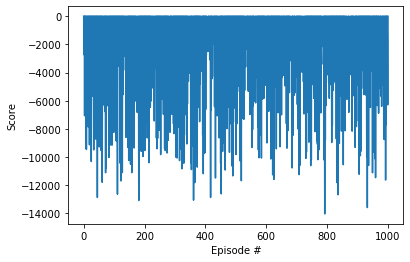

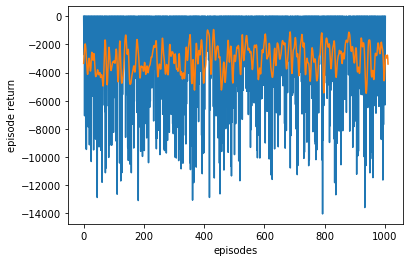

In [6]:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(env.scores)), env.scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.savefig('score_vs_eps.png')
    # plt.show()

    # Plotting 
    Y = np.asarray(env.log.get_log('scores'))
    Y2 = smooth(Y)
    x = np.linspace(0, len(Y), len(Y))
    fig1 = plt.figure()
    ax1 = plt.axes()
    ax1.plot(x, Y, Y2)
    plt.xlabel('episodes')
    plt.ylabel('episode return')
    plt.savefig('eps_return_vs_eps.png')
    # plt.show()

In [7]:
model.save("ppo2_mg")

In [5]:
model = PPO2.load("ppo2_mg")

Loading a model without an environment, this model cannot be trained until it has a valid environment.


Episode 2	Average Score: 0.00Start= [  8.8   8.5 -90.    9.5   8.6  90. ]
obs :  [  8.8   8.6 -90.    9.5   8.6  90. ]
action :  2
rewards :  -27.07106781186547
dones :  False
count: 1
Final= [  8.8   8.6 -90.    9.5   8.6  90. ]
obs :  [  8.8   8.7 -90.    9.5   8.6  90. ]
action :  2
rewards :  -26.999999999999993
dones :  False
count: 2
Final= [  8.8   8.7 -90.    9.5   8.6  90. ]
obs :  [  8.8   8.6 -90.    9.5   8.6  90. ]
action :  3
rewards :  -27.07106781186547
dones :  False
count: 3
Final= [  8.8   8.6 -90.    9.5   8.6  90. ]
obs :  [  8.8   8.7 -90.    9.5   8.6  90. ]
action :  2
rewards :  -26.999999999999993
dones :  False
count: 4
Final= [  8.8   8.7 -90.    9.5   8.6  90. ]
obs :  [  8.8   8.6 -90.    9.5   8.6  90. ]
action :  3
rewards :  -27.07106781186547
dones :  False
count: 5
Final= [  8.8   8.6 -90.    9.5   8.6  90. ]
obs :  [  8.8   8.7 -90.    9.5   8.6  90. ]
action :  2
rewards :  -26.999999999999993
dones :  False
count: 6
Final= [  8.8   8.7 -90.    9.5 

[  8.8   8.5 -90.    9.5   8.6  90. ]
[  8.8   8.6 -90.    9.5   8.6  90. ]
[  8.8   8.7 -90.    9.5   8.6  90. ]
[  8.8   8.6 -90.    9.5   8.6  90. ]
[  8.8   8.7 -90.    9.5   8.6  90. ]
[  8.8   8.6 -90.    9.5   8.6  90. ]
[  8.8   8.7 -90.    9.5   8.6  90. ]
[  8.8   8.8 -90.    9.5   8.6  90. ]
[  8.8   8.9 -90.    9.5   8.6  90. ]
[  8.8   9.  -90.    9.5   8.6  90. ]
[  8.8   8.9 -90.    9.5   8.6  90. ]
[  8.8   9.  -90.    9.5   8.6  90. ]
[  8.8   9.1 -90.    9.5   8.6  90. ]
[  8.8   9.1 -90.    9.5   8.6  90. ]
[  8.8   9.2 -90.    9.5   8.6  90. ]
[  8.8   9.3 -90.    9.5   8.6  90. ]
[  8.8   9.4 -90.    9.5   8.6  90. ]
[  8.8   9.5 -90.    9.5   8.6  90. ]
[  8.8   9.5 -90.    9.5   8.6  90. ]
[  8.8   9.6 -90.    9.5   8.6  90. ]
[  8.8   9.5 -90.    9.5   8.6  90. ]
[  8.8   9.6 -90.    9.5   8.6  90. ]
[  8.8   9.7 -90.    9.5   8.6  90. ]
[  8.8   9.8 -90.    9.5   8.6  90. ]
[  8.8   9.8 -90.    9.5   8.6  90. ]
[  8.8   9.9 -90.    9.5   8.6  90. ]
[  8.8  10. 

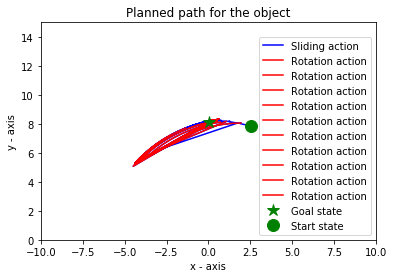

FileNotFoundError: [Errno 2] No such file or directory: 'Test_results/data.png'

<Figure size 432x288 with 0 Axes>

In [9]:
env_test = Env()
success=0

L = []
R = []
thetas 
actions = []
states = []

for i in range(1):    
    obs = env_test.reset()
    states.append(obs)
    done = 0
    count = 0
    print("Start=", obs)
    while (not done and count<100):
#     for j in range(100):
        action, _states = model.predict(obs)
        actions.append(action)
        obs, rewards, dones, info = env_test.step(action)
        states.append(obs)
        print("obs : ", obs)
        print("action : ", action)
        print("rewards : ", rewards)
        print("dones : ", dones)
        count = count + 1
        print("count:", count)
        print("Final=",obs)
    thetas = calculate_theta(states, actions)
    for state in states:
        L.append(state[0])
        R.append(state[1])
        print (state)

    
    if(done):
        success=success+1
        print("Goal reached","Episode_number=",i)
        print("Success_rate=",success*100/i)
    else:
        print("Goal not reached","Episode_number=",i)
#         print("Success_rate=",success*100/i)

    plot(L, R, thetas, actions)